# Baseline simple classificator

## Реализуем рецептивные поля и на их основе создадим признаковое пространство

### Для начала подготовим датасет для классфикации. Будем использовать датасет временных рядов ECG Heartbeat Classification: 

In [1]:
import numpy as np
import pandas as pd 

df_train = pd.read_csv('/home/ilyamakedonskiy/Загрузки/heartbeat/mitbih_train.csv')
df_test = pd.read_csv('/home/ilyamakedonskiy/Загрузки/heartbeat/mitbih_test.csv')
df_abnormal= pd.read_csv('/home/ilyamakedonskiy/Загрузки/heartbeat/ptbdb_abnormal.csv')
df_normal = pd.read_csv('/home/ilyamakedonskiy/Загрузки/heartbeat/ptbdb_normal.csv')

df_train.columns = [f'Column_{i}' for i in range(len(df_train.columns))]


In [2]:
# mitbih_normal = np.loadtxt('/home/ilyamakedonskiy/Загрузки/heartbeat/ptbdb_normal.csv', delimiter=',')
# print(set(list(mitbih_normal[:,-1])))
# mitbih_abnormal = np.loadtxt('/home/ilyamakedonskiy/Загрузки/heartbeat/ptbdb_abnormal.csv', delimiter=',')
# print(set(list(mitbih_abnormal[:,-1])))

<Axes: >

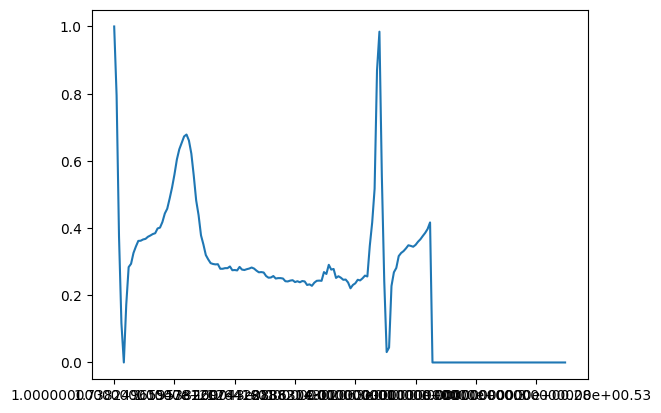

In [3]:
df_normal.loc[0].plot()

<Axes: >

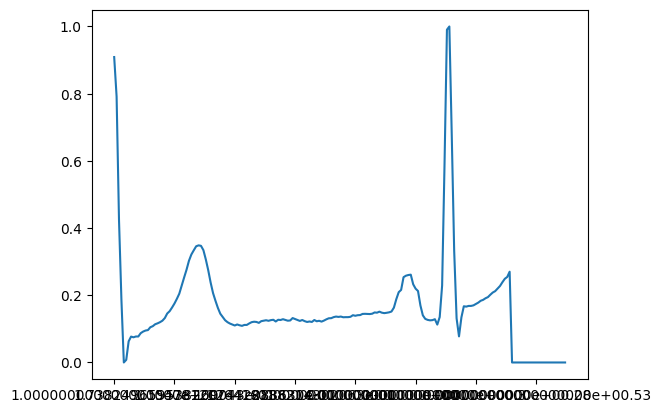

In [4]:
df_normal.loc[1].plot()

<Axes: >

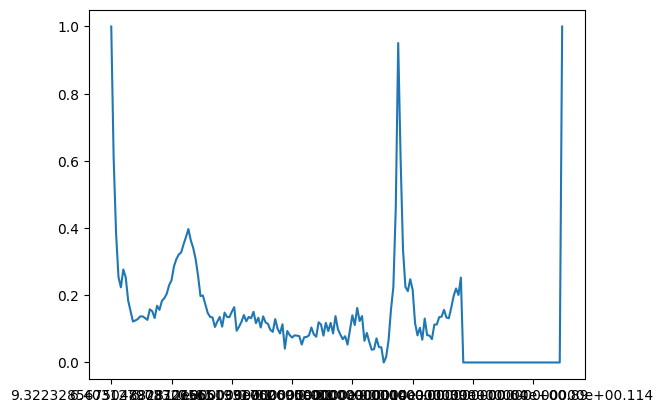

In [5]:
df_abnormal.loc[0].plot()

<Axes: >

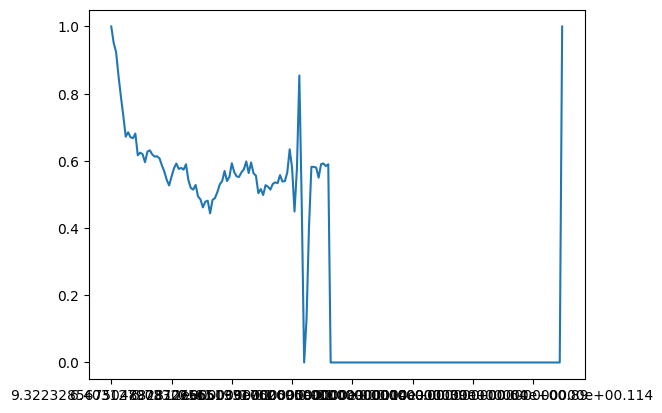

In [6]:
df_abnormal.loc[1].plot()

In [7]:
df_train = df_train[(df_train['Column_187'] == 1.0) | (df_train['Column_187'] == 0.0)]

In [8]:
y_train = df_train['Column_187']

In [9]:
df_train = df_train.drop('Column_187', axis=1, inplace=False)


In [9]:
df_1 = df_train.head(2223)

In [10]:
df_2 = df_train.tail(2223)

In [11]:
df_train = pd.concat([df_1, df_2], axis=1)

In [12]:
y_1 = y_train[0:2223]
y_2 = y_train[72470:74693]

In [13]:
y_1

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2218    0.0
2219    0.0
2220    0.0
2221    0.0
2222    0.0
Name: Column_187, Length: 2223, dtype: float64

In [14]:
y_train = np.concatenate((y_1, y_2))

In [15]:
y_train

array([0., 0., 0., ..., 1., 1., 1.])

In [16]:
unique_elements, counts = np.unique(y_train, return_counts=True)

In [17]:
print(unique_elements)
print(counts)

[0. 1.]
[2223 2223]


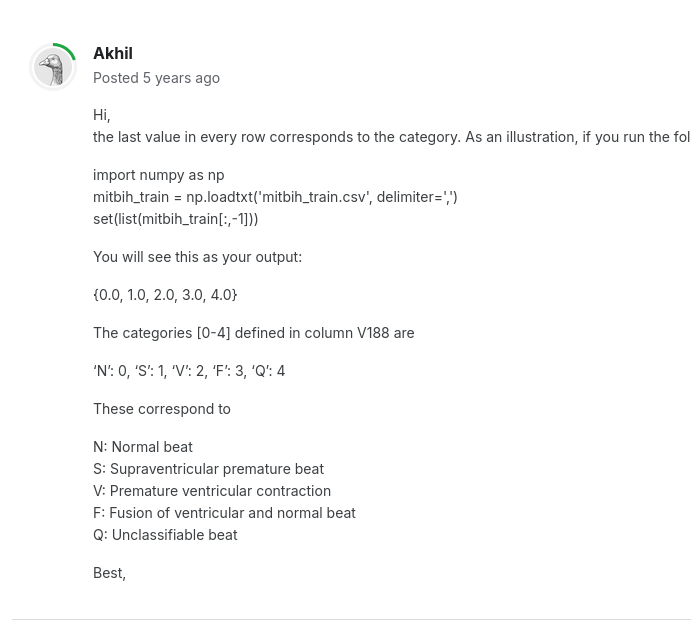

### Загрузив датасет, прогоним каждый из них через рецептивные поля, для получения признаков в виде спайков

In [18]:
import nest
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

#helpful functions
def gaussian(x,mu,disp):
    return 25.0*(1/np.sqrt(2*np.pi*disp))*np.exp((-(x-mu)**2)/2*disp)

def params(data,E):
    disp = 1.4*(max(data)-min(data))/(E-2)
    mu=np.array([])
    a = np.linspace(min(data),max(data), E)
    
    for j in range(E): 	    	
        mu = np.append(mu,a[j])
    return mu,disp    
    
def Gaussuniverse(data,mu,disp):
    val = []
    ans = np.zeros(len(mu))
    ans = ans[np.newaxis,:]
    # print(f'{mu} - mat ozhid')
    # print(f'{disp} - dispersiya')
    for k in range(data.shape[0]):
        for i in range(len(mu)):
            val.append(gaussian(data[k],mu[i],disp))
        ans =np.append(ans,[val],axis=0)
        
        val = []
    ans = np.delete(ans,0,axis=0)
    return ans 





              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.8.0
 Built: Aug  5 2024 06:09:28

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [19]:
df_train.head()

Column_0  Column_1  Column_2  Column_3  Column_4  Column_5  Column_6  \
0  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
1  1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
2  0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
3  0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   
4  0.927461  1.000000  0.626943  0.193437  0.094991  0.072539  0.043178   

   Column_7  Column_8  Column_9  ...  Column_177  Column_178  Column_179  \
0  0.088319  0.074074  0.082621  ...         NaN         NaN         NaN   
1  0.043243  0.054054  0.045946  ...         NaN         NaN         NaN   
2  0.060773  0.066298  0.058011  ...         NaN         NaN         NaN   
3  0.089202  0.117371  0.150235  ...         NaN         NaN         NaN   
4  0.053541  0.093264  0.189983  ...         NaN         NaN         NaN   

   Column_180  Column_181  Column_182  Column_183  Column_184  Column_185  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN         NaN   
2         NaN         NaN         NaN         NaN         NaN         NaN   
3         NaN         NaN         NaN         NaN         NaN         NaN   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   Column_186  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

[5 rows x 374 columns]

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_train, y_train, test_size=0.95, random_state=42, stratify=y_train)



In [20]:
print(X_train.shape)
print(y_train.shape)

(222, 374)
(222,)


In [23]:
np_array = X_train.to_numpy()

# Разбивка массива на отдельные строки
data = [np_array[i] for i in range(len(np_array))]

### Остается прогнать в цикле все строки и получить новый датасет который мы уже обучим


Sep 05 18:55:43 NodeManager::prepare_nodes [Info]: 
    Preparing 3366 nodes for simulation.
0

Sep 05 18:55:44 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 3366
    Simulation time (ms): 100
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Sep 05 18:55:44 SimulationManager::run [Info]: 
    Simulation finished.


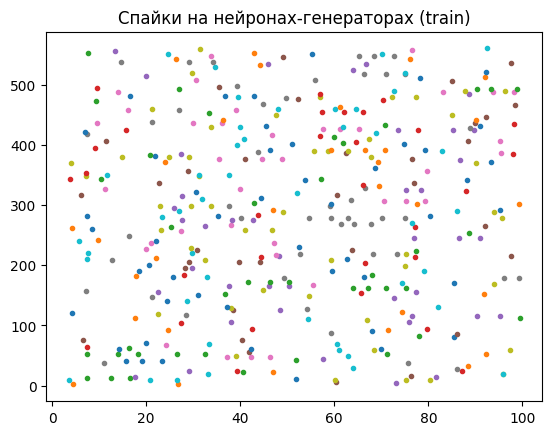

spike counts =  [0, 2, 0, 0, 1, 1, 0, 0, 3, 3, 1, 0, 3, 0, 2, 1, 0, 0, 1, 2, 0, 1, 1, 2, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 1, 0, 1, 0, 3, 0, 1, 1, 0, 1, 6, 0, 0, 1, 0, 0, 2, 1, 3, 0, 1, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 3, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 1, 1, 0, 0, 0, 4, 0, 3, 0, 1, 0, 1, 1, 1, 0, 3, 0, 0, 0, 0, 3, 0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 3, 0, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 3, 1, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 3, 0, 1, 1, 1, 1, 1, 1, 1, 3, 0, 1, 0, 0, 0, 0, 3, 0, 0, 6, 1, 1, 3, 0, 0, 1, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 1, 0, 0, 2, 3, 0, 1, 2, 1, 0, 0, 0, 3, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 1, 0, 0, 1, 2, 0, 2, 1,

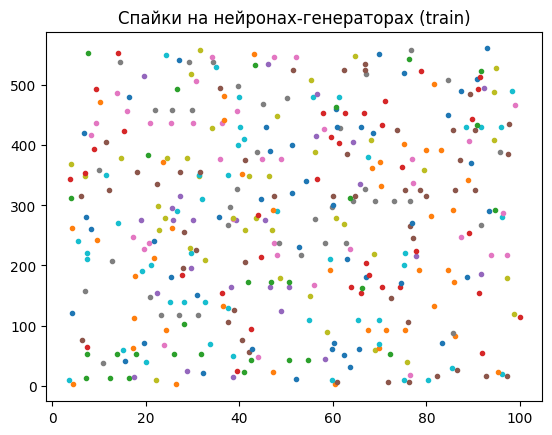

spike counts =  [0, 3, 0, 0, 0, 3, 0, 0, 1, 4, 1, 0, 3, 0, 2, 3, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 3, 0, 1, 0, 1, 0, 0, 1, 1, 0, 6, 1, 0, 1, 0, 0, 1, 1, 3, 2, 0, 1, 0, 0, 1, 0, 0, 2, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 3, 0, 1, 0, 1, 0, 0, 0, 3, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 3, 1, 0, 0, 1, 0, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 2, 0, 3, 1, 0, 2, 1, 0, 0, 0, 0, 1, 0, 3, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 0, 3, 1, 1, 3, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 3, 0, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 3, 0, 1, 2, 0, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 0, 5, 0, 1, 1, 4, 1, 2, 1, 0, 1, 0, 0, 1, 0, 0, 2, 1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 4, 0, 1, 1, 0, 2, 0, 1, 5, 0, 0, 0, 0, 1, 0, 0, 0, 0, 5, 0, 2,

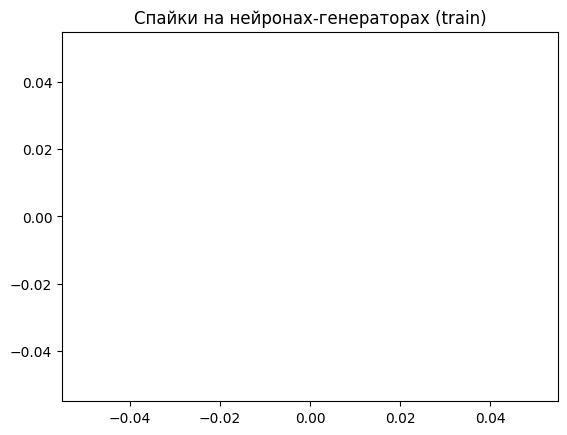

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

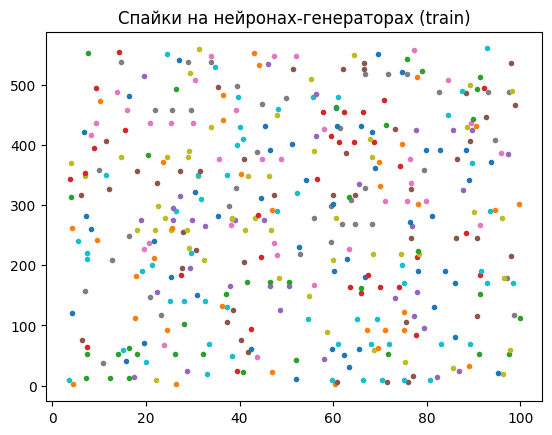

spike counts =  [0, 3, 0, 0, 0, 3, 0, 0, 1, 6, 1, 0, 3, 0, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 8, 0, 0, 1, 0, 0, 2, 1, 3, 1, 1, 1, 0, 0, 1, 0, 0, 6, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 4, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 3, 0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 3, 1, 0, 3, 0, 0, 0, 0, 1, 2, 0, 2, 1, 0, 3, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 0, 1, 1, 1, 3, 2, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 6, 0, 1, 2, 0, 0, 2, 0, 2, 3, 0, 0, 1, 0, 0, 0, 5, 0, 1, 1, 5, 0, 3, 0, 0, 1, 0, 0, 0, 0, 1, 3, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 0, 0, 0, 3, 1, 0, 1, 1, 0, 2, 0, 1, 4, 0, 0, 0, 1, 1, 0, 0, 0, 1, 2, 0, 2,

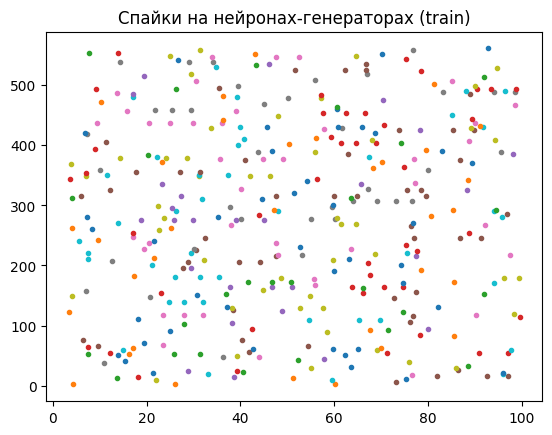

spike counts =  [0, 3, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 3, 1, 0, 0, 2, 2, 0, 1, 1, 1, 1, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 2, 1, 3, 4, 0, 1, 0, 0, 1, 2, 3, 2, 0, 1, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 3, 1, 0, 0, 1, 0, 1, 4, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 1, 1, 1, 3, 0, 0, 0, 1, 0, 3, 3, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 3, 0, 1, 2, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 3, 0, 0, 0, 1, 0, 1, 2, 1, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 4, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 0, 5, 0, 0, 3, 2, 1, 2, 1, 0, 1, 0, 1, 0, 0, 0, 3, 0, 2, 1, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 4, 0, 1, 1, 0, 2, 0, 1, 5, 0, 0, 0, 0, 1, 0, 0, 0, 1, 3, 1, 1,

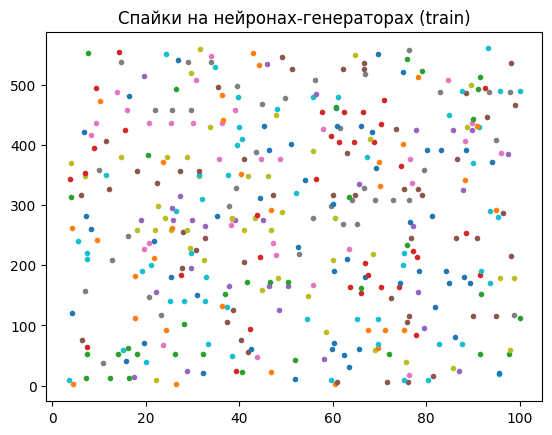

spike counts =  [0, 3, 0, 0, 0, 3, 0, 0, 1, 4, 1, 0, 3, 0, 1, 1, 1, 0, 0, 1, 2, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 8, 0, 0, 1, 0, 0, 2, 1, 3, 1, 1, 1, 0, 0, 1, 0, 0, 4, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 4, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 3, 0, 1, 1, 0, 0, 3, 0, 2, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 1, 3, 0, 3, 0, 0, 0, 0, 0, 3, 1, 3, 1, 0, 3, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 0, 1, 1, 1, 1, 3, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 6, 0, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 1, 0, 0, 0, 5, 0, 1, 1, 4, 1, 3, 0, 0, 1, 0, 1, 0, 0, 1, 2, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 4, 0, 1, 1, 0, 2, 0, 1, 5, 0, 0, 0, 1, 0, 0, 0, 0, 1, 3, 0, 2,

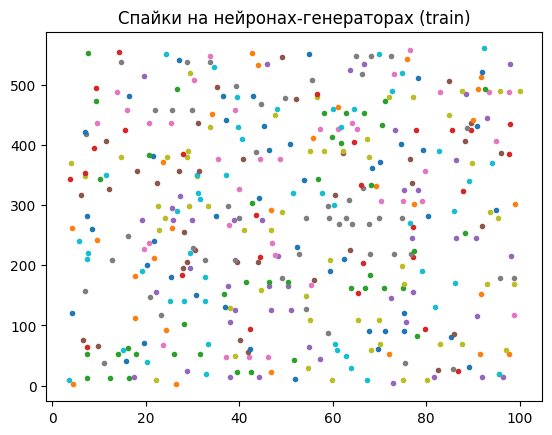

spike counts =  [0, 2, 0, 0, 1, 0, 0, 0, 4, 2, 1, 0, 3, 0, 6, 0, 0, 0, 1, 2, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 3, 0, 1, 1, 0, 3, 5, 0, 0, 1, 0, 0, 2, 2, 2, 0, 1, 1, 1, 1, 1, 0, 3, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 3, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 3, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 2, 0, 0, 0, 3, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 1, 1, 0, 0, 0, 4, 0, 3, 0, 1, 0, 3, 1, 0, 0, 3, 0, 0, 1, 0, 3, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 3, 0, 3, 1, 1, 1, 1, 0, 2, 2, 0, 1, 4, 0, 2, 0, 0, 1, 0, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 3, 0, 1, 2, 0, 1, 0, 1, 1, 3, 0, 1, 0, 0, 0, 0, 5, 0, 0, 6, 2, 0, 3, 0, 0, 1, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 1, 0, 0, 2, 3, 1, 0, 2, 1, 0, 0, 0, 3, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 3, 0, 0, 0, 1, 2, 1, 1, 1,

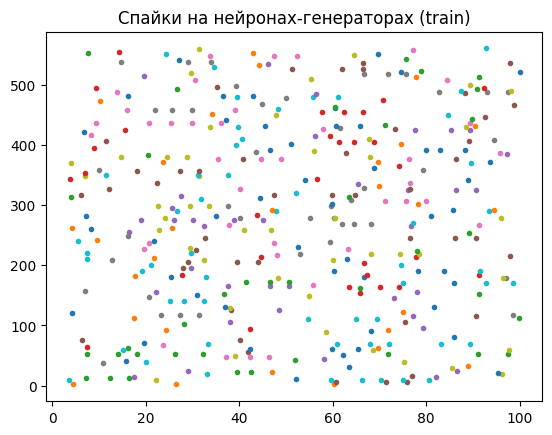

spike counts =  [0, 3, 0, 0, 0, 3, 0, 0, 1, 6, 1, 0, 3, 0, 2, 1, 0, 0, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 8, 0, 0, 1, 0, 0, 2, 1, 3, 1, 1, 1, 0, 0, 1, 0, 0, 6, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 3, 0, 1, 1, 0, 1, 1, 0, 4, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 3, 1, 0, 3, 0, 0, 0, 0, 1, 2, 1, 2, 1, 0, 3, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 3, 0, 1, 2, 1, 1, 1, 0, 2, 0, 1, 1, 1, 3, 2, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 4, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 3, 0, 1, 2, 0, 0, 2, 0, 2, 3, 0, 1, 0, 0, 0, 0, 5, 0, 0, 3, 3, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 3, 1, 2, 0, 0, 1, 0, 0, 2, 3, 0, 1, 1, 0, 0, 0, 0, 3, 1, 0, 1, 1, 0, 2, 0, 1, 4, 0, 0, 0, 1, 0, 0, 0, 0, 3, 2, 1, 1,

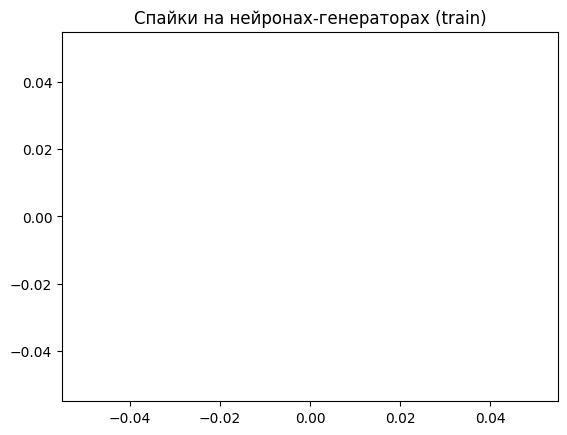

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

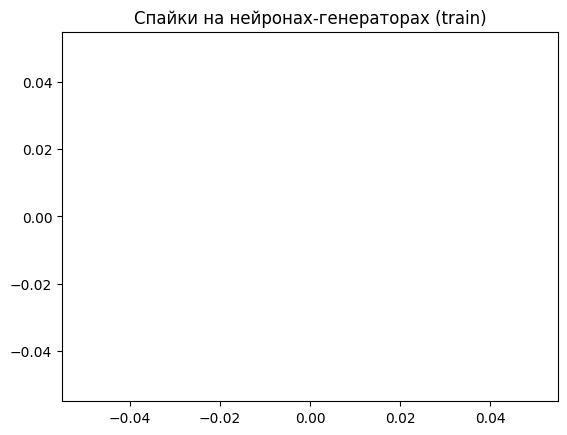

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

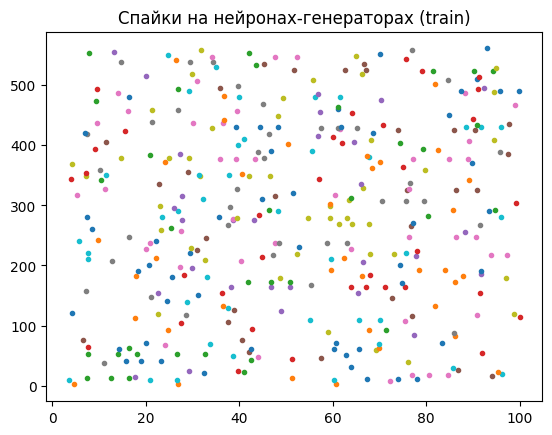

spike counts =  [0, 3, 0, 0, 0, 0, 1, 0, 0, 4, 3, 1, 3, 0, 1, 1, 3, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 3, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 5, 1, 0, 1, 0, 0, 1, 0, 4, 1, 1, 1, 0, 0, 1, 0, 0, 2, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 3, 0, 1, 0, 1, 0, 1, 1, 1, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 4, 3, 0, 0, 1, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 2, 1, 1, 3, 0, 2, 1, 0, 0, 0, 0, 0, 2, 3, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 1, 2, 0, 2, 0, 1, 1, 0, 2, 1, 3, 2, 1, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 3, 0, 1, 1, 1, 0, 0, 0, 1, 3, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 2, 3, 0, 1, 0, 0, 0, 3, 0, 1, 0, 4, 2, 2, 0, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 1, 0, 0, 1, 2, 0, 0, 1, 0, 1, 0, 0, 0, 3, 1, 1, 1, 0, 1, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 3, 2, 1,

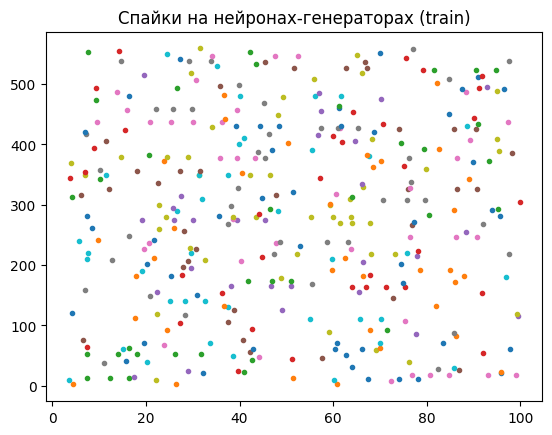

spike counts =  [0, 3, 0, 0, 0, 0, 1, 0, 1, 2, 3, 1, 3, 0, 1, 0, 5, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 5, 1, 0, 1, 0, 0, 1, 1, 4, 1, 1, 1, 0, 0, 1, 0, 0, 2, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 3, 0, 1, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 4, 3, 0, 0, 1, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 1, 1, 1, 3, 0, 2, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 1, 1, 2, 0, 2, 0, 1, 1, 0, 0, 2, 3, 3, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 3, 0, 1, 1, 1, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 3, 0, 1, 0, 0, 0, 5, 0, 1, 0, 6, 0, 3, 0, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 1, 0, 0, 1, 2, 0, 0, 1, 0, 1, 0, 0, 0, 3, 1, 1, 1, 0, 2, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 4, 1, 1,

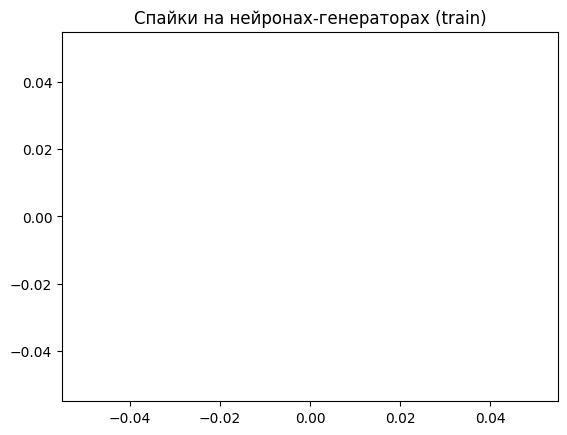

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

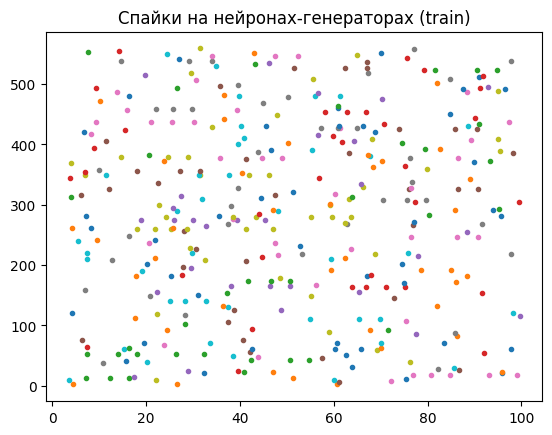

spike counts =  [0, 3, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 3, 0, 1, 0, 5, 0, 0, 0, 2, 2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 3, 0, 0, 1, 1, 0, 0, 1, 1, 0, 5, 1, 0, 1, 0, 0, 1, 1, 4, 1, 1, 1, 0, 0, 1, 0, 0, 2, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 3, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 4, 3, 0, 1, 0, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 2, 0, 1, 1, 0, 1, 2, 1, 3, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 6, 0, 1, 2, 0, 0, 1, 1, 0, 3, 1, 0, 1, 0, 0, 0, 5, 0, 1, 0, 6, 0, 3, 0, 1, 1, 0, 0, 0, 0, 0, 2, 1, 2, 1, 0, 1, 0, 0, 1, 2, 0, 0, 1, 0, 2, 0, 0, 0, 3, 1, 1, 1, 0, 2, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 4, 1, 1,

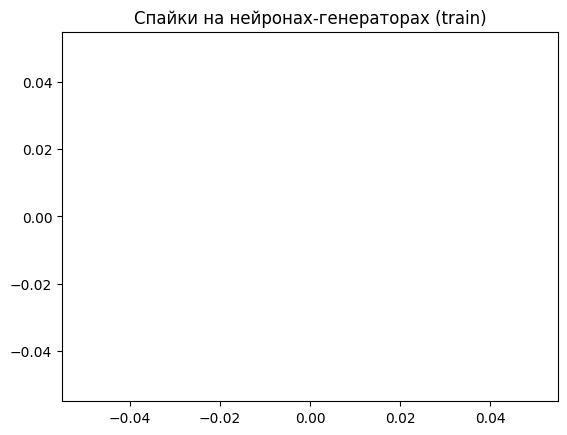

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

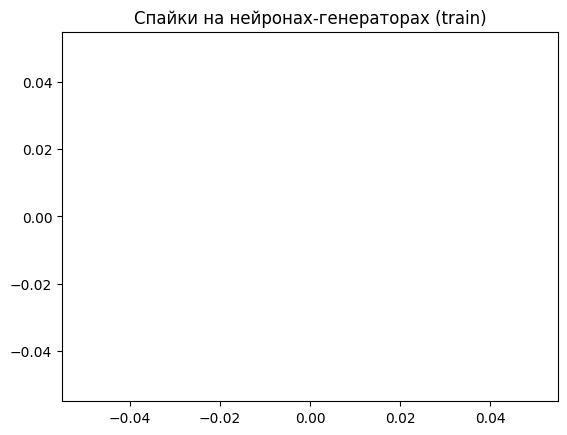

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

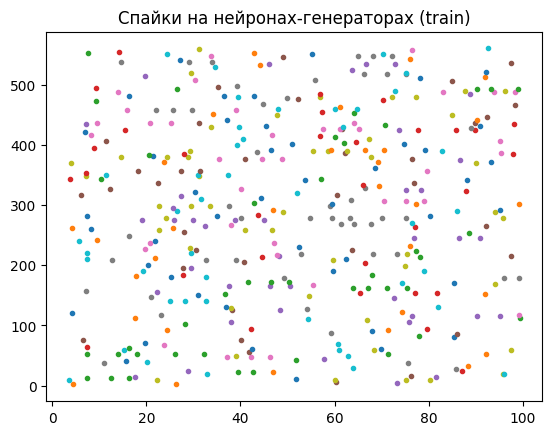

spike counts =  [0, 2, 0, 0, 1, 1, 0, 0, 4, 1, 1, 0, 3, 0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 3, 0, 1, 1, 0, 1, 6, 0, 0, 1, 0, 0, 2, 2, 2, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 3, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 3, 1, 0, 0, 1, 0, 0, 0, 0, 4, 0, 3, 0, 1, 0, 1, 1, 1, 0, 3, 0, 0, 0, 0, 3, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 3, 0, 1, 2, 0, 1, 1, 1, 1, 3, 0, 1, 0, 0, 0, 0, 5, 0, 0, 6, 2, 0, 3, 0, 0, 1, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 1, 0, 0, 2, 3, 0, 1, 2, 1, 0, 0, 0, 3, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 1, 0, 0, 1, 2, 1, 1, 1,

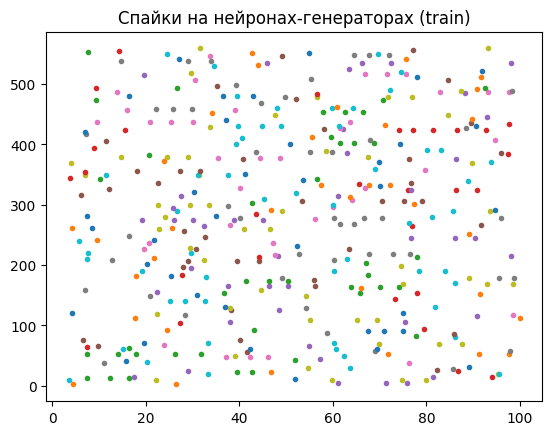

spike counts =  [0, 2, 0, 0, 3, 0, 0, 0, 4, 1, 1, 0, 3, 1, 2, 0, 0, 0, 1, 2, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 3, 0, 1, 1, 0, 3, 5, 0, 0, 1, 0, 2, 0, 2, 2, 0, 1, 1, 1, 1, 1, 0, 3, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 3, 0, 0, 2, 0, 0, 1, 0, 1, 1, 1, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 3, 0, 3, 1, 0, 0, 3, 1, 0, 0, 3, 0, 0, 1, 0, 3, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 3, 0, 2, 1, 2, 0, 1, 1, 1, 2, 0, 1, 4, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 3, 0, 1, 2, 0, 1, 1, 1, 1, 2, 0, 1, 0, 0, 0, 0, 5, 0, 1, 5, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 1, 0, 1, 1, 3, 1, 0, 1, 1, 0, 0, 4, 1, 0, 0, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 3, 1, 1, 2, 0,

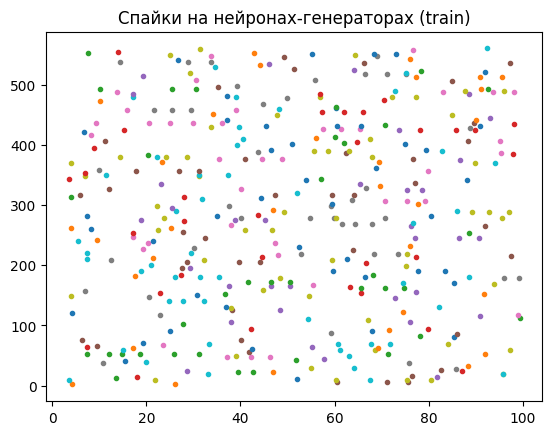

spike counts =  [0, 2, 0, 0, 0, 3, 0, 0, 4, 2, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 3, 0, 1, 1, 0, 1, 7, 0, 0, 1, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1, 1, 0, 1, 4, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 1, 1, 2, 1, 0, 0, 1, 1, 0, 0, 0, 3, 1, 3, 0, 1, 0, 1, 1, 1, 0, 3, 0, 0, 0, 0, 2, 1, 4, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 3, 0, 1, 2, 1, 1, 1, 0, 2, 0, 1, 1, 3, 1, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 3, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 3, 0, 1, 2, 0, 0, 1, 1, 1, 3, 0, 1, 0, 0, 0, 1, 3, 0, 0, 4, 3, 0, 3, 0, 0, 1, 0, 0, 0, 0, 4, 2, 0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 3, 1, 0, 1, 1, 0, 1, 1, 0, 4, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 1,

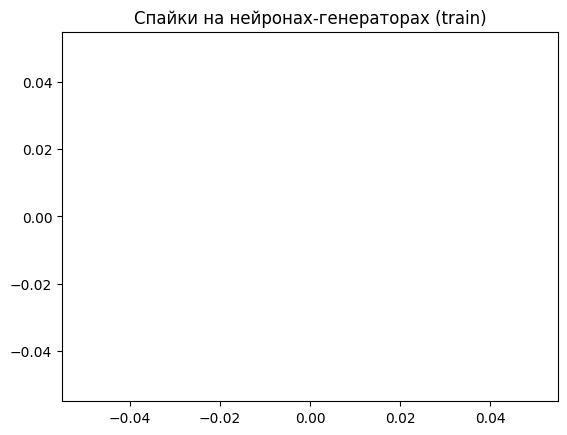

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

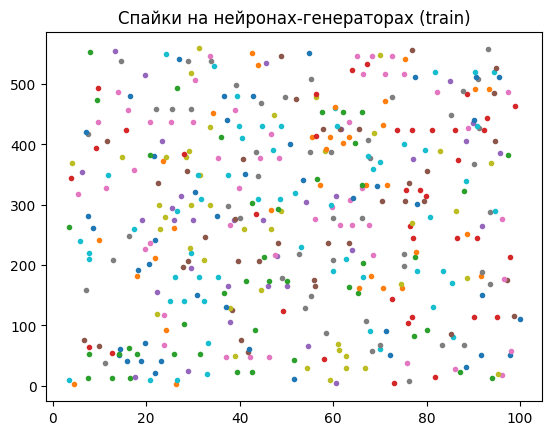

spike counts =  [0, 2, 0, 1, 1, 0, 0, 1, 1, 3, 1, 0, 4, 1, 1, 0, 1, 0, 1, 1, 1, 0, 3, 0, 1, 0, 1, 0, 3, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 3, 0, 1, 1, 0, 0, 3, 0, 2, 0, 4, 0, 5, 1, 0, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 3, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 3, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 3, 1, 0, 3, 1, 0, 1, 1, 1, 0, 0, 3, 0, 0, 2, 1, 1, 1, 4, 0, 3, 0, 0, 0, 0, 0, 1, 0, 3, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 3, 0, 2, 1, 2, 0, 1, 2, 1, 1, 0, 2, 2, 0, 2, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 3, 1, 0, 0, 1, 1, 1, 0, 3, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 1, 1, 1, 1, 1, 1, 0, 4, 0, 1, 0, 0, 0, 0, 0, 5, 1, 2, 3, 1, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 0, 1, 1, 0, 1, 0, 1, 1, 3, 1, 1, 0, 1, 0, 1, 3, 1, 0, 0, 3, 1, 0, 0, 1, 2, 0, 1, 0, 0, 1, 1, 0, 1, 2, 0, 0, 3, 0,

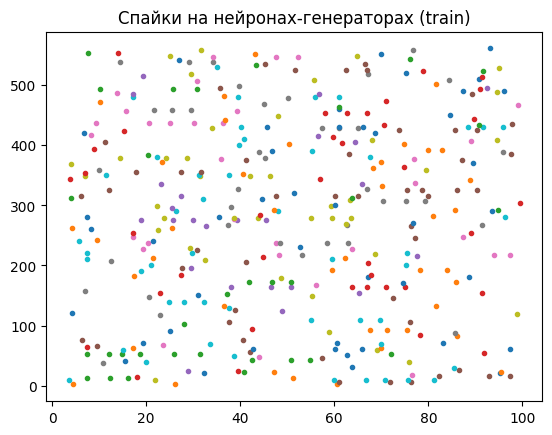

spike counts =  [0, 3, 0, 0, 0, 3, 0, 0, 1, 6, 0, 1, 3, 1, 0, 3, 1, 0, 0, 0, 2, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 3, 0, 0, 1, 1, 0, 0, 1, 1, 0, 7, 1, 0, 1, 0, 0, 1, 1, 4, 2, 0, 1, 0, 1, 1, 0, 0, 2, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 4, 3, 0, 1, 0, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 1, 1, 2, 0, 2, 0, 1, 1, 0, 3, 1, 1, 3, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 3, 0, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 1, 0, 3, 1, 0, 1, 0, 0, 0, 5, 0, 1, 0, 6, 1, 2, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 2, 1, 0, 1, 0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 0, 0, 3, 1, 1, 1, 0, 2, 0, 1, 5, 0, 0, 0, 0, 1, 0, 0, 0, 0, 5, 0, 2,

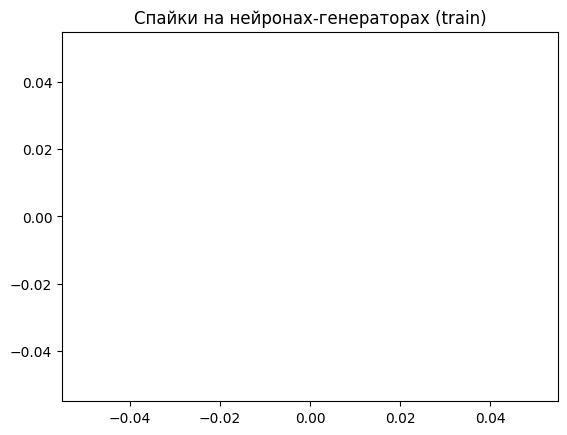

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

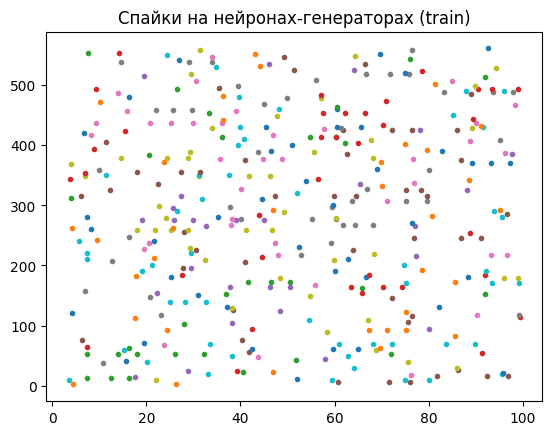

spike counts =  [0, 2, 0, 0, 0, 3, 0, 0, 1, 4, 1, 0, 3, 0, 1, 3, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 0, 6, 1, 0, 1, 0, 0, 1, 1, 3, 1, 1, 1, 0, 0, 1, 0, 0, 6, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 4, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 3, 0, 1, 3, 0, 0, 0, 0, 0, 3, 0, 3, 1, 0, 3, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 0, 3, 1, 1, 2, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 6, 0, 1, 2, 0, 0, 2, 0, 1, 3, 0, 0, 1, 0, 0, 0, 5, 0, 1, 3, 2, 1, 2, 1, 0, 1, 0, 1, 0, 0, 1, 2, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 1, 3, 0, 1, 1, 0, 1, 0, 1, 5, 0, 0, 0, 1, 0, 0, 0, 0, 1, 3, 1, 1,

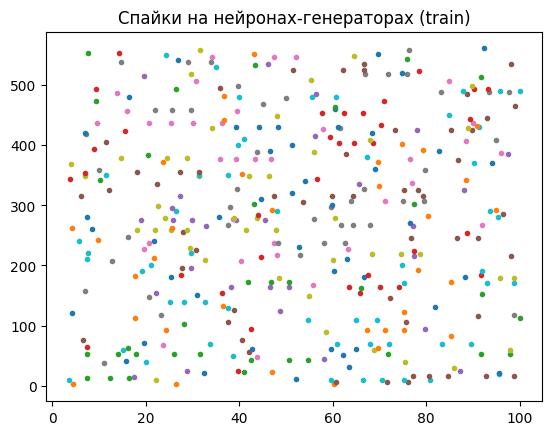

spike counts =  [0, 3, 0, 0, 0, 3, 0, 0, 1, 6, 1, 0, 3, 0, 1, 5, 0, 0, 0, 1, 2, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 3, 0, 1, 0, 1, 0, 0, 1, 1, 0, 8, 0, 0, 1, 0, 0, 2, 1, 3, 1, 1, 1, 0, 0, 1, 0, 0, 6, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 4, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 3, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 3, 0, 1, 3, 0, 0, 0, 0, 0, 3, 0, 3, 1, 0, 3, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 3, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 3, 0, 1, 1, 1, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 6, 0, 1, 2, 0, 0, 2, 0, 1, 4, 0, 0, 1, 0, 0, 0, 5, 0, 1, 1, 4, 1, 2, 1, 0, 1, 0, 1, 0, 0, 0, 3, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 2, 0, 0, 1, 1, 3, 0, 0, 1, 0, 0, 0, 1, 5, 0, 0, 0, 0, 1, 0, 0, 0, 1, 3, 0, 2,

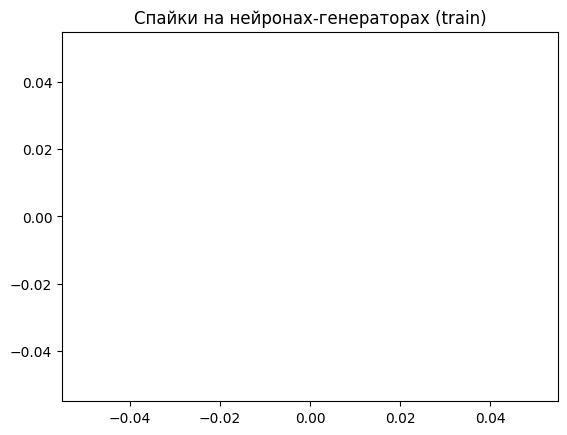

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

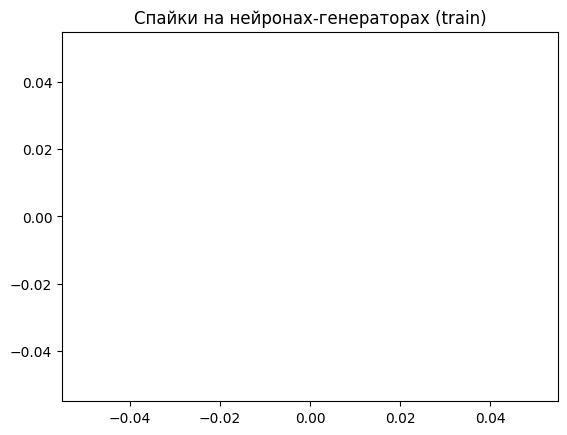

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

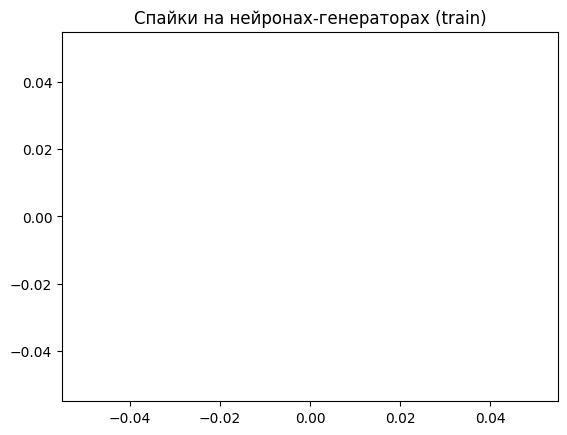

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

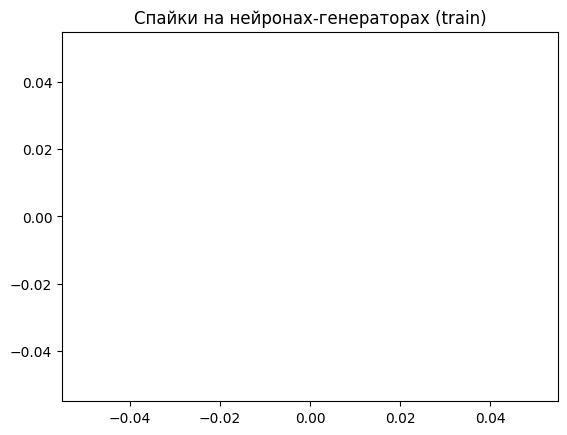

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

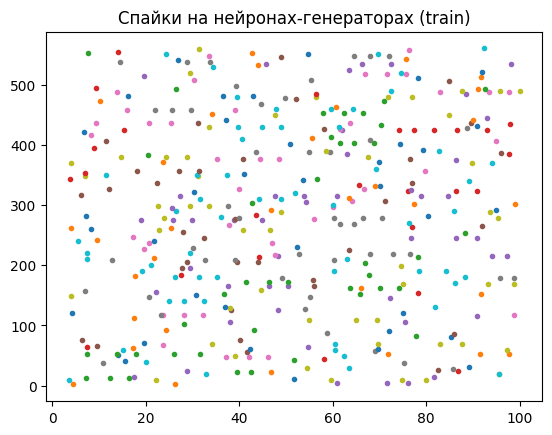

spike counts =  [0, 2, 0, 0, 3, 0, 0, 0, 4, 1, 1, 0, 3, 0, 2, 0, 0, 0, 1, 2, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 1, 0, 0, 3, 0, 1, 1, 1, 3, 5, 0, 0, 1, 0, 1, 1, 2, 2, 1, 0, 1, 1, 1, 1, 0, 4, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 3, 0, 0, 1, 0, 0, 1, 0, 4, 1, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 3, 0, 3, 1, 0, 0, 3, 1, 0, 0, 3, 0, 0, 1, 0, 3, 0, 4, 0, 1, 1, 1, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 3, 0, 4, 0, 2, 0, 1, 1, 1, 3, 0, 1, 4, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 3, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 3, 0, 1, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 5, 1, 1, 4, 2, 1, 2, 0, 0, 1, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 1, 0, 1, 1, 3, 1, 0, 2, 1, 0, 1, 1, 1, 0, 0, 3, 0, 1, 0, 0, 6, 1, 0, 0, 0, 1, 1, 0, 0, 3, 1, 1, 2, 0,

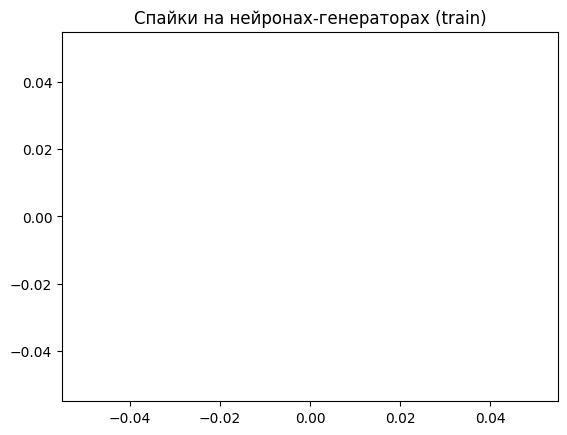

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

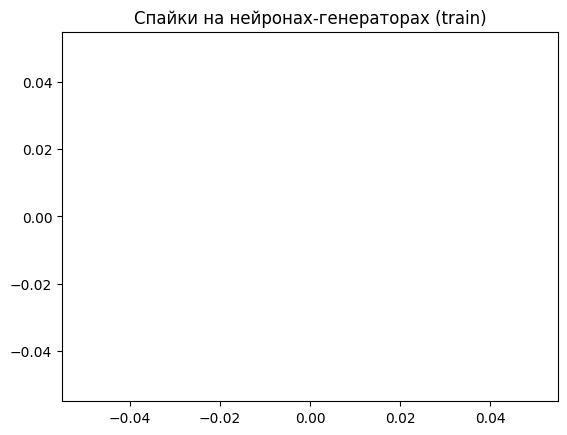

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

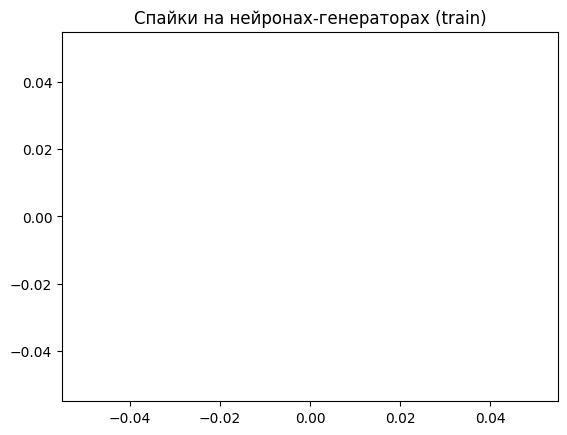

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

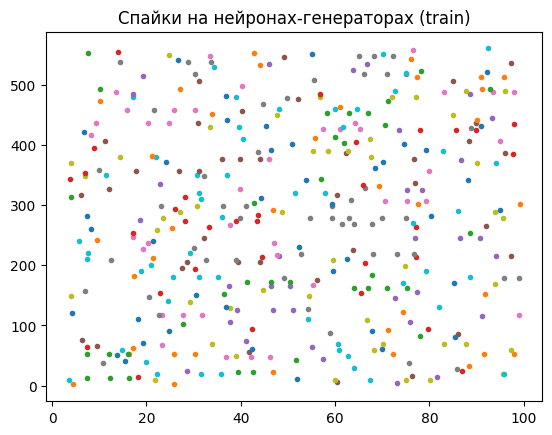

spike counts =  [0, 2, 0, 0, 1, 1, 0, 0, 4, 2, 1, 0, 3, 1, 1, 1, 0, 0, 1, 4, 0, 1, 2, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 3, 0, 1, 1, 1, 6, 3, 0, 0, 1, 0, 0, 2, 2, 2, 1, 0, 1, 1, 1, 1, 0, 4, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 4, 1, 0, 0, 1, 1, 0, 0, 3, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 1, 1, 2, 1, 0, 0, 1, 1, 0, 0, 0, 4, 0, 3, 0, 1, 0, 1, 1, 1, 0, 3, 0, 0, 1, 0, 3, 0, 4, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 3, 0, 3, 1, 1, 1, 1, 0, 2, 2, 1, 1, 4, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 3, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 2, 0, 1, 1, 3, 0, 1, 0, 0, 0, 3, 1, 0, 0, 6, 2, 1, 2, 0, 0, 1, 0, 0, 0, 0, 3, 1, 1, 1, 0, 1, 0, 0, 0, 4, 1, 0, 1, 2, 1, 0, 0, 0, 3, 1, 0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 2, 1, 1, 1,

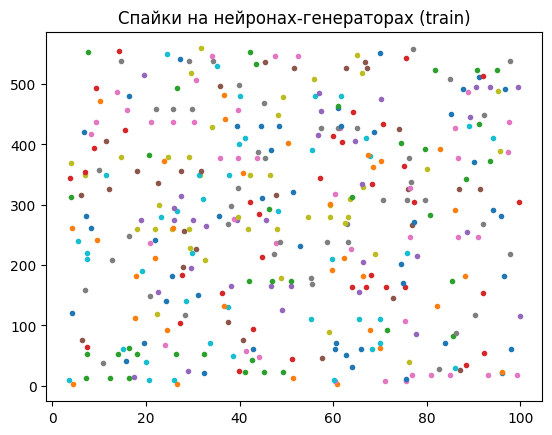

spike counts =  [0, 3, 0, 0, 0, 0, 3, 0, 0, 4, 1, 1, 3, 0, 1, 0, 5, 0, 0, 0, 2, 1, 3, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 5, 1, 0, 0, 1, 0, 0, 2, 4, 1, 1, 1, 0, 0, 1, 0, 0, 2, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 3, 0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 4, 3, 0, 0, 1, 0, 0, 1, 0, 4, 0, 0, 0, 0, 1, 1, 0, 2, 3, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 2, 0, 1, 1, 0, 0, 2, 1, 3, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 3, 0, 1, 1, 1, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 6, 0, 1, 2, 0, 0, 1, 1, 0, 3, 1, 0, 1, 0, 0, 0, 5, 0, 1, 0, 4, 1, 3, 0, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 1, 2, 0, 0, 1, 0, 3, 0, 0, 0, 3, 1, 1, 1, 0, 2, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 4, 1, 1,

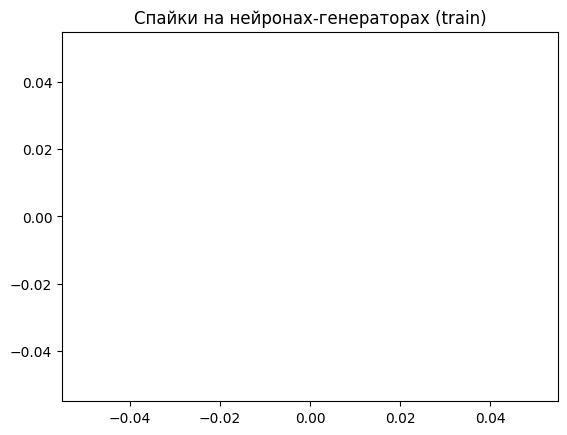

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

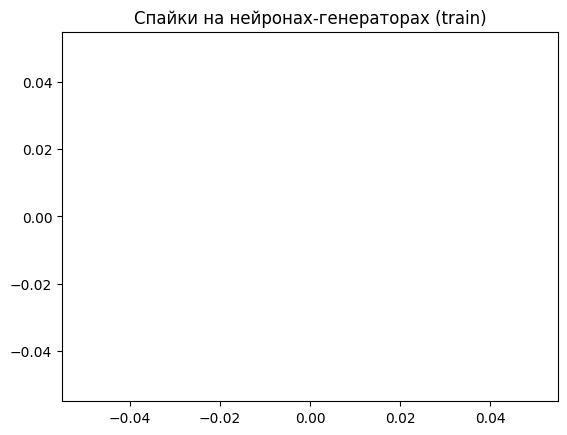

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

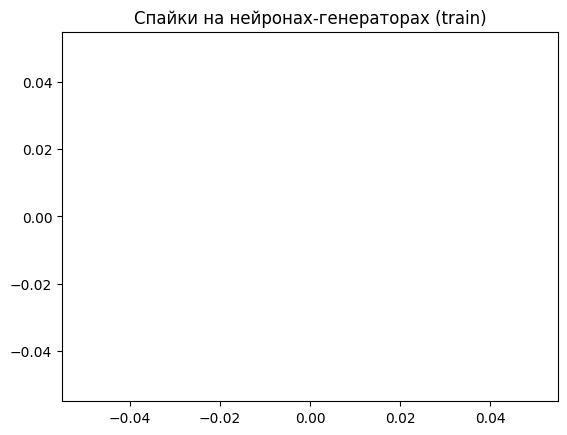

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

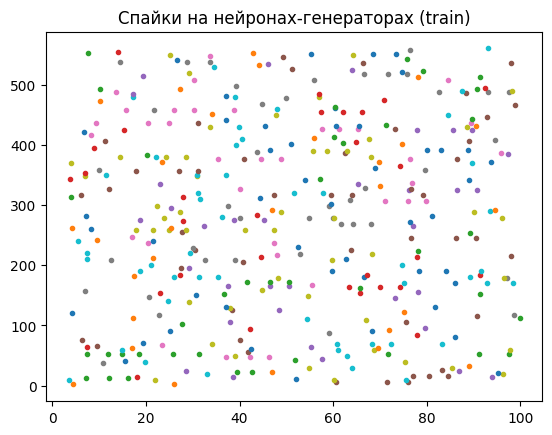

spike counts =  [0, 2, 0, 0, 0, 3, 0, 0, 2, 2, 1, 0, 3, 1, 2, 3, 0, 0, 1, 1, 1, 1, 2, 0, 2, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 3, 0, 1, 1, 0, 0, 9, 0, 0, 1, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1, 1, 0, 1, 4, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 3, 1, 0, 3, 0, 0, 0, 0, 1, 2, 4, 1, 1, 0, 3, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 3, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 6, 0, 1, 2, 0, 0, 2, 0, 0, 3, 0, 0, 1, 0, 0, 1, 3, 0, 0, 3, 3, 1, 2, 0, 0, 1, 0, 0, 0, 0, 3, 1, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 3, 1, 0, 1, 1, 0, 1, 1, 0, 5, 0, 0, 0, 3, 0, 0, 0, 0, 3, 2, 1, 1,

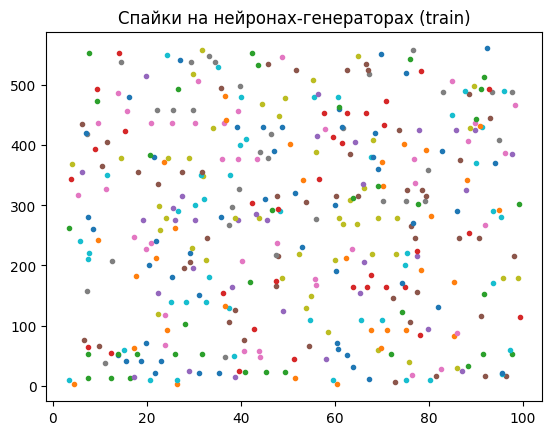

spike counts =  [0, 3, 0, 0, 0, 1, 0, 0, 0, 6, 1, 1, 3, 0, 2, 3, 1, 0, 0, 1, 4, 0, 3, 1, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 3, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 8, 1, 0, 0, 2, 0, 1, 2, 1, 2, 0, 1, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 4, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 2, 1, 0, 1, 0, 0, 0, 0, 0, 4, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 3, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 1, 0, 2, 0, 0, 1, 2, 0, 1, 3, 2, 1, 0, 0, 1, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 4, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 2, 0, 1, 0, 0, 0, 5, 0, 0, 1, 6, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 3, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 2, 1, 0, 1, 0, 3, 1, 1, 1, 0, 1, 0, 1, 4, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 1,

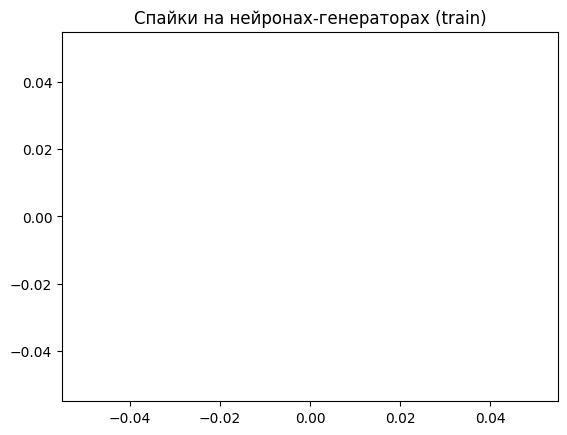

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

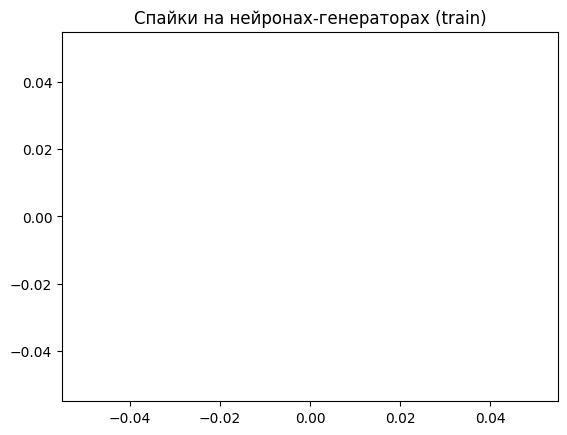

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

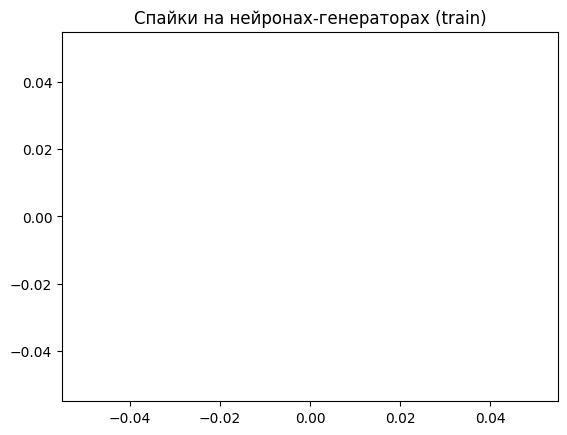

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

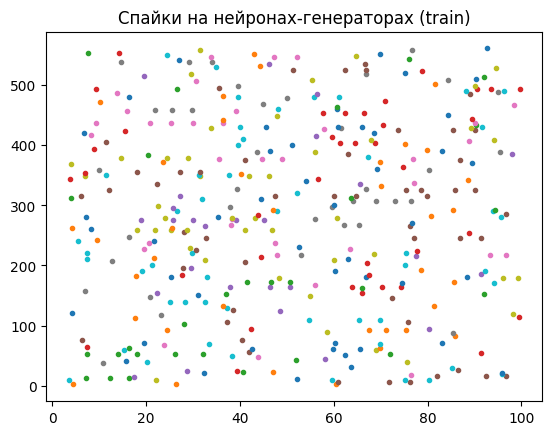

spike counts =  [0, 3, 0, 0, 0, 3, 0, 0, 1, 4, 1, 0, 3, 0, 1, 3, 1, 0, 0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 6, 1, 0, 1, 0, 0, 1, 1, 3, 1, 1, 1, 0, 0, 1, 0, 0, 2, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 4, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 3, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 1, 1, 1, 3, 0, 0, 0, 0, 0, 3, 1, 3, 1, 0, 2, 1, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 0, 3, 1, 1, 3, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 6, 0, 1, 2, 0, 0, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 5, 0, 1, 1, 4, 1, 2, 1, 0, 1, 0, 1, 0, 0, 0, 3, 0, 2, 1, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 4, 0, 1, 1, 0, 2, 0, 1, 5, 0, 0, 0, 1, 0, 0, 0, 0, 0, 5, 0, 2,

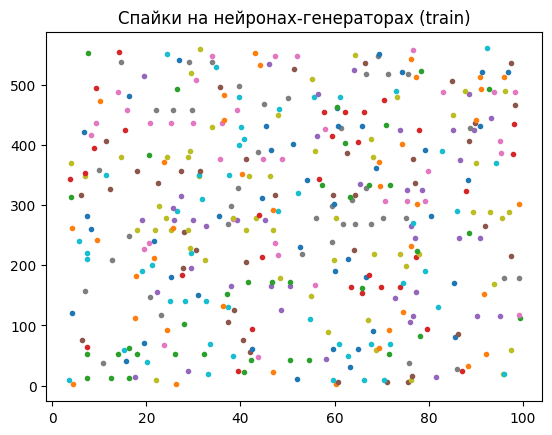

spike counts =  [0, 3, 0, 0, 0, 3, 0, 0, 2, 4, 1, 0, 3, 0, 2, 1, 0, 0, 1, 2, 0, 1, 1, 2, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 3, 0, 1, 0, 1, 0, 0, 2, 0, 1, 6, 0, 0, 1, 0, 0, 2, 1, 3, 1, 1, 1, 0, 0, 1, 0, 0, 4, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 3, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 3, 3, 0, 1, 0, 1, 1, 1, 0, 3, 0, 0, 0, 0, 2, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 0, 1, 1, 1, 3, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 6, 0, 1, 2, 0, 0, 2, 1, 0, 4, 0, 1, 0, 0, 0, 0, 5, 0, 1, 3, 5, 0, 3, 0, 0, 1, 0, 0, 0, 0, 3, 3, 0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 0, 0, 0, 3, 1, 0, 1, 1, 0, 2, 0, 1, 4, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2,

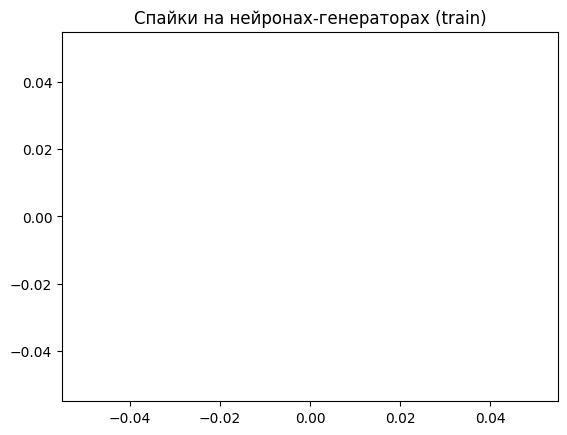

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

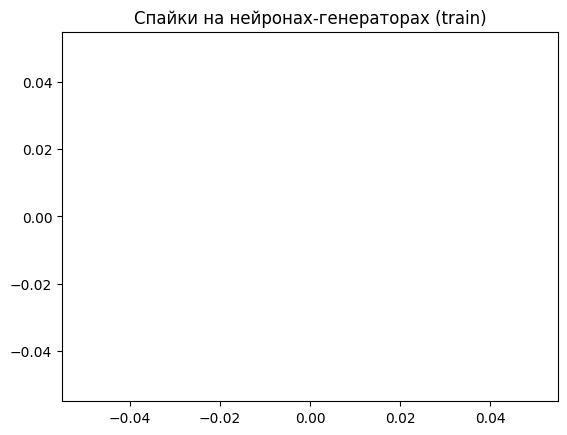

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

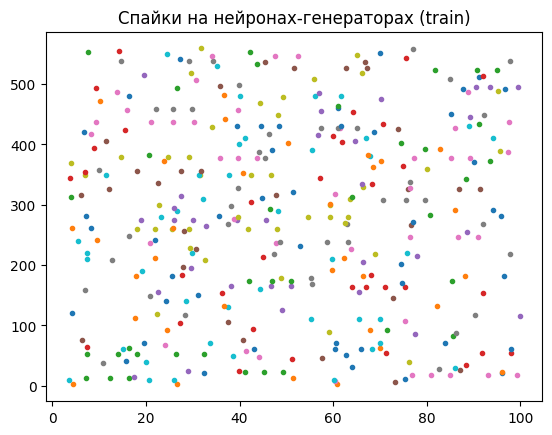

spike counts =  [0, 3, 0, 0, 0, 1, 1, 0, 0, 4, 1, 1, 3, 0, 1, 0, 5, 0, 0, 0, 2, 1, 3, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 5, 3, 0, 0, 1, 0, 0, 2, 4, 1, 1, 1, 0, 0, 1, 0, 0, 2, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 3, 0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 2, 0, 0, 1, 0, 1, 0, 0, 0, 4, 3, 0, 0, 1, 0, 0, 1, 0, 4, 0, 0, 0, 0, 1, 1, 0, 2, 3, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 2, 0, 1, 1, 0, 0, 2, 1, 3, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 3, 0, 1, 1, 1, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 6, 0, 1, 2, 0, 0, 1, 1, 0, 3, 1, 0, 1, 0, 0, 0, 5, 0, 1, 0, 4, 1, 3, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 1, 2, 0, 0, 1, 0, 1, 0, 0, 0, 3, 1, 1, 1, 0, 2, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 4, 1, 1,

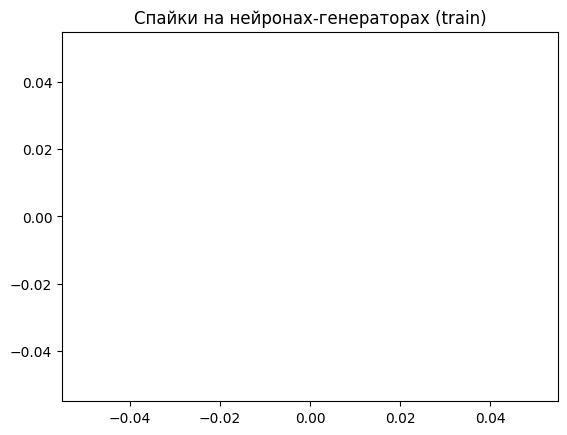

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

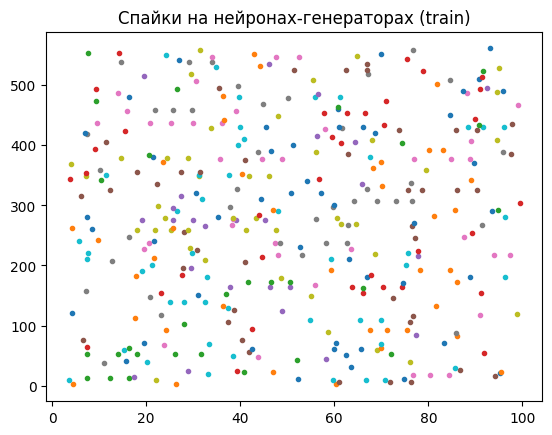

spike counts =  [0, 3, 0, 0, 0, 3, 0, 0, 1, 4, 2, 0, 3, 0, 1, 1, 3, 0, 0, 1, 1, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 6, 1, 0, 1, 0, 0, 1, 1, 3, 1, 1, 1, 0, 0, 1, 0, 0, 2, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 3, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 3, 0, 0, 0, 1, 0, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 0, 3, 1, 1, 3, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 3, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 6, 0, 1, 2, 0, 0, 1, 1, 1, 2, 2, 0, 1, 0, 0, 0, 5, 0, 1, 1, 4, 1, 2, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 1, 0, 0, 0, 4, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 5, 0, 2,

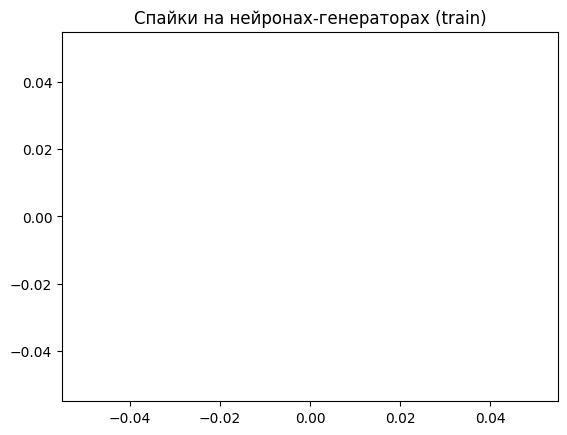

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

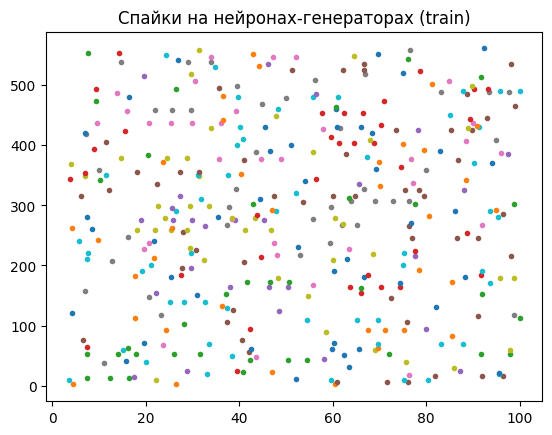

spike counts =  [0, 3, 0, 0, 0, 3, 0, 0, 1, 4, 1, 0, 3, 0, 1, 3, 1, 0, 0, 2, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 3, 0, 1, 0, 1, 0, 0, 1, 1, 0, 8, 0, 0, 1, 0, 0, 2, 1, 3, 1, 1, 1, 0, 0, 1, 0, 0, 4, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 4, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 3, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 1, 1, 1, 3, 0, 0, 0, 0, 0, 3, 0, 3, 1, 0, 3, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 3, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 6, 0, 1, 2, 0, 0, 1, 1, 1, 3, 1, 0, 1, 0, 0, 0, 5, 0, 1, 1, 4, 1, 2, 1, 0, 1, 0, 1, 0, 0, 0, 3, 1, 2, 0, 0, 1, 0, 0, 2, 3, 0, 0, 0, 3, 0, 0, 1, 0, 4, 0, 1, 1, 0, 1, 0, 1, 5, 0, 0, 0, 1, 0, 0, 0, 0, 1, 3, 0, 2,

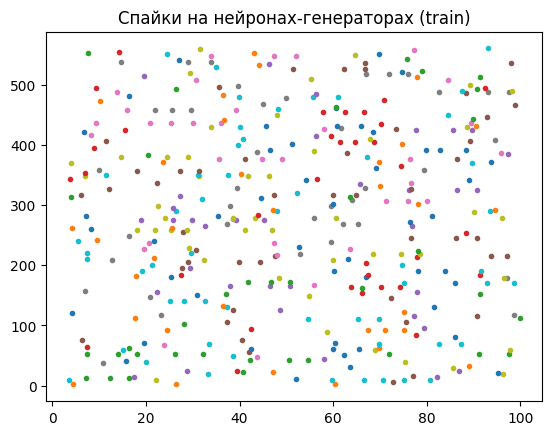

spike counts =  [0, 3, 0, 0, 0, 1, 0, 0, 1, 6, 1, 0, 3, 0, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 3, 0, 1, 0, 1, 0, 0, 1, 1, 0, 8, 0, 0, 1, 0, 0, 2, 1, 3, 1, 1, 1, 0, 0, 1, 0, 0, 4, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 4, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 3, 0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 2, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 3, 1, 0, 3, 0, 0, 0, 0, 1, 2, 0, 2, 1, 0, 3, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 3, 0, 1, 2, 1, 1, 1, 0, 1, 0, 3, 1, 1, 3, 2, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 6, 0, 1, 2, 0, 0, 2, 0, 0, 3, 0, 0, 1, 0, 0, 0, 5, 0, 1, 1, 5, 0, 3, 0, 0, 1, 0, 0, 0, 0, 1, 3, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 3, 1, 0, 1, 1, 0, 2, 0, 1, 4, 0, 0, 0, 1, 0, 0, 0, 0, 3, 2, 0, 2,

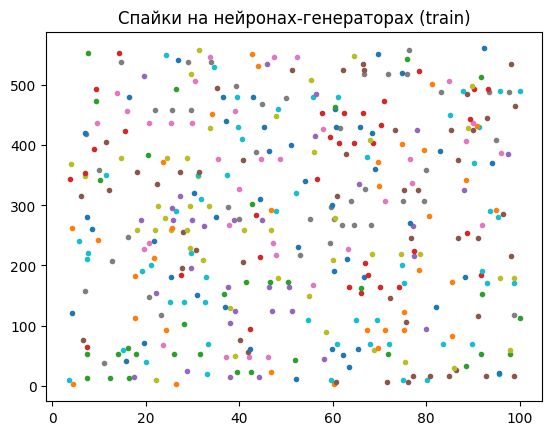

spike counts =  [0, 3, 0, 0, 0, 3, 0, 0, 1, 4, 1, 0, 3, 0, 3, 5, 0, 0, 0, 2, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 8, 0, 0, 1, 0, 0, 2, 1, 3, 1, 1, 1, 0, 0, 1, 0, 0, 6, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 4, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 3, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 1, 0, 0, 3, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 3, 0, 1, 3, 0, 0, 0, 0, 0, 3, 1, 3, 1, 0, 3, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 3, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 6, 0, 1, 2, 0, 0, 2, 0, 2, 3, 0, 0, 1, 0, 0, 0, 5, 0, 0, 3, 2, 1, 2, 1, 0, 1, 0, 1, 0, 0, 0, 3, 0, 2, 0, 0, 1, 0, 0, 2, 3, 0, 1, 0, 1, 0, 0, 0, 1, 3, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1, 3, 1, 1,

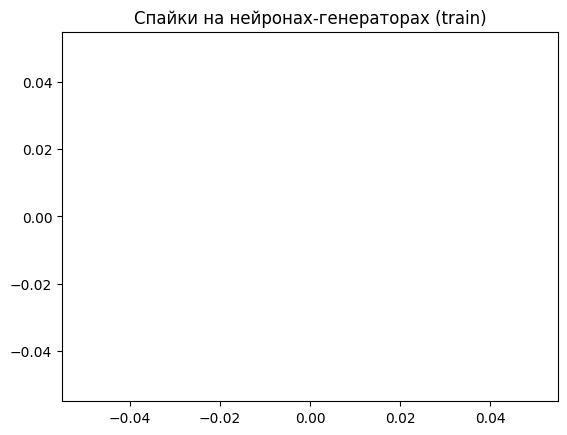

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

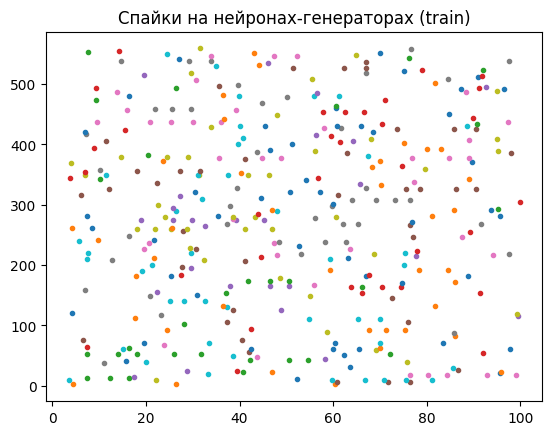

spike counts =  [0, 3, 0, 0, 0, 3, 0, 0, 1, 6, 1, 0, 3, 0, 1, 0, 5, 0, 0, 1, 1, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 3, 0, 1, 0, 1, 0, 0, 1, 1, 0, 6, 1, 0, 1, 0, 0, 1, 1, 4, 1, 1, 1, 0, 0, 1, 0, 0, 2, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 3, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 1, 0, 3, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 0, 2, 2, 1, 3, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 3, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 6, 0, 1, 2, 0, 0, 1, 1, 0, 4, 0, 0, 1, 0, 0, 0, 5, 0, 1, 1, 4, 0, 3, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 1, 0, 0, 0, 4, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 5, 0, 2,

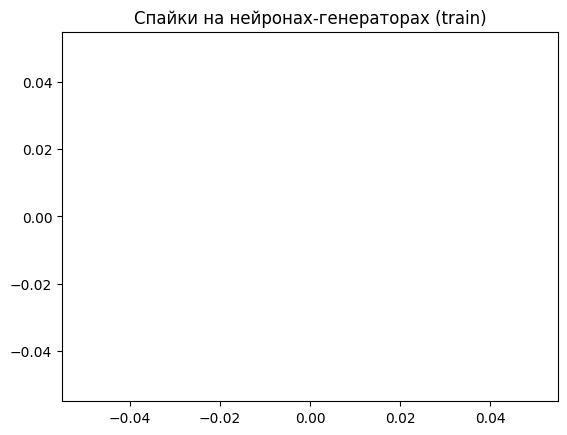

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

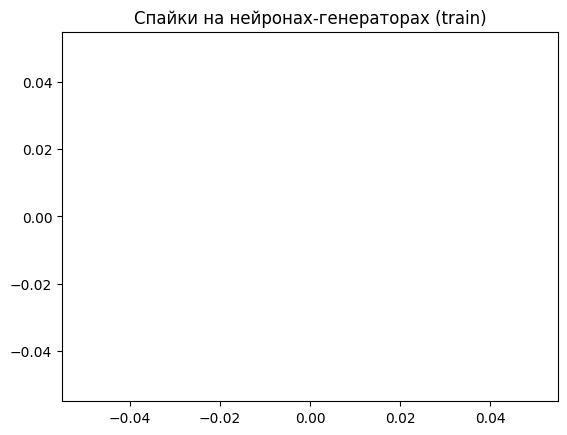

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

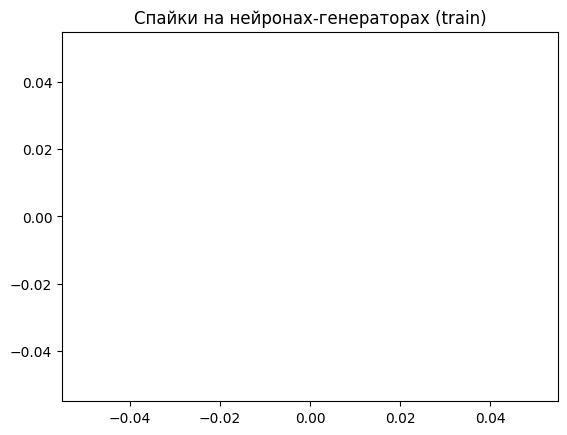

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

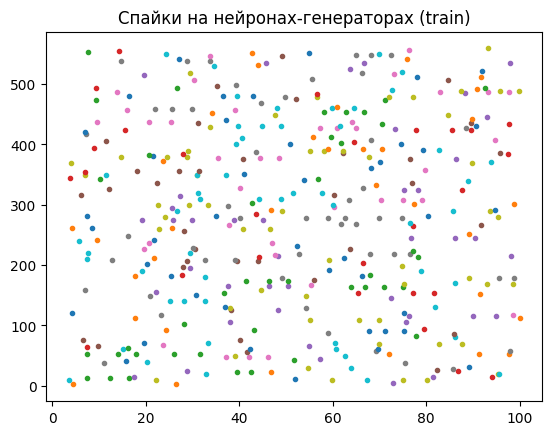

spike counts =  [0, 2, 0, 0, 1, 0, 0, 0, 4, 2, 1, 0, 3, 1, 2, 0, 0, 0, 1, 2, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 3, 0, 1, 1, 0, 3, 5, 0, 0, 1, 0, 2, 0, 2, 2, 0, 1, 1, 1, 1, 1, 0, 3, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 3, 0, 0, 2, 0, 0, 3, 0, 1, 1, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 3, 1, 0, 0, 1, 1, 0, 0, 0, 4, 0, 3, 0, 1, 0, 3, 1, 0, 0, 3, 0, 0, 1, 0, 3, 1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 3, 0, 3, 1, 1, 1, 1, 1, 1, 2, 0, 1, 4, 0, 2, 0, 0, 1, 0, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 3, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 3, 0, 1, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 5, 0, 0, 6, 2, 0, 3, 0, 0, 1, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 1, 0, 1, 1, 3, 1, 0, 2, 1, 0, 0, 0, 3, 1, 0, 3, 0, 0, 0, 0, 1, 2, 0, 0, 0, 3, 0, 0, 0, 1, 2, 1, 1, 1,

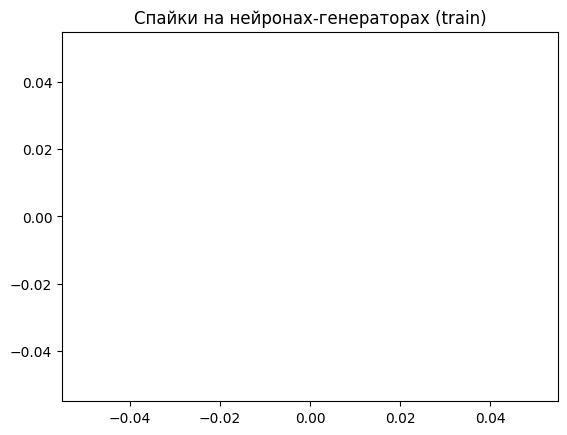

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

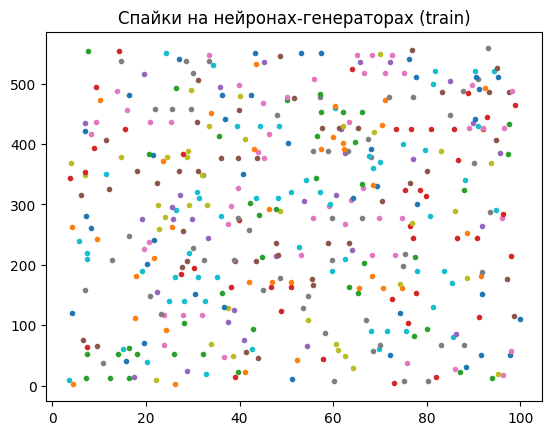

spike counts =  [0, 2, 0, 1, 0, 0, 0, 3, 1, 1, 1, 0, 4, 2, 1, 0, 1, 0, 1, 1, 0, 1, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 2, 0, 3, 0, 5, 0, 0, 1, 1, 1, 1, 3, 0, 0, 1, 1, 1, 1, 1, 3, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 3, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 3, 1, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 0, 0, 3, 1, 3, 0, 1, 0, 0, 1, 1, 0, 3, 0, 0, 0, 2, 0, 1, 1, 3, 0, 3, 0, 1, 0, 0, 0, 1, 0, 4, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 3, 0, 4, 0, 2, 0, 1, 2, 1, 1, 1, 3, 1, 0, 2, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 3, 1, 0, 0, 1, 1, 1, 0, 3, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 2, 0, 1, 0, 0, 0, 0, 1, 3, 0, 4, 3, 1, 2, 1, 0, 1, 1, 0, 0, 0, 1, 2, 2, 0, 1, 1, 0, 1, 0, 2, 0, 3, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 3, 1, 0, 0, 1, 2, 1, 0, 0, 0, 3, 0, 0, 1, 2, 0, 1, 2, 0,

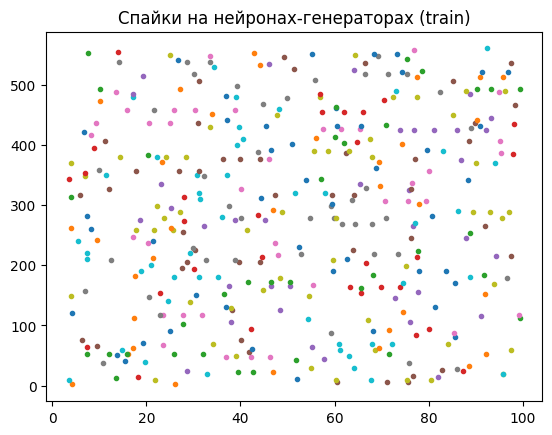

spike counts =  [0, 2, 0, 0, 0, 3, 0, 0, 4, 2, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 3, 0, 1, 1, 1, 2, 6, 0, 0, 1, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1, 1, 0, 2, 3, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 4, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 1, 1, 2, 1, 0, 0, 1, 1, 0, 0, 0, 1, 3, 3, 0, 1, 0, 1, 1, 1, 0, 3, 0, 0, 0, 0, 1, 1, 4, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 3, 0, 3, 1, 1, 1, 1, 0, 2, 1, 1, 1, 3, 0, 2, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 4, 0, 1, 2, 0, 0, 2, 1, 0, 3, 0, 1, 0, 0, 0, 1, 3, 0, 0, 4, 3, 1, 2, 0, 0, 1, 0, 0, 0, 0, 5, 1, 0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 3, 1, 0, 1, 1, 0, 1, 1, 0, 4, 0, 0, 0, 3, 0, 0, 0, 0, 1, 2, 1, 1,

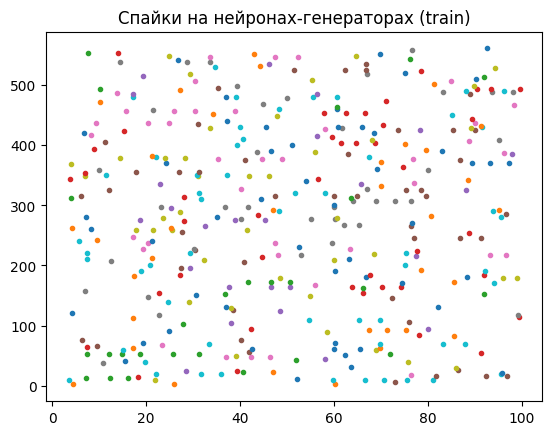

spike counts =  [0, 3, 0, 0, 0, 1, 0, 0, 1, 6, 1, 0, 3, 1, 0, 3, 1, 0, 0, 4, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 7, 1, 0, 1, 0, 0, 1, 1, 3, 2, 0, 1, 0, 1, 1, 0, 0, 4, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 3, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 3, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 1, 1, 1, 3, 0, 0, 0, 0, 0, 3, 0, 2, 1, 0, 3, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 0, 3, 1, 1, 3, 0, 0, 0, 1, 0, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 4, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 0, 0, 1, 3, 0, 0, 3, 2, 1, 2, 1, 0, 1, 0, 1, 0, 0, 1, 2, 0, 2, 0, 0, 1, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0, 0, 4, 0, 1, 1, 0, 2, 1, 0, 5, 0, 0, 0, 3, 0, 0, 0, 0, 1, 3, 1, 1,

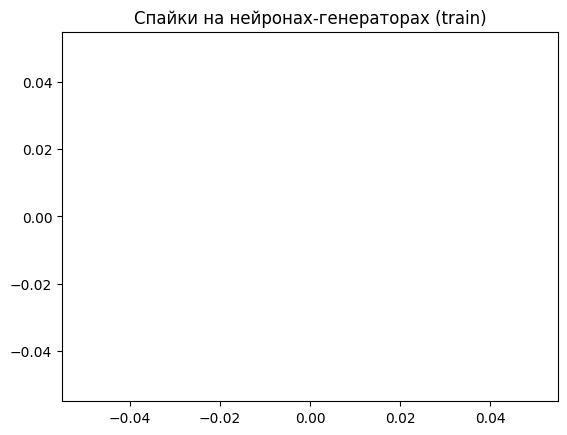

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

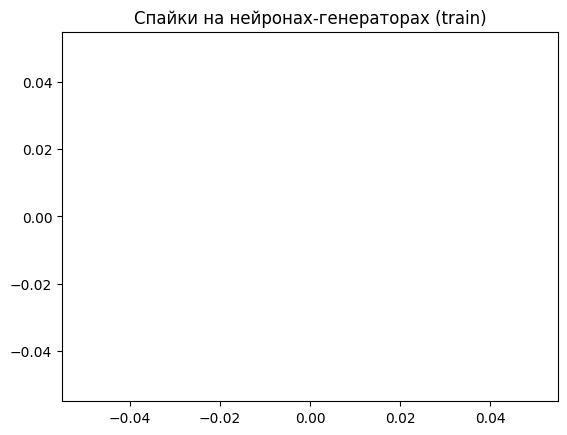

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

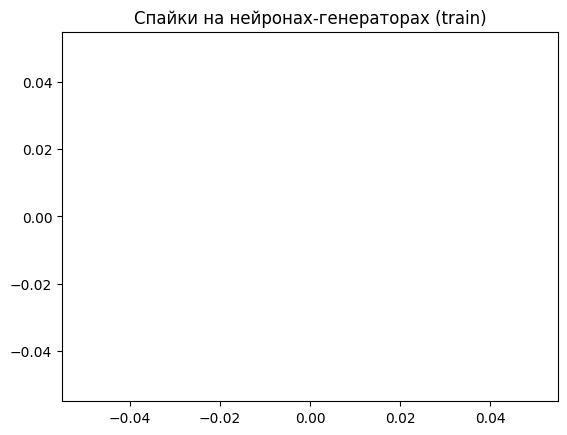

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

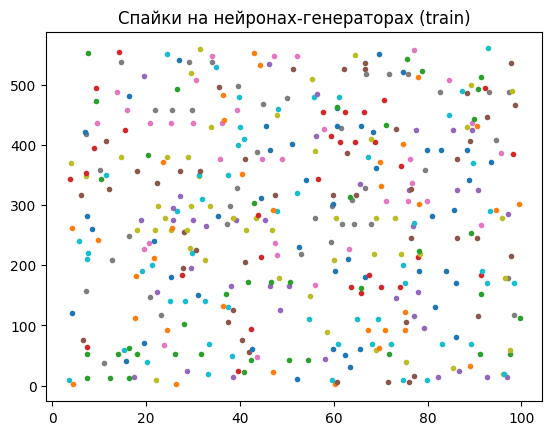

spike counts =  [0, 3, 0, 0, 0, 3, 0, 0, 1, 4, 1, 0, 3, 0, 5, 1, 0, 0, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 3, 0, 1, 0, 1, 0, 0, 1, 1, 0, 8, 0, 0, 1, 0, 0, 2, 1, 3, 1, 1, 1, 0, 0, 1, 0, 0, 6, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 4, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 3, 0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 3, 1, 0, 3, 0, 0, 0, 0, 1, 2, 0, 2, 1, 0, 3, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 0, 1, 1, 1, 3, 2, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 6, 0, 1, 2, 0, 0, 2, 0, 1, 4, 0, 1, 0, 0, 0, 0, 5, 0, 0, 1, 7, 0, 3, 0, 0, 1, 1, 0, 0, 0, 0, 3, 1, 2, 0, 0, 1, 0, 0, 2, 3, 0, 1, 2, 1, 0, 0, 0, 3, 1, 0, 1, 1, 0, 1, 0, 1, 4, 0, 0, 0, 1, 0, 0, 0, 0, 3, 2, 0, 2,

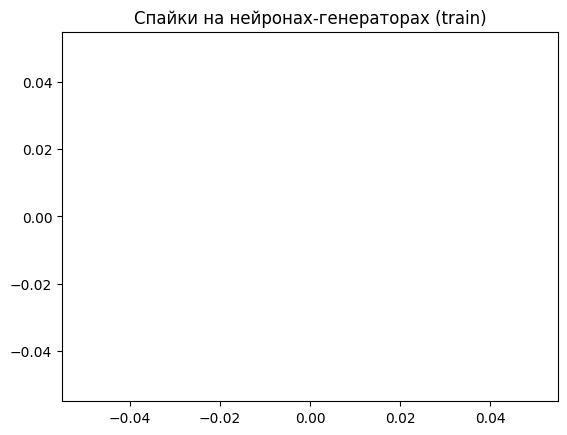

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

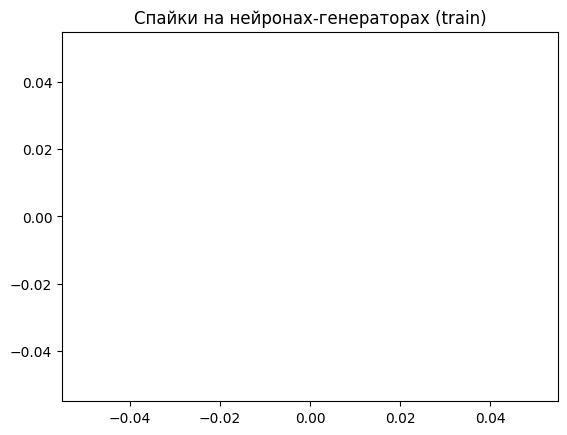

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

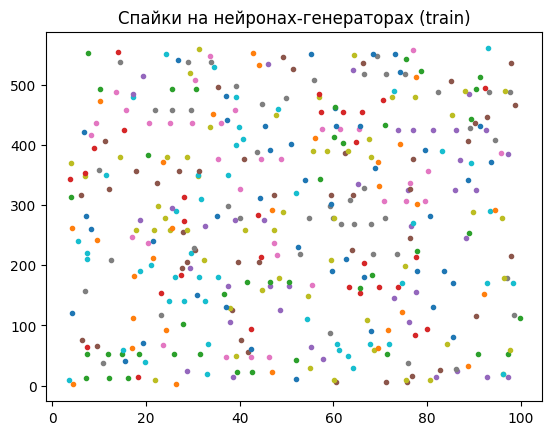

spike counts =  [0, 2, 0, 0, 0, 3, 0, 0, 4, 1, 1, 0, 3, 1, 4, 1, 0, 0, 1, 2, 0, 1, 2, 0, 2, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 3, 0, 1, 1, 0, 0, 9, 0, 0, 1, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1, 1, 0, 1, 4, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 2, 1, 0, 0, 1, 1, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 3, 1, 0, 3, 0, 0, 0, 0, 1, 2, 3, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 3, 0, 1, 2, 1, 1, 1, 0, 2, 0, 1, 1, 3, 0, 2, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 6, 0, 1, 2, 0, 0, 2, 0, 0, 3, 0, 1, 0, 0, 0, 1, 3, 0, 0, 4, 3, 0, 3, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 3, 1, 0, 1, 1, 0, 1, 1, 0, 4, 0, 0, 0, 1, 0, 0, 0, 0, 3, 2, 1, 1,

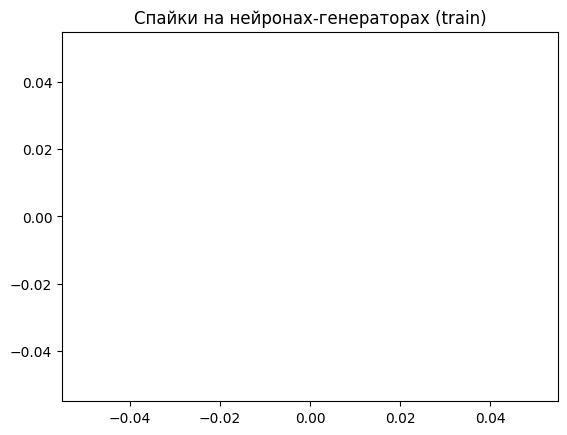

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

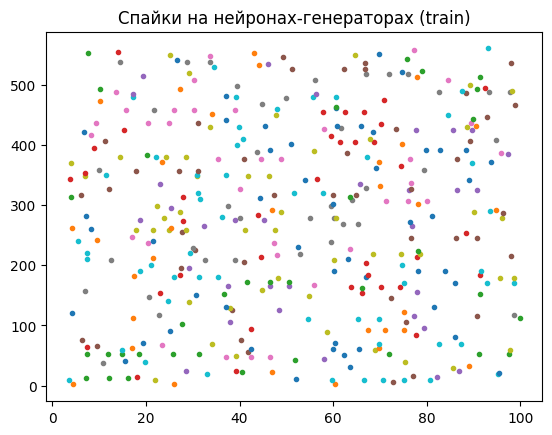

spike counts =  [0, 3, 0, 0, 0, 1, 0, 0, 1, 6, 1, 0, 3, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 9, 0, 0, 1, 0, 0, 2, 1, 3, 2, 0, 1, 0, 1, 1, 0, 1, 3, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 3, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 3, 0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 3, 1, 0, 3, 0, 0, 0, 0, 0, 3, 3, 1, 1, 0, 3, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 3, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 3, 2, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 6, 0, 1, 2, 0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 1, 3, 0, 0, 3, 3, 1, 2, 0, 0, 1, 0, 1, 0, 0, 3, 1, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 3, 1, 0, 1, 1, 0, 2, 1, 0, 4, 0, 0, 0, 3, 0, 0, 0, 0, 3, 2, 1, 1,

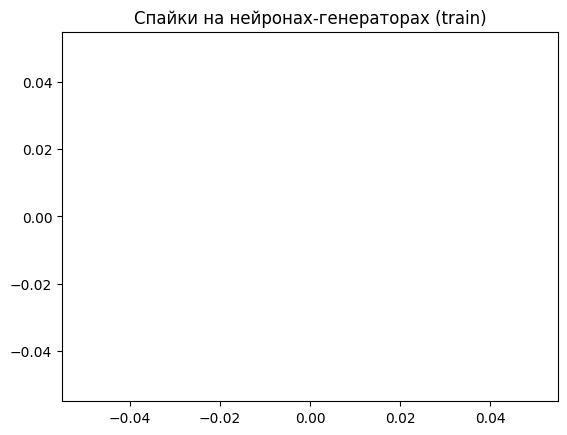

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

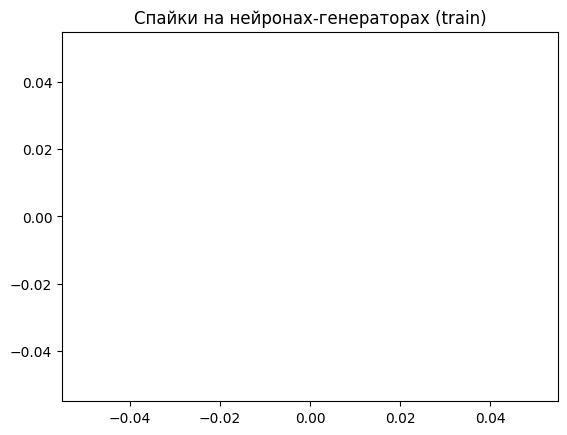

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

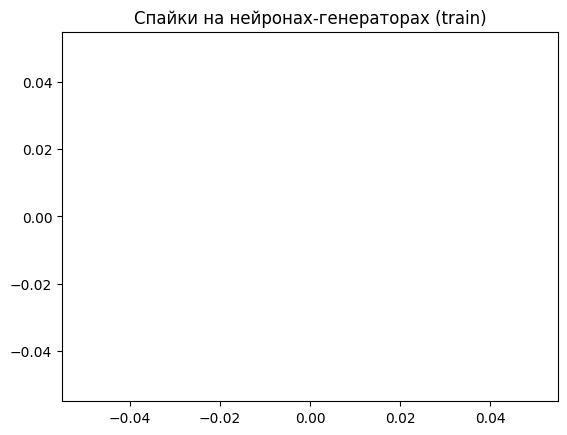

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

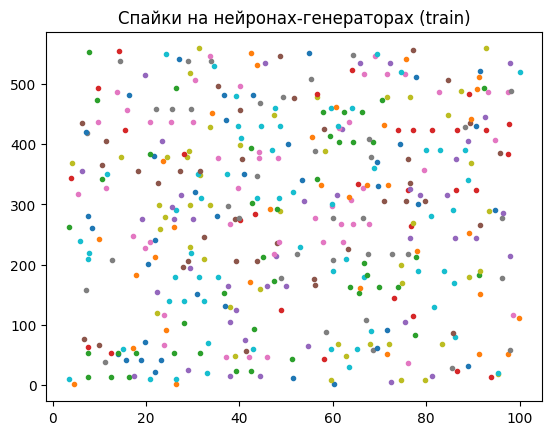

spike counts =  [1, 2, 0, 0, 1, 0, 0, 0, 3, 3, 1, 0, 3, 1, 4, 0, 0, 0, 1, 2, 1, 0, 2, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 3, 0, 1, 1, 0, 0, 3, 0, 2, 0, 1, 3, 5, 1, 0, 1, 0, 2, 0, 4, 1, 1, 0, 1, 1, 1, 1, 0, 4, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1, 1, 0, 0, 1, 3, 0, 3, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 2, 1, 4, 0, 1, 2, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 3, 0, 2, 1, 2, 0, 1, 2, 0, 2, 0, 1, 4, 0, 2, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 4, 0, 0, 1, 1, 1, 0, 0, 3, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 4, 0, 1, 0, 0, 0, 0, 1, 3, 1, 1, 4, 1, 1, 2, 0, 0, 1, 1, 0, 0, 0, 2, 2, 1, 1, 1, 0, 1, 0, 1, 1, 3, 1, 1, 0, 1, 0, 1, 3, 1, 0, 0, 3, 0, 1, 0, 0, 4, 0, 1, 0, 0, 1, 1, 0, 0, 3, 1, 0, 3, 0,

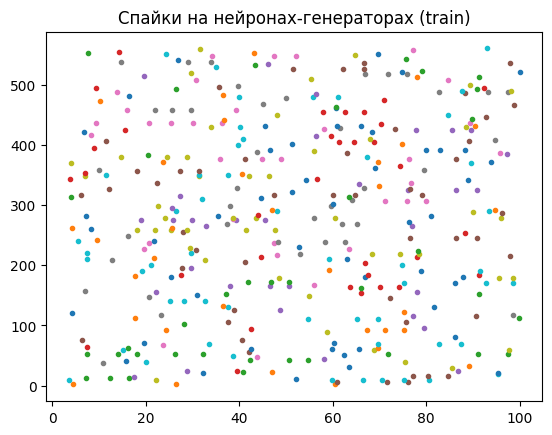

spike counts =  [0, 3, 0, 0, 0, 3, 0, 0, 1, 6, 1, 0, 3, 0, 1, 3, 0, 0, 0, 1, 2, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 3, 0, 1, 0, 1, 0, 0, 1, 1, 0, 8, 0, 0, 1, 0, 0, 2, 1, 3, 1, 1, 1, 0, 0, 1, 0, 0, 4, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 4, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 3, 0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 2, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 3, 1, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 1, 0, 3, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 1, 1, 2, 1, 1, 0, 2, 0, 1, 1, 1, 3, 2, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 3, 0, 1, 1, 1, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 6, 0, 1, 2, 0, 0, 2, 0, 0, 3, 0, 0, 1, 0, 0, 0, 5, 0, 1, 1, 5, 0, 3, 0, 0, 1, 0, 1, 0, 0, 1, 3, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 3, 1, 0, 1, 1, 0, 2, 0, 1, 5, 0, 0, 0, 0, 1, 0, 0, 0, 3, 2, 0, 2,

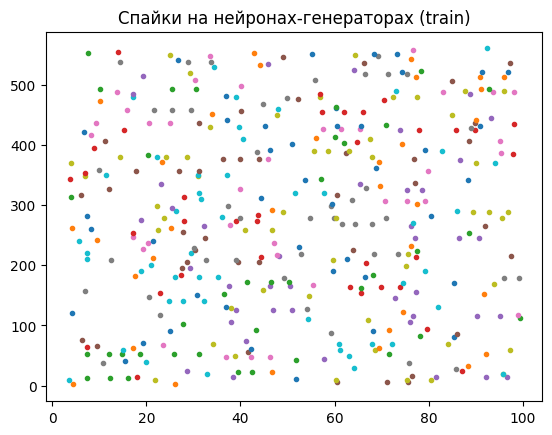

spike counts =  [0, 2, 0, 0, 0, 3, 0, 0, 4, 1, 1, 0, 3, 1, 4, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 3, 0, 1, 1, 0, 1, 7, 0, 0, 1, 0, 0, 2, 2, 1, 2, 0, 1, 0, 1, 1, 0, 2, 3, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 3, 0, 1, 1, 0, 0, 1, 1, 0, 0, 3, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 2, 1, 0, 0, 1, 1, 0, 0, 0, 1, 3, 3, 0, 1, 0, 1, 1, 1, 0, 3, 0, 0, 0, 0, 3, 0, 3, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 3, 0, 3, 1, 1, 1, 1, 0, 2, 1, 1, 1, 3, 1, 2, 0, 0, 1, 0, 0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 3, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 3, 0, 1, 2, 0, 0, 2, 1, 1, 3, 0, 1, 0, 0, 0, 3, 1, 0, 0, 4, 3, 1, 2, 0, 0, 1, 0, 0, 0, 0, 4, 2, 0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 3, 1, 0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 2, 1, 1, 1,

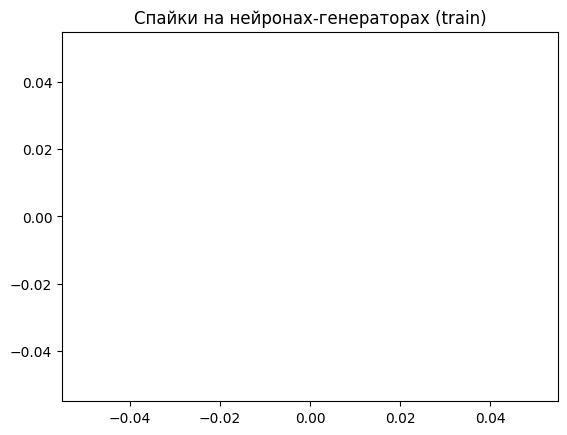

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

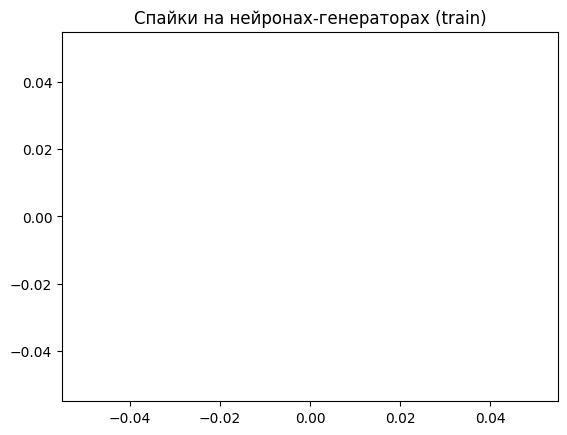

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

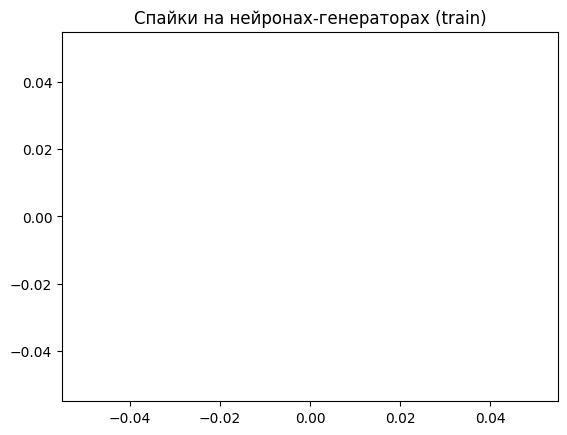

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

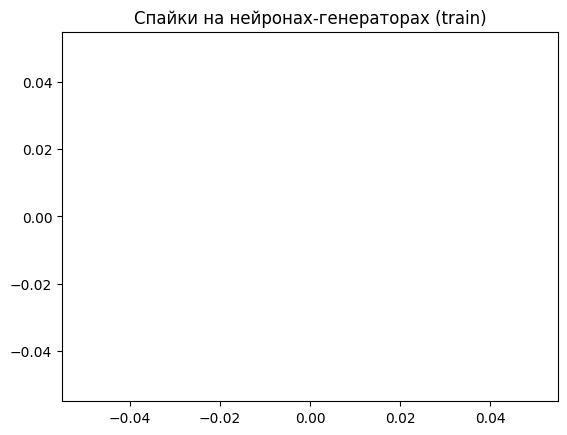

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

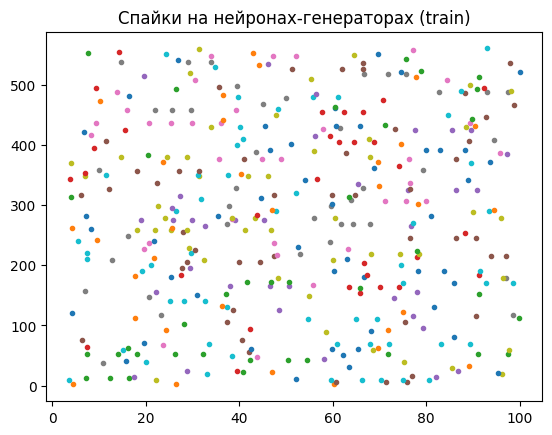

spike counts =  [0, 3, 0, 0, 0, 3, 0, 0, 1, 6, 1, 0, 3, 0, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 3, 0, 1, 0, 1, 0, 0, 1, 1, 0, 8, 0, 0, 1, 0, 0, 2, 1, 3, 1, 1, 1, 0, 0, 1, 0, 0, 6, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 3, 0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 3, 1, 0, 3, 0, 0, 0, 0, 1, 2, 0, 2, 1, 0, 3, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 3, 0, 1, 2, 1, 1, 1, 0, 1, 0, 3, 1, 1, 3, 2, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 6, 0, 1, 2, 0, 0, 2, 0, 0, 4, 0, 1, 0, 0, 0, 0, 5, 0, 1, 1, 5, 0, 3, 0, 0, 1, 0, 0, 0, 0, 1, 3, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 3, 1, 0, 1, 1, 0, 2, 0, 1, 4, 0, 0, 0, 1, 0, 0, 0, 0, 3, 2, 0, 2,

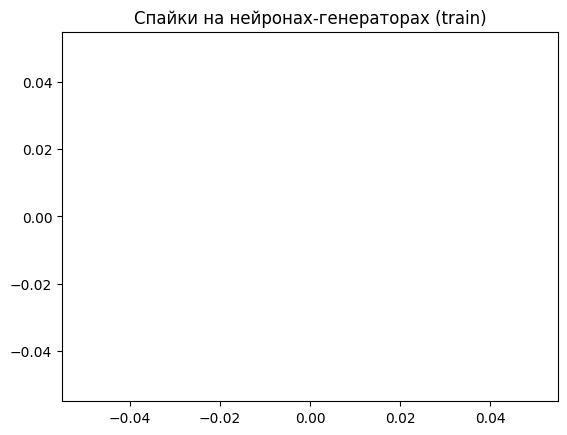

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

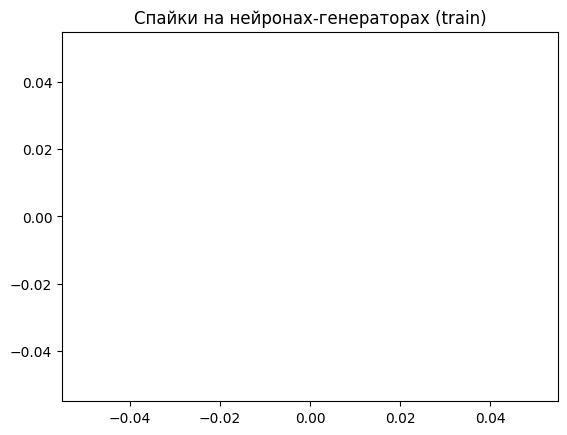

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

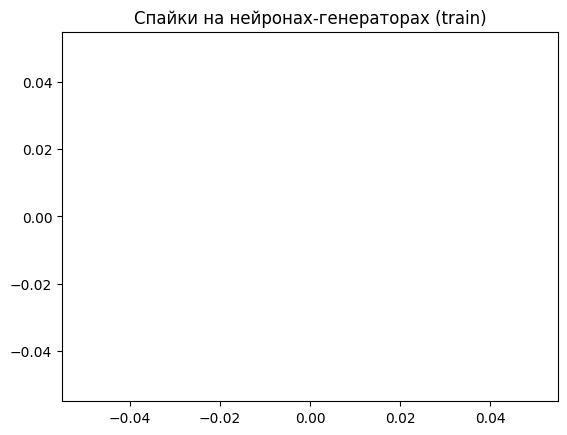

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

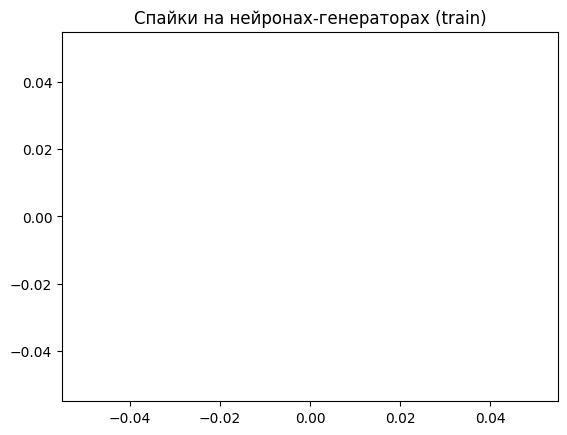

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

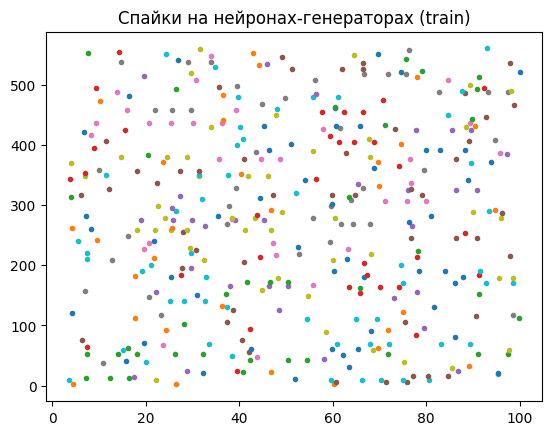

spike counts =  [0, 3, 0, 0, 0, 3, 0, 0, 1, 6, 1, 0, 3, 0, 1, 3, 0, 0, 0, 1, 2, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 3, 0, 1, 0, 1, 0, 0, 1, 1, 0, 8, 0, 0, 1, 0, 0, 2, 1, 3, 1, 1, 1, 0, 0, 1, 0, 0, 6, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 3, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 3, 1, 0, 3, 0, 0, 0, 0, 0, 3, 1, 3, 1, 0, 3, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 0, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 6, 0, 1, 2, 0, 0, 2, 0, 0, 4, 0, 0, 1, 0, 0, 0, 5, 0, 1, 1, 5, 0, 3, 0, 0, 1, 0, 1, 0, 0, 2, 2, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 3, 1, 0, 1, 1, 0, 2, 0, 1, 5, 0, 0, 0, 1, 0, 0, 0, 0, 3, 2, 0, 2,

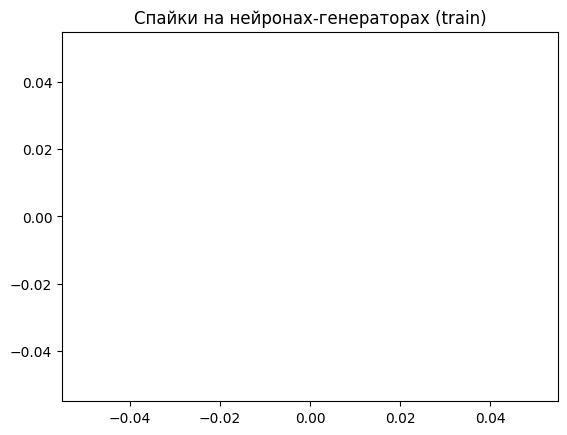

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

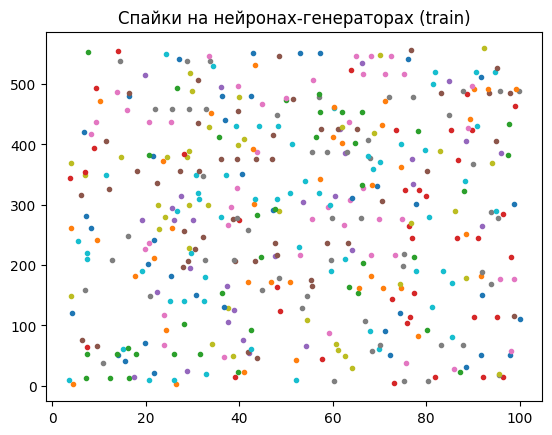

spike counts =  [0, 2, 0, 1, 0, 0, 0, 3, 0, 4, 0, 0, 3, 4, 1, 0, 0, 1, 1, 1, 1, 1, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 2, 0, 4, 0, 5, 0, 1, 1, 1, 1, 1, 3, 0, 0, 1, 1, 1, 1, 1, 3, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 3, 0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 0, 0, 3, 1, 1, 1, 1, 0, 1, 1, 1, 0, 3, 0, 0, 0, 1, 2, 1, 1, 1, 1, 3, 0, 0, 0, 0, 0, 1, 0, 4, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 3, 0, 4, 0, 2, 0, 1, 2, 1, 1, 1, 3, 1, 0, 2, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 3, 1, 0, 0, 1, 1, 1, 0, 3, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 2, 0, 1, 0, 0, 0, 0, 1, 3, 1, 3, 4, 1, 2, 1, 0, 1, 1, 0, 0, 0, 1, 2, 2, 1, 0, 1, 0, 1, 0, 2, 0, 3, 1, 2, 1, 0, 0, 1, 1, 1, 0, 0, 3, 1, 0, 0, 1, 2, 1, 0, 0, 0, 3, 0, 0, 1, 2, 0, 1, 2, 0,

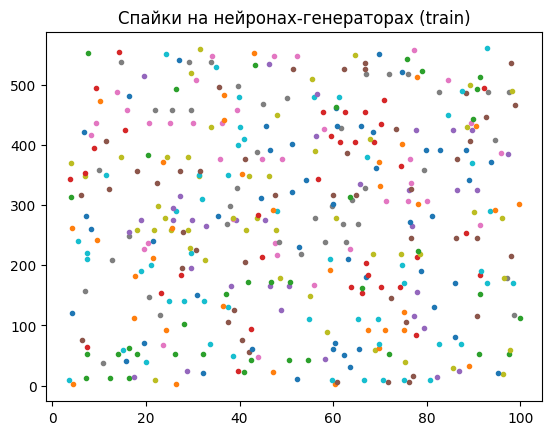

spike counts =  [0, 3, 0, 0, 0, 3, 0, 0, 1, 6, 1, 0, 3, 0, 2, 1, 0, 0, 1, 0, 2, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 3, 0, 1, 0, 1, 0, 0, 1, 1, 0, 8, 0, 0, 1, 0, 0, 2, 1, 3, 1, 1, 1, 0, 0, 1, 0, 0, 4, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 4, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 3, 0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 2, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 3, 1, 0, 3, 0, 0, 0, 0, 1, 2, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 1, 1, 2, 1, 1, 0, 2, 0, 1, 1, 1, 3, 2, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 3, 0, 1, 1, 1, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 6, 0, 1, 2, 0, 0, 2, 0, 1, 3, 0, 0, 1, 0, 0, 0, 5, 0, 1, 1, 5, 0, 3, 0, 0, 1, 0, 0, 0, 0, 1, 3, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 0, 0, 0, 3, 1, 0, 1, 1, 0, 2, 0, 1, 4, 0, 0, 0, 0, 1, 0, 0, 0, 3, 2, 0, 2,

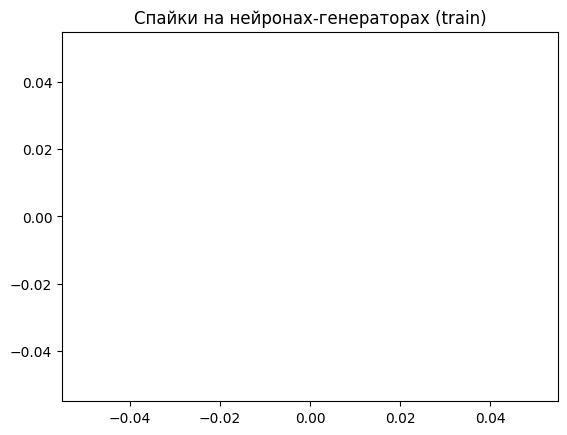

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

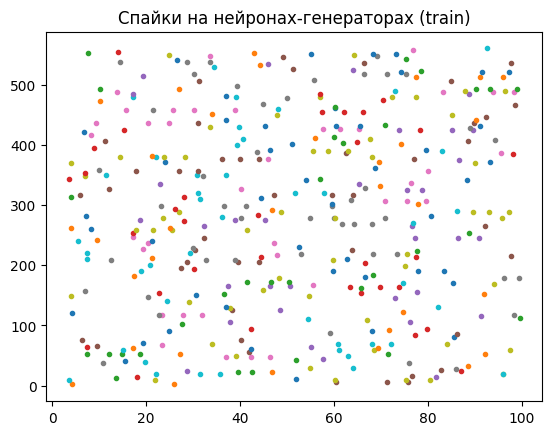

spike counts =  [0, 2, 0, 0, 0, 3, 0, 0, 4, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 4, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 3, 0, 1, 1, 0, 2, 5, 0, 0, 1, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1, 1, 0, 2, 3, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 3, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 1, 1, 2, 1, 0, 0, 1, 1, 0, 0, 0, 1, 3, 3, 0, 1, 0, 1, 1, 1, 0, 3, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 3, 0, 3, 1, 1, 1, 1, 0, 2, 0, 1, 1, 3, 1, 2, 0, 0, 1, 0, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 3, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 4, 0, 1, 2, 0, 0, 2, 1, 0, 3, 0, 1, 0, 0, 0, 1, 3, 0, 0, 4, 3, 1, 2, 0, 0, 1, 0, 0, 0, 0, 5, 1, 0, 1, 0, 1, 0, 0, 0, 4, 0, 0, 1, 1, 0, 0, 0, 0, 3, 1, 0, 1, 1, 0, 1, 1, 0, 4, 0, 0, 0, 3, 0, 0, 0, 0, 2, 1, 1, 1,

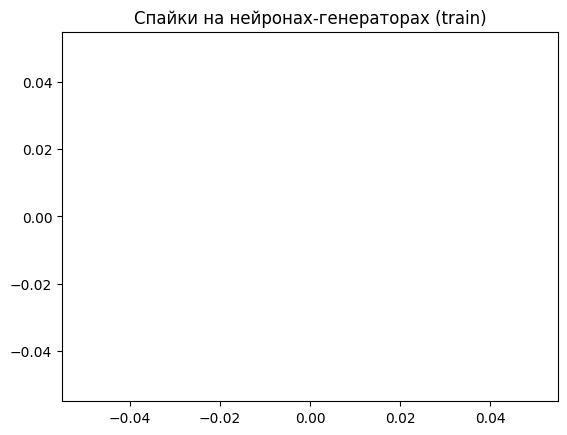

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

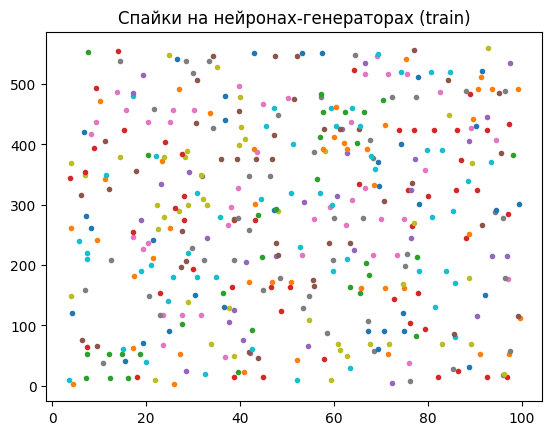

spike counts =  [0, 2, 0, 0, 1, 0, 0, 1, 2, 2, 0, 0, 3, 6, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 2, 0, 0, 4, 4, 0, 1, 1, 0, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 0, 6, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 4, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 3, 1, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 3, 1, 3, 0, 1, 0, 0, 1, 1, 0, 3, 0, 0, 0, 1, 1, 2, 1, 3, 0, 1, 1, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 4, 0, 2, 0, 1, 2, 0, 3, 1, 3, 1, 0, 2, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 3, 1, 0, 0, 1, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 3, 1, 1, 3, 4, 1, 2, 1, 0, 1, 1, 0, 0, 0, 1, 2, 1, 2, 0, 1, 1, 0, 0, 2, 0, 3, 1, 2, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 3, 0, 0, 0, 3, 1, 1, 2, 0,

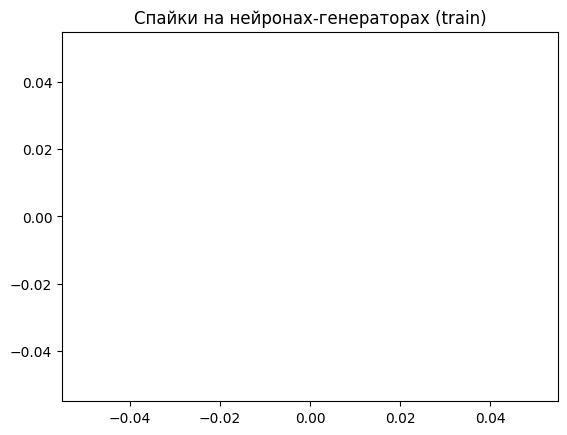

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

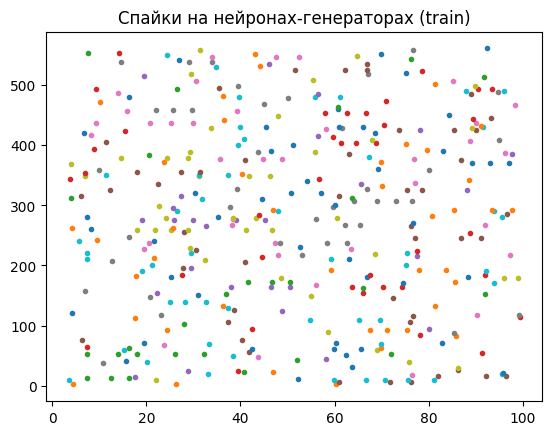

spike counts =  [0, 3, 0, 0, 0, 3, 0, 0, 1, 6, 1, 0, 3, 0, 1, 3, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 6, 1, 0, 1, 0, 0, 1, 1, 3, 1, 1, 1, 0, 0, 1, 0, 0, 2, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 4, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 3, 0, 1, 0, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 1, 1, 1, 3, 0, 0, 0, 0, 0, 3, 0, 3, 1, 0, 3, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 0, 2, 1, 1, 3, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 3, 0, 1, 1, 1, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 6, 0, 1, 2, 0, 0, 1, 1, 2, 2, 0, 0, 1, 0, 0, 0, 5, 0, 1, 1, 4, 1, 2, 1, 0, 1, 0, 1, 0, 0, 0, 3, 0, 4, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 4, 0, 1, 1, 0, 2, 0, 1, 2, 0, 0, 0, 0, 3, 0, 0, 0, 1, 3, 0, 2,

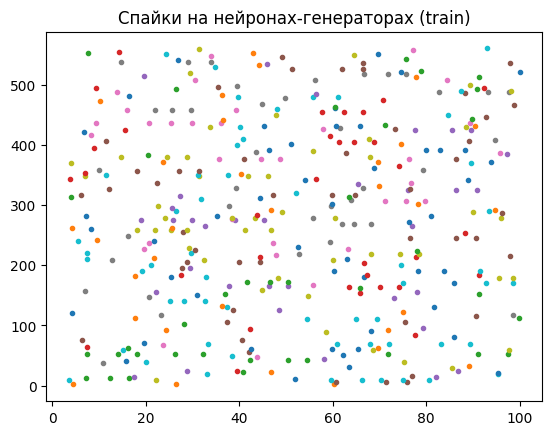

spike counts =  [0, 3, 0, 0, 0, 3, 0, 0, 1, 6, 1, 0, 3, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 3, 0, 1, 0, 1, 0, 0, 1, 1, 0, 8, 0, 0, 1, 0, 0, 2, 1, 3, 1, 1, 1, 0, 0, 1, 0, 0, 6, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 3, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 3, 1, 0, 3, 0, 0, 0, 0, 0, 3, 1, 2, 1, 0, 3, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 3, 0, 1, 2, 1, 1, 1, 0, 2, 0, 1, 1, 1, 3, 2, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 6, 0, 1, 2, 0, 0, 2, 0, 0, 3, 0, 0, 1, 0, 0, 0, 5, 0, 1, 1, 5, 0, 3, 0, 0, 1, 0, 1, 0, 0, 2, 2, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 3, 1, 0, 1, 1, 0, 2, 0, 1, 4, 0, 0, 0, 1, 0, 0, 0, 0, 3, 2, 0, 2,

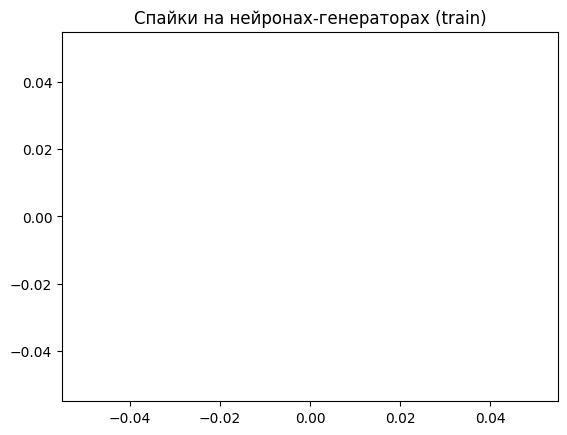

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

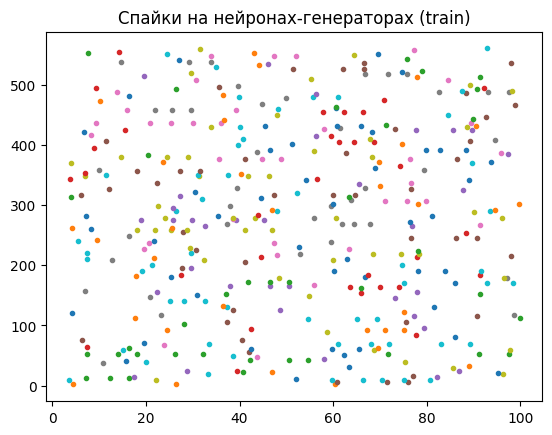

spike counts =  [0, 3, 0, 0, 0, 3, 0, 0, 1, 6, 1, 0, 3, 0, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 3, 0, 1, 0, 1, 0, 0, 1, 1, 0, 8, 0, 0, 1, 0, 0, 2, 1, 3, 1, 1, 1, 0, 0, 1, 0, 0, 6, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 4, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 3, 0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 3, 1, 0, 3, 0, 0, 0, 0, 1, 2, 0, 2, 1, 0, 3, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 0, 1, 1, 1, 3, 2, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 6, 0, 1, 2, 0, 0, 2, 0, 1, 4, 0, 0, 1, 0, 0, 0, 5, 0, 1, 1, 5, 0, 3, 0, 0, 1, 0, 0, 0, 0, 1, 3, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 0, 0, 0, 3, 1, 0, 1, 1, 0, 2, 0, 1, 4, 0, 0, 0, 1, 1, 0, 0, 0, 1, 2, 0, 2,

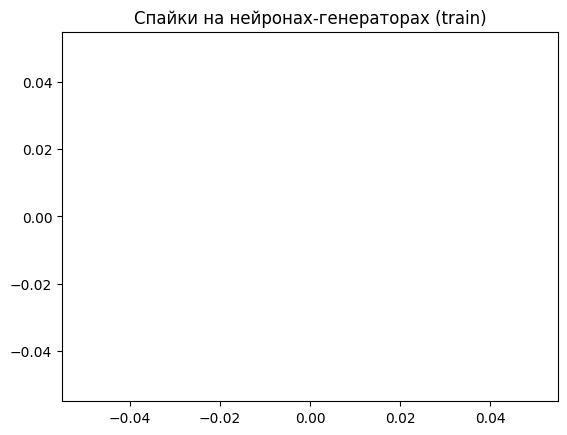

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

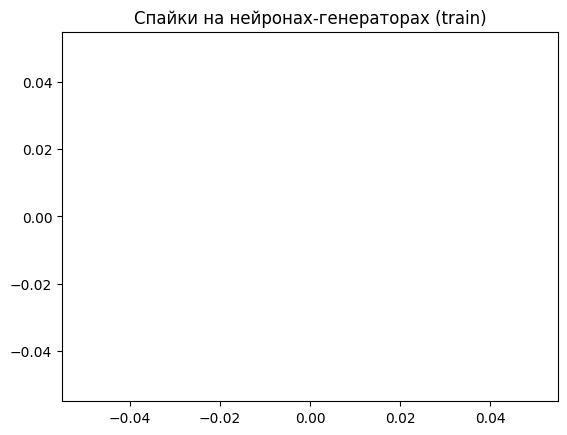

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

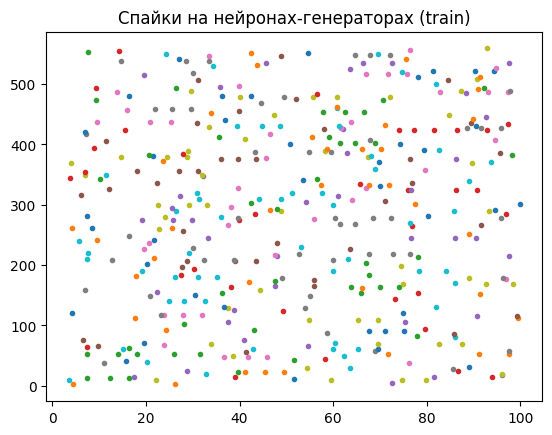

spike counts =  [0, 2, 0, 0, 1, 0, 0, 0, 4, 1, 1, 0, 3, 2, 2, 0, 0, 1, 1, 1, 0, 3, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 3, 0, 1, 1, 0, 3, 5, 0, 0, 1, 0, 2, 0, 4, 1, 0, 1, 1, 1, 1, 1, 0, 4, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 3, 0, 0, 2, 0, 0, 1, 1, 3, 1, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 1, 0, 0, 1, 1, 2, 1, 3, 0, 1, 1, 1, 0, 0, 0, 0, 0, 4, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 3, 0, 4, 0, 2, 0, 1, 1, 0, 2, 0, 1, 4, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 4, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 0, 1, 3, 0, 1, 5, 1, 1, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 3, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 3, 0, 0, 0, 0, 2, 1, 0, 0, 0, 3, 0, 0, 0, 3, 1, 1, 2, 0,

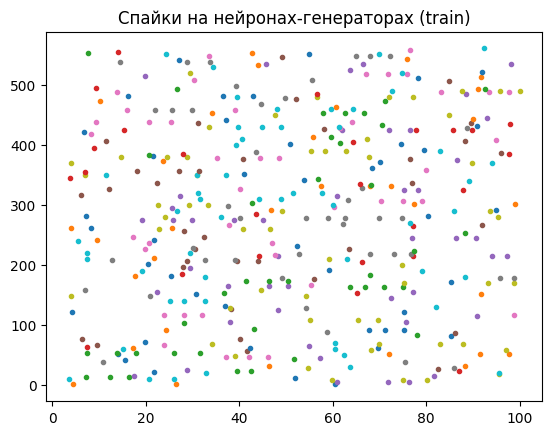

spike counts =  [1, 2, 0, 0, 3, 0, 0, 0, 3, 3, 1, 0, 3, 0, 2, 0, 0, 0, 1, 2, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 0, 3, 0, 1, 1, 1, 3, 5, 0, 0, 1, 0, 0, 2, 2, 2, 1, 0, 1, 1, 1, 1, 0, 4, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 4, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 1, 1, 1, 2, 0, 0, 1, 1, 0, 0, 0, 4, 0, 3, 0, 1, 0, 3, 0, 1, 0, 3, 0, 0, 1, 0, 3, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 3, 0, 3, 1, 2, 0, 1, 0, 2, 3, 0, 1, 4, 0, 2, 0, 0, 1, 0, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 3, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 3, 0, 1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 5, 0, 0, 6, 2, 1, 2, 0, 0, 1, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 1, 0, 1, 1, 3, 1, 0, 2, 1, 0, 0, 0, 3, 1, 0, 3, 0, 0, 0, 0, 2, 1, 0, 0, 0, 3, 0, 0, 0, 1, 2, 1, 1, 1,

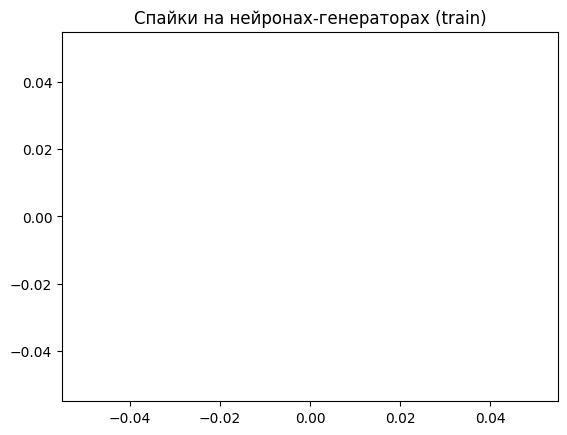

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

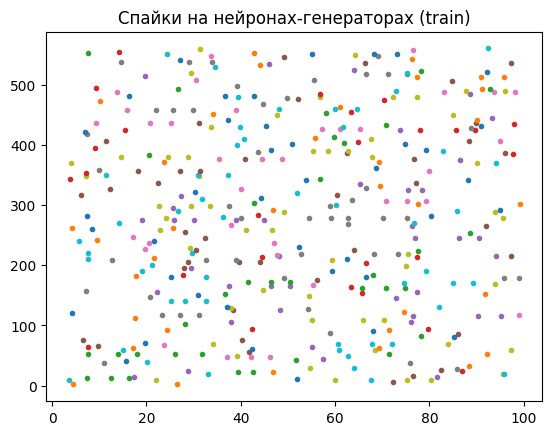

spike counts =  [0, 2, 0, 0, 0, 1, 0, 0, 4, 2, 1, 0, 3, 0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 3, 0, 1, 1, 0, 1, 6, 0, 0, 1, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1, 1, 0, 2, 3, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 3, 0, 0, 1, 0, 0, 3, 0, 1, 3, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 1, 1, 0, 0, 0, 3, 1, 3, 0, 1, 0, 1, 3, 0, 0, 3, 0, 0, 1, 0, 3, 0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 3, 0, 3, 1, 1, 1, 1, 0, 2, 2, 1, 1, 3, 1, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 3, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 3, 0, 1, 2, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0, 0, 0, 5, 0, 0, 6, 2, 1, 2, 0, 0, 1, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 1, 0, 0, 2, 3, 1, 0, 2, 1, 0, 0, 0, 3, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 1, 0, 0, 0, 2, 1, 1, 1,

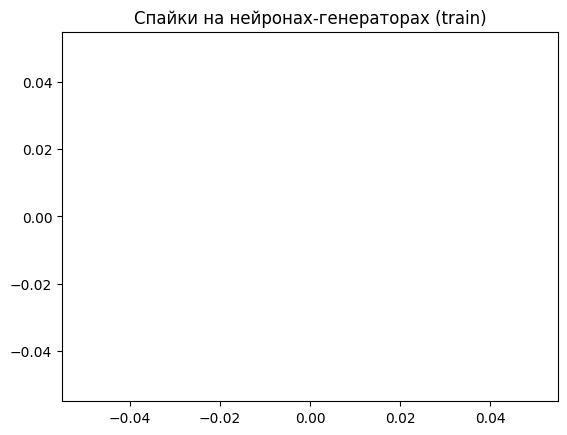

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

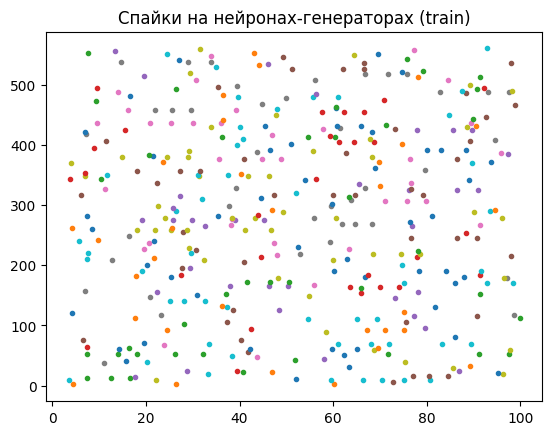

spike counts =  [0, 3, 0, 0, 0, 1, 0, 0, 1, 6, 1, 0, 3, 0, 1, 3, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 8, 0, 0, 1, 0, 0, 2, 0, 4, 1, 1, 1, 0, 0, 1, 0, 0, 6, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 4, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 3, 0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 3, 1, 0, 3, 0, 0, 0, 0, 1, 2, 0, 3, 1, 0, 3, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 0, 1, 1, 1, 3, 2, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 6, 0, 1, 2, 0, 0, 2, 0, 2, 3, 0, 0, 1, 0, 0, 0, 5, 0, 1, 1, 5, 0, 3, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 3, 1, 0, 1, 1, 0, 1, 0, 1, 5, 0, 0, 0, 1, 0, 0, 0, 0, 3, 1, 1, 2,

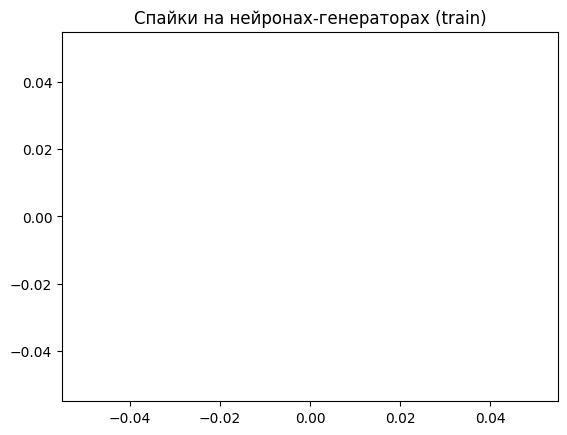

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

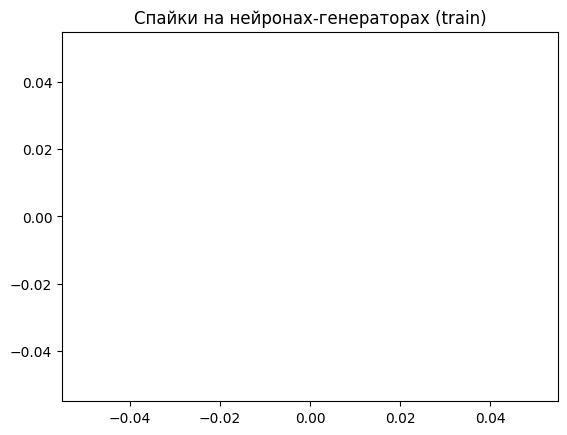

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

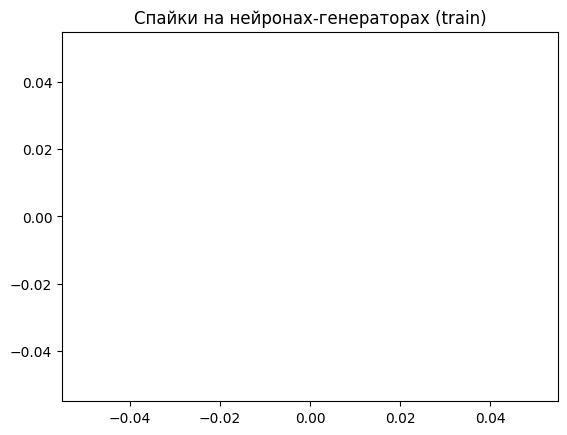

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

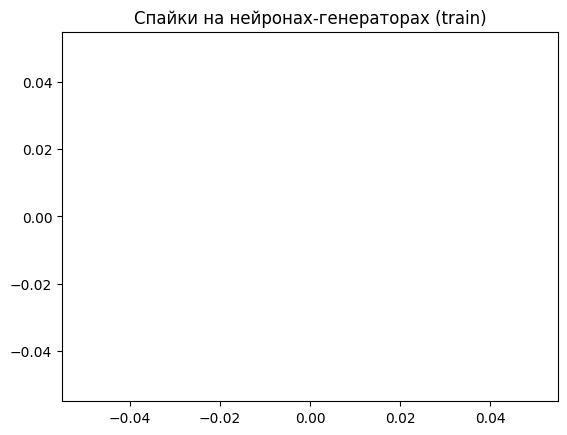

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

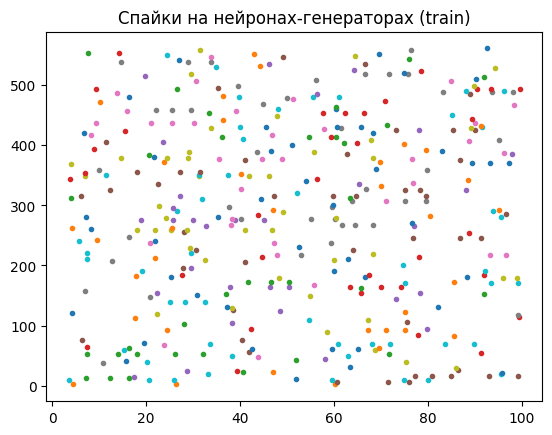

spike counts =  [0, 3, 0, 0, 0, 3, 0, 0, 0, 6, 1, 0, 3, 0, 1, 5, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 0, 6, 1, 0, 1, 0, 0, 1, 1, 3, 1, 1, 1, 0, 0, 1, 0, 0, 6, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 4, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 3, 0, 1, 3, 0, 0, 0, 0, 0, 3, 0, 3, 1, 0, 3, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 0, 0, 3, 1, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 6, 0, 1, 2, 0, 0, 2, 0, 1, 3, 0, 0, 1, 0, 0, 0, 5, 0, 1, 3, 2, 1, 2, 1, 0, 1, 0, 1, 0, 0, 1, 2, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 1, 3, 0, 1, 1, 0, 2, 0, 1, 5, 0, 0, 0, 1, 0, 0, 0, 0, 1, 3, 1, 1,

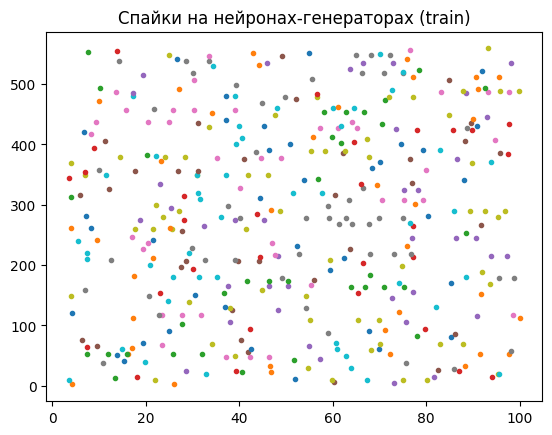

spike counts =  [0, 2, 0, 0, 1, 1, 0, 0, 4, 2, 1, 0, 1, 2, 1, 0, 0, 0, 1, 2, 0, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 3, 0, 1, 1, 1, 4, 5, 0, 0, 1, 0, 1, 1, 2, 2, 1, 0, 1, 1, 1, 1, 0, 4, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 3, 0, 0, 2, 0, 0, 1, 0, 4, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 1, 1, 2, 1, 0, 0, 1, 1, 0, 0, 0, 4, 0, 3, 0, 1, 0, 1, 1, 1, 0, 3, 0, 0, 1, 0, 3, 0, 4, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 3, 0, 3, 1, 1, 1, 1, 0, 2, 3, 0, 1, 4, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 4, 0, 1, 2, 0, 1, 1, 1, 0, 3, 0, 1, 0, 0, 0, 1, 3, 0, 0, 6, 2, 1, 2, 0, 0, 1, 0, 0, 0, 0, 5, 1, 0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 3, 1, 0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 2, 1, 1, 1,

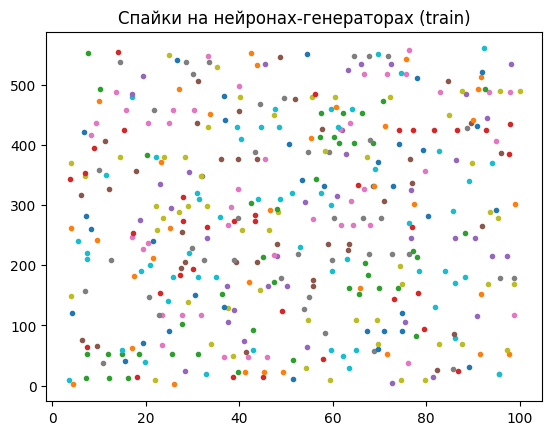

spike counts =  [0, 2, 0, 0, 1, 0, 0, 0, 4, 1, 1, 0, 3, 3, 1, 0, 0, 0, 1, 2, 0, 3, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 3, 0, 1, 1, 0, 3, 6, 0, 0, 1, 0, 1, 1, 4, 1, 1, 0, 1, 1, 1, 1, 0, 4, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 4, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 4, 1, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 3, 0, 3, 1, 0, 0, 3, 1, 0, 1, 1, 0, 0, 1, 0, 3, 0, 4, 0, 1, 1, 1, 0, 0, 0, 0, 0, 4, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 3, 0, 4, 0, 2, 0, 1, 2, 0, 3, 0, 1, 4, 0, 2, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 3, 1, 0, 0, 1, 1, 1, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 3, 0, 1, 2, 0, 2, 0, 1, 4, 0, 0, 1, 0, 0, 0, 3, 1, 0, 1, 4, 2, 1, 2, 0, 0, 1, 0, 0, 0, 0, 3, 1, 1, 1, 1, 0, 1, 0, 1, 0, 3, 1, 0, 2, 1, 0, 1, 1, 1, 0, 0, 3, 0, 0, 0, 1, 1, 1, 0, 0, 0, 3, 0, 0, 0, 0, 1, 1, 2, 0,

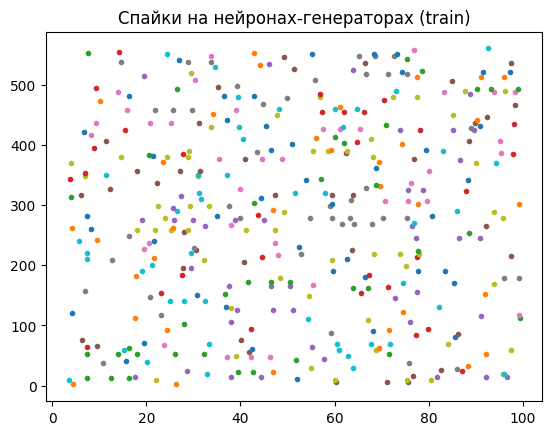

spike counts =  [0, 2, 0, 0, 0, 3, 0, 0, 4, 1, 1, 0, 3, 0, 6, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 3, 0, 1, 1, 0, 1, 6, 0, 0, 1, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 4, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 3, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 2, 1, 3, 0, 1, 0, 1, 1, 1, 0, 3, 0, 0, 0, 0, 2, 1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 0, 1, 1, 1, 3, 2, 0, 0, 1, 0, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 6, 0, 1, 2, 0, 0, 2, 1, 1, 3, 0, 1, 0, 0, 0, 0, 5, 0, 0, 6, 2, 0, 3, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 1, 0, 0, 2, 3, 0, 1, 2, 1, 0, 0, 0, 3, 1, 0, 1, 1, 0, 1, 0, 1, 4, 0, 0, 0, 3, 0, 0, 0, 1, 2, 1, 1, 1,

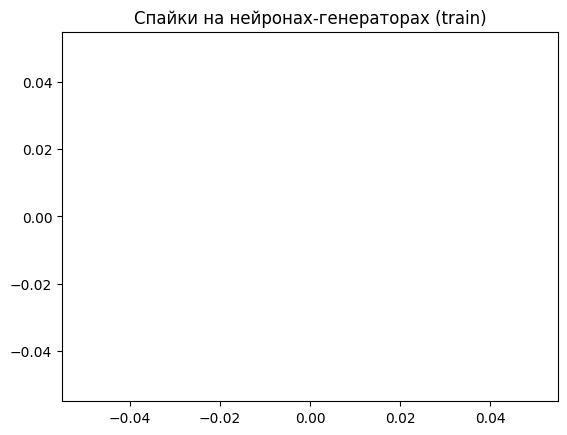

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

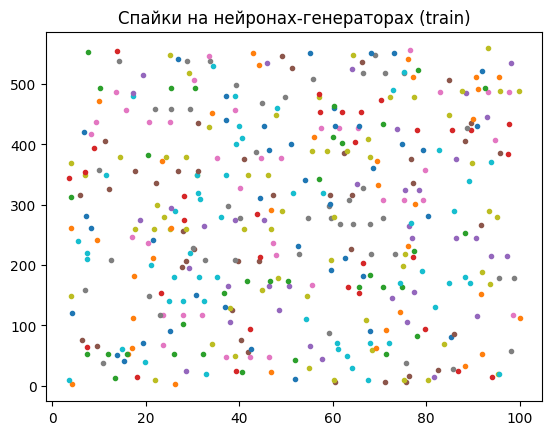

spike counts =  [0, 2, 0, 0, 0, 3, 0, 0, 4, 2, 1, 0, 1, 2, 1, 1, 0, 0, 1, 2, 0, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 3, 0, 1, 1, 1, 2, 6, 0, 0, 1, 0, 1, 1, 2, 1, 2, 0, 1, 1, 1, 1, 0, 2, 3, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 0, 4, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 1, 1, 2, 1, 0, 0, 1, 1, 0, 0, 0, 3, 1, 3, 0, 1, 0, 1, 3, 0, 0, 3, 0, 0, 0, 0, 2, 1, 4, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 3, 0, 3, 1, 1, 1, 1, 0, 2, 2, 0, 1, 3, 1, 2, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 6, 0, 1, 2, 0, 0, 2, 1, 0, 3, 0, 1, 0, 0, 0, 1, 3, 0, 0, 4, 3, 1, 2, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 3, 1, 0, 1, 1, 0, 1, 1, 0, 4, 0, 0, 0, 3, 0, 0, 0, 0, 2, 1, 1, 1,

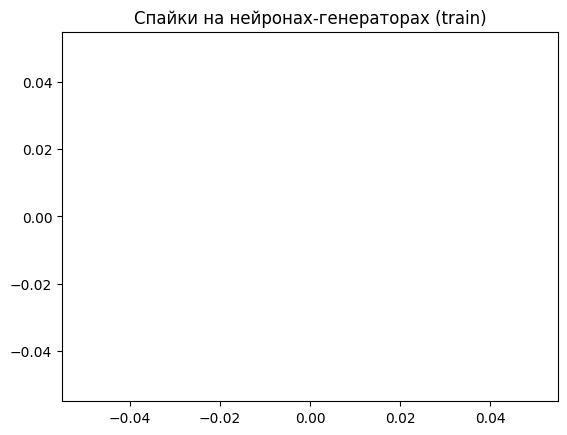

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

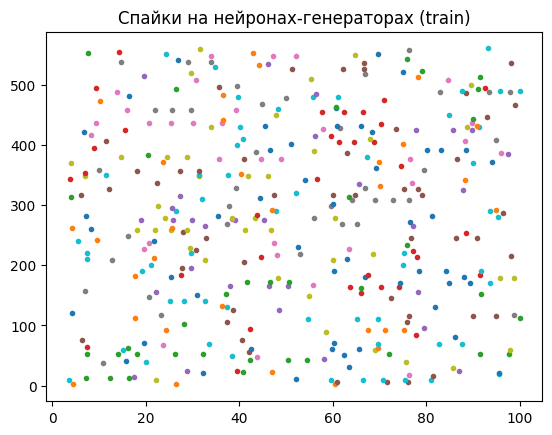

spike counts =  [0, 3, 0, 0, 0, 3, 0, 0, 1, 6, 1, 0, 3, 0, 1, 1, 1, 0, 0, 1, 2, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 3, 0, 1, 0, 1, 0, 0, 1, 1, 0, 8, 0, 0, 1, 0, 0, 2, 1, 3, 1, 1, 1, 0, 0, 1, 0, 0, 4, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 4, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 3, 0, 1, 1, 0, 0, 3, 0, 2, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 2, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 1, 3, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 1, 0, 3, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 0, 1, 1, 1, 1, 3, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 6, 0, 1, 2, 0, 0, 2, 0, 0, 3, 0, 0, 1, 0, 0, 0, 5, 0, 1, 1, 4, 1, 3, 0, 0, 1, 0, 1, 0, 0, 0, 3, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 4, 0, 1, 1, 0, 2, 0, 1, 5, 0, 0, 0, 1, 0, 0, 0, 0, 1, 3, 0, 2,

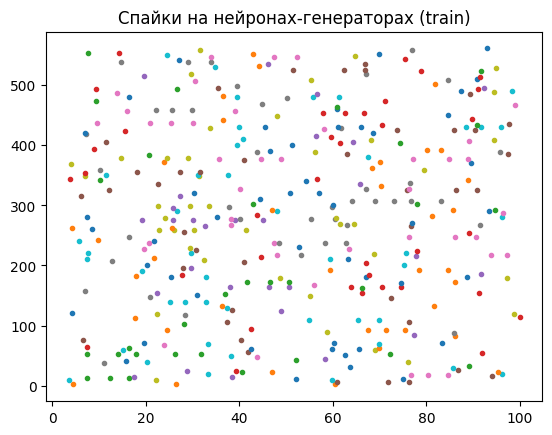

spike counts =  [0, 3, 0, 0, 0, 3, 0, 0, 1, 2, 2, 0, 3, 0, 2, 1, 3, 0, 0, 2, 0, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 6, 1, 0, 1, 0, 0, 1, 1, 3, 1, 1, 1, 0, 0, 1, 0, 0, 2, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 3, 0, 1, 0, 1, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 2, 1, 3, 1, 0, 2, 1, 0, 0, 0, 0, 1, 0, 3, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 0, 3, 1, 1, 3, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 3, 0, 1, 1, 1, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 4, 0, 1, 2, 0, 0, 1, 1, 1, 2, 2, 0, 1, 0, 0, 0, 5, 0, 1, 3, 2, 1, 2, 1, 0, 1, 0, 0, 1, 0, 0, 2, 1, 2, 1, 0, 1, 0, 0, 2, 3, 0, 1, 0, 2, 0, 0, 0, 0, 5, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 2, 1,

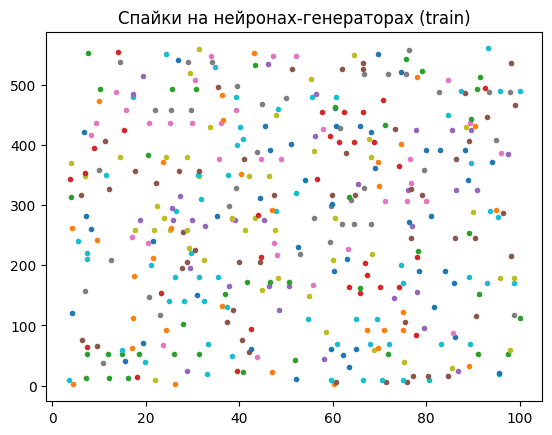

spike counts =  [0, 3, 0, 0, 0, 3, 0, 0, 1, 6, 1, 0, 3, 1, 0, 3, 0, 0, 0, 2, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 9, 0, 0, 1, 0, 0, 2, 1, 3, 2, 0, 1, 0, 1, 1, 0, 0, 6, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 4, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 3, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 3, 1, 0, 3, 0, 0, 0, 0, 0, 3, 4, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 3, 0, 1, 2, 1, 1, 1, 0, 2, 0, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 6, 0, 1, 2, 0, 0, 2, 0, 0, 3, 0, 0, 1, 0, 0, 0, 5, 0, 1, 1, 4, 1, 3, 0, 0, 1, 0, 1, 0, 0, 1, 3, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 3, 1, 0, 1, 1, 0, 2, 0, 1, 5, 0, 0, 0, 1, 0, 0, 0, 0, 3, 2, 0, 2,

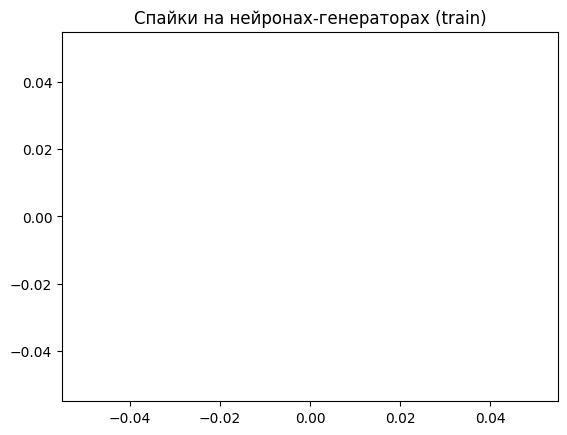

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

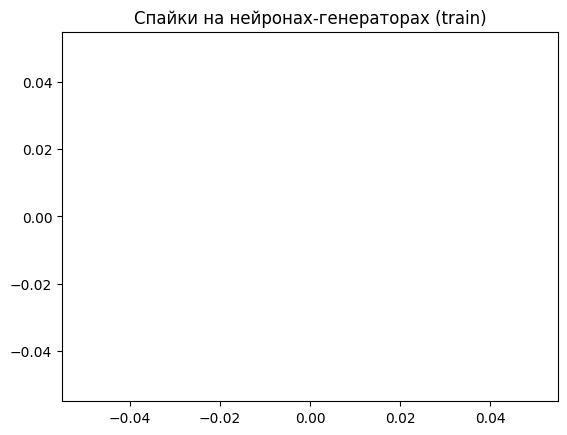

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

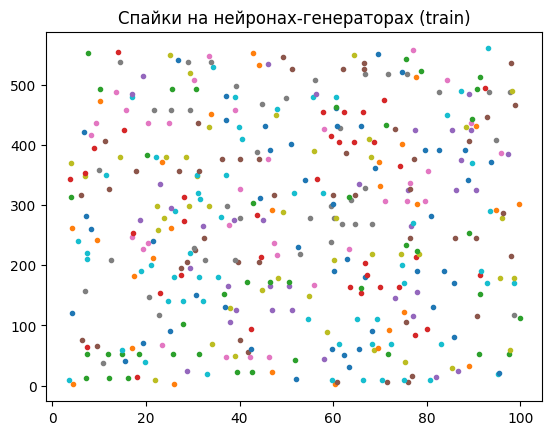

spike counts =  [0, 3, 0, 0, 0, 3, 0, 0, 1, 6, 1, 0, 3, 1, 1, 1, 0, 0, 0, 2, 1, 1, 2, 0, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 9, 0, 0, 1, 0, 0, 2, 1, 3, 2, 0, 1, 0, 1, 1, 0, 1, 4, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 3, 0, 0, 1, 0, 1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 3, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 3, 1, 0, 3, 0, 0, 0, 0, 0, 3, 3, 1, 1, 0, 3, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 3, 0, 3, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 3, 2, 0, 0, 1, 0, 0, 1, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 4, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 2, 0, 1, 3, 0, 1, 0, 0, 0, 1, 3, 0, 0, 3, 3, 1, 2, 0, 0, 1, 0, 1, 0, 0, 1, 2, 0, 2, 0, 0, 1, 0, 0, 2, 3, 0, 1, 2, 1, 0, 0, 0, 3, 1, 0, 1, 1, 0, 2, 1, 0, 4, 0, 0, 0, 3, 0, 0, 0, 0, 3, 2, 1, 1,

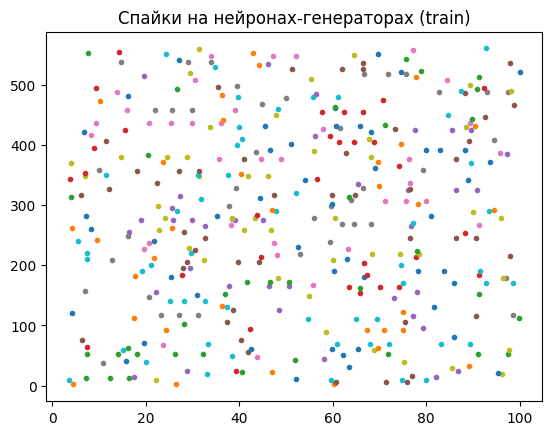

spike counts =  [0, 3, 0, 0, 0, 3, 0, 0, 1, 4, 1, 0, 3, 0, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 8, 0, 0, 1, 0, 0, 2, 1, 3, 1, 1, 1, 0, 0, 1, 0, 0, 6, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 4, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 3, 0, 1, 1, 0, 1, 1, 0, 4, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 3, 1, 0, 3, 0, 0, 0, 0, 1, 2, 0, 2, 1, 0, 3, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 3, 0, 1, 2, 1, 1, 1, 0, 2, 0, 1, 1, 1, 3, 2, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 3, 0, 1, 2, 0, 0, 2, 0, 2, 3, 0, 1, 0, 0, 0, 0, 5, 0, 1, 1, 5, 0, 3, 0, 0, 1, 0, 0, 0, 0, 1, 3, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 3, 1, 0, 1, 1, 0, 2, 0, 1, 4, 0, 0, 0, 1, 0, 0, 0, 0, 3, 2, 0, 2,

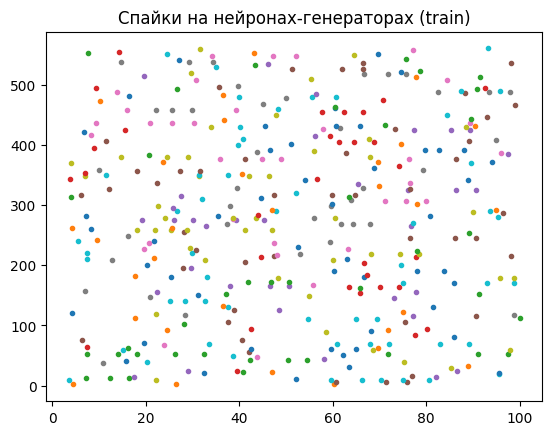

spike counts =  [0, 3, 0, 0, 0, 3, 0, 0, 1, 6, 1, 0, 3, 0, 2, 1, 0, 0, 0, 1, 2, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 3, 0, 1, 0, 1, 0, 0, 1, 1, 0, 8, 0, 0, 1, 0, 0, 2, 1, 3, 1, 1, 1, 0, 0, 1, 0, 0, 6, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 3, 0, 1, 1, 0, 1, 1, 0, 2, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 3, 1, 0, 3, 0, 0, 0, 0, 0, 3, 1, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 0, 2, 1, 1, 3, 2, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 6, 0, 1, 2, 0, 0, 2, 0, 0, 4, 0, 1, 0, 0, 0, 0, 5, 0, 1, 1, 4, 1, 3, 0, 0, 1, 0, 1, 0, 0, 1, 3, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 3, 1, 0, 1, 1, 0, 2, 0, 1, 4, 0, 0, 0, 1, 0, 0, 0, 0, 3, 2, 0, 2,

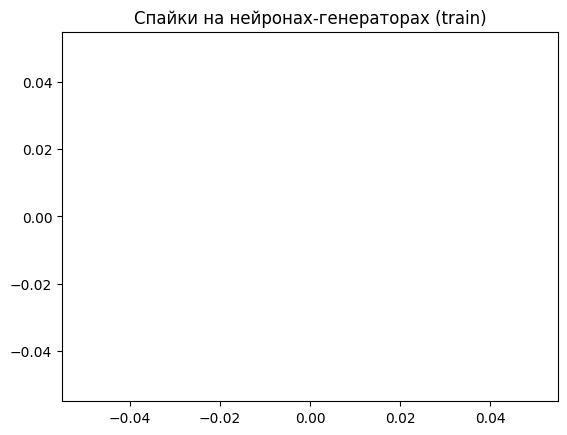

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

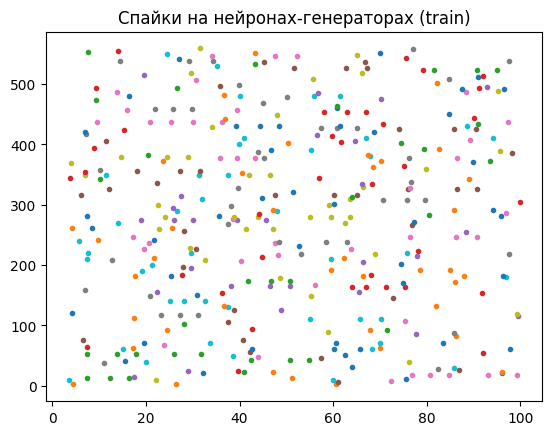

spike counts =  [0, 3, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 3, 0, 1, 0, 5, 0, 0, 0, 2, 2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 3, 0, 0, 1, 1, 0, 0, 1, 1, 0, 5, 1, 0, 1, 0, 0, 0, 2, 4, 2, 0, 1, 0, 0, 1, 0, 0, 2, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 3, 0, 1, 0, 0, 1, 0, 0, 3, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 4, 3, 0, 1, 0, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 1, 1, 2, 3, 0, 2, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 2, 0, 2, 0, 1, 1, 0, 1, 2, 1, 3, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 3, 0, 1, 1, 1, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 3, 0, 1, 2, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 5, 0, 1, 0, 6, 0, 3, 0, 1, 1, 0, 0, 1, 0, 0, 2, 1, 2, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 0, 0, 3, 1, 1, 1, 0, 1, 0, 1, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 4, 1, 1,

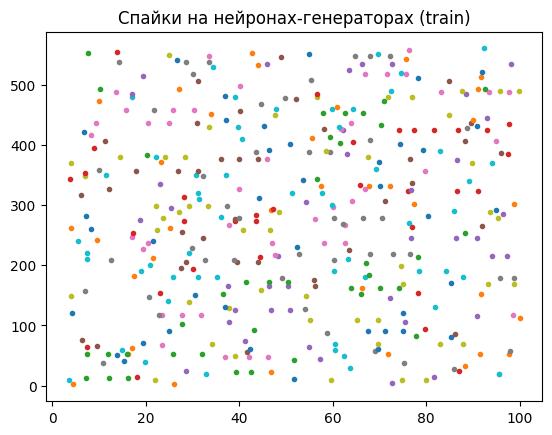

spike counts =  [0, 2, 0, 0, 1, 0, 0, 0, 4, 1, 1, 0, 3, 1, 1, 0, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 3, 0, 1, 1, 1, 4, 5, 0, 0, 1, 0, 2, 0, 2, 2, 1, 0, 1, 1, 1, 1, 0, 4, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 4, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 3, 0, 0, 1, 0, 0, 1, 0, 4, 1, 0, 0, 2, 0, 0, 0, 3, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 3, 0, 3, 1, 0, 0, 3, 0, 1, 0, 3, 0, 0, 1, 0, 3, 0, 5, 0, 1, 1, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 3, 0, 4, 0, 2, 0, 1, 1, 1, 3, 0, 1, 4, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 4, 0, 0, 1, 1, 1, 0, 0, 3, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 3, 0, 1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 0, 0, 0, 3, 1, 1, 1, 4, 2, 1, 2, 0, 0, 1, 1, 0, 0, 0, 3, 1, 1, 1, 0, 1, 1, 0, 1, 1, 3, 1, 0, 2, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 3, 0, 0, 0, 3, 1, 1, 2, 0,

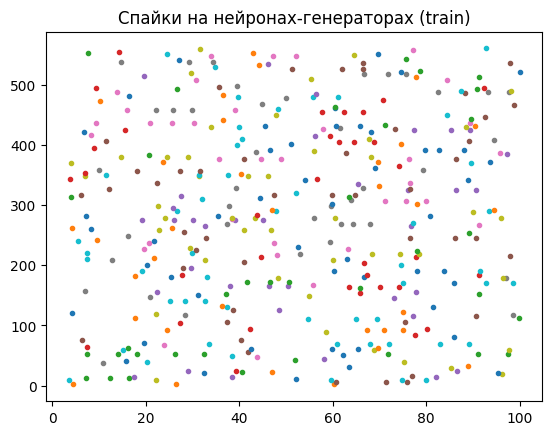

spike counts =  [0, 3, 0, 0, 0, 3, 0, 0, 1, 4, 1, 0, 3, 0, 3, 1, 0, 0, 1, 0, 2, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 8, 0, 0, 1, 0, 0, 2, 1, 3, 1, 1, 1, 0, 0, 1, 0, 0, 6, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 4, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 3, 0, 1, 1, 0, 1, 1, 0, 2, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 3, 1, 0, 3, 0, 0, 0, 0, 1, 2, 1, 2, 1, 0, 3, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 0, 1, 1, 1, 3, 2, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 4, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 3, 0, 1, 2, 0, 0, 2, 0, 1, 4, 0, 1, 0, 0, 0, 0, 5, 0, 1, 1, 5, 0, 3, 0, 0, 1, 0, 0, 0, 0, 1, 3, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 3, 1, 0, 1, 1, 0, 2, 0, 1, 4, 0, 0, 0, 1, 0, 0, 0, 0, 3, 2, 0, 2,

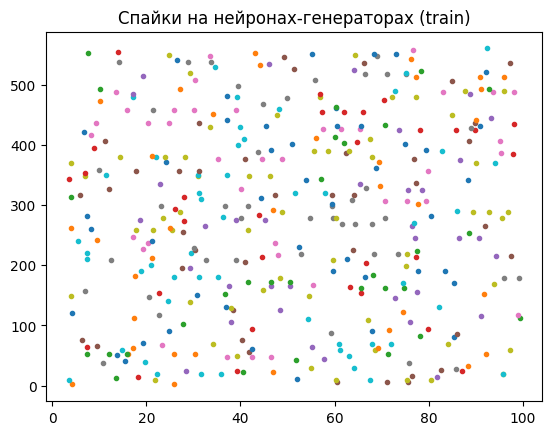

spike counts =  [0, 2, 0, 0, 0, 3, 0, 0, 4, 2, 1, 0, 1, 1, 1, 1, 0, 0, 1, 4, 0, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 3, 0, 1, 1, 1, 4, 4, 0, 0, 1, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1, 1, 0, 2, 3, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 1, 1, 2, 1, 0, 0, 1, 1, 0, 0, 0, 3, 1, 3, 0, 1, 0, 1, 1, 1, 0, 3, 0, 0, 0, 0, 2, 1, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 3, 1, 1, 1, 1, 0, 2, 1, 1, 1, 3, 1, 2, 0, 0, 1, 0, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 4, 0, 1, 2, 0, 0, 2, 1, 0, 3, 0, 1, 0, 0, 0, 1, 3, 0, 0, 4, 3, 1, 2, 0, 0, 1, 0, 0, 0, 0, 5, 1, 0, 1, 0, 1, 0, 0, 0, 4, 0, 0, 1, 1, 0, 0, 0, 0, 3, 1, 0, 1, 1, 0, 1, 1, 0, 4, 0, 0, 0, 3, 0, 0, 0, 0, 2, 1, 1, 1,

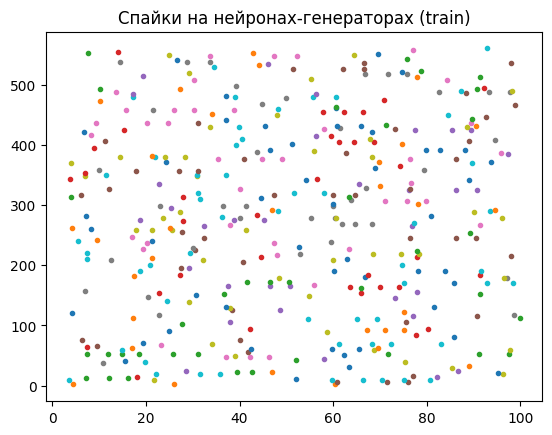

spike counts =  [0, 3, 0, 0, 0, 3, 0, 0, 1, 6, 1, 0, 3, 1, 1, 1, 0, 0, 1, 3, 1, 1, 2, 0, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 9, 0, 0, 1, 0, 0, 2, 1, 3, 2, 0, 1, 0, 1, 1, 0, 1, 4, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 3, 0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 3, 1, 0, 3, 0, 0, 0, 0, 1, 2, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 0, 1, 1, 1, 3, 2, 0, 0, 1, 0, 0, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 4, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 4, 0, 1, 2, 0, 0, 2, 0, 2, 3, 0, 1, 0, 0, 0, 1, 3, 0, 0, 3, 3, 1, 2, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 1, 0, 0, 4, 0, 0, 1, 1, 0, 0, 0, 0, 3, 1, 0, 1, 1, 0, 2, 1, 0, 4, 0, 0, 0, 3, 0, 0, 0, 0, 3, 2, 1, 1,

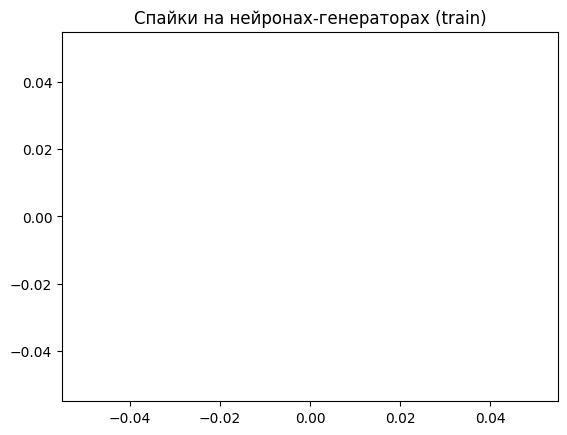

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

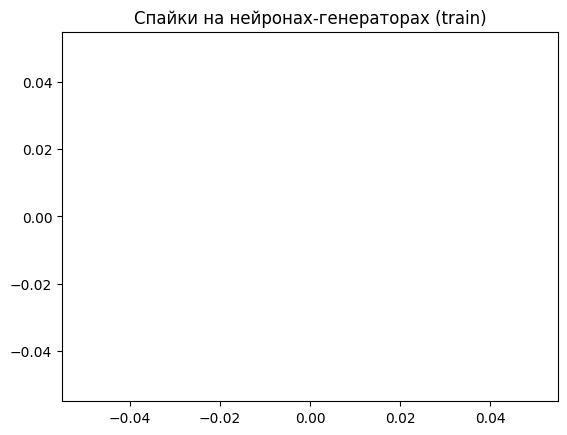

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

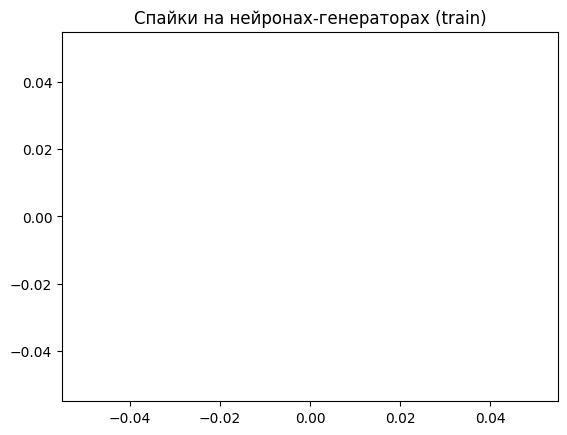

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

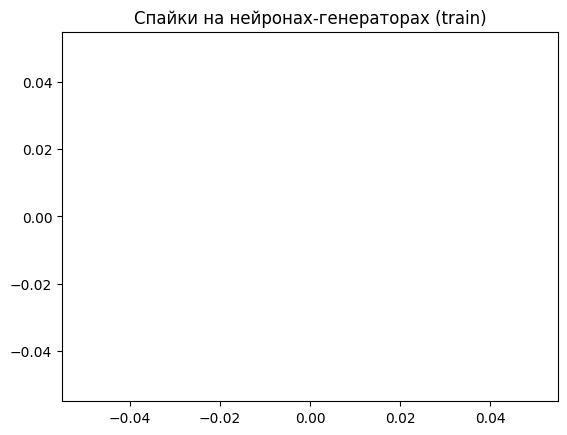

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

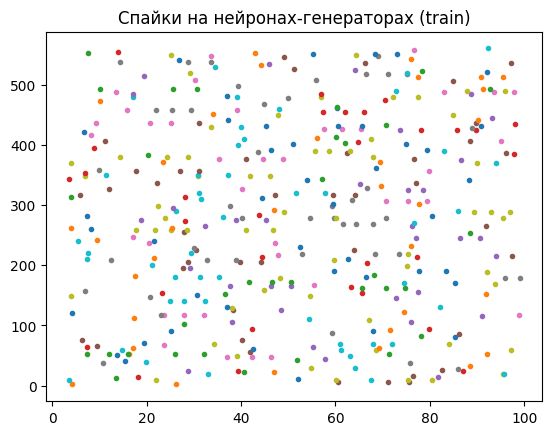

spike counts =  [0, 2, 0, 0, 0, 3, 0, 0, 4, 2, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 0, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 3, 0, 1, 1, 1, 2, 6, 0, 0, 1, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1, 1, 0, 2, 3, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 4, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 1, 1, 2, 1, 0, 0, 1, 1, 0, 0, 0, 3, 1, 3, 0, 1, 0, 1, 1, 1, 0, 3, 0, 0, 0, 0, 2, 1, 3, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 3, 0, 3, 1, 1, 1, 1, 0, 2, 1, 1, 1, 3, 1, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 6, 0, 1, 2, 0, 0, 2, 1, 0, 3, 0, 1, 0, 0, 0, 1, 3, 0, 0, 4, 3, 1, 2, 0, 0, 1, 0, 0, 0, 0, 4, 2, 0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 3, 1, 0, 1, 1, 0, 1, 1, 0, 4, 0, 0, 0, 3, 0, 0, 0, 0, 2, 1, 1, 1,

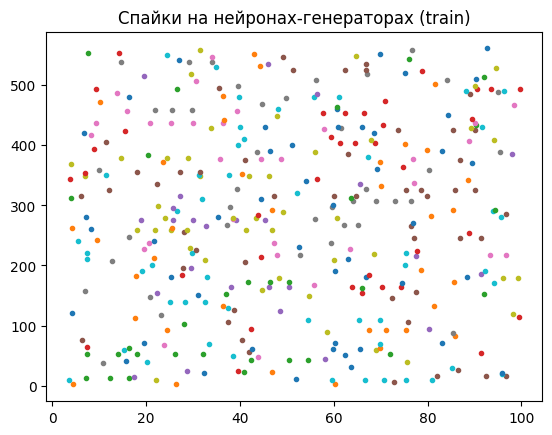

spike counts =  [0, 3, 0, 0, 0, 1, 0, 0, 1, 6, 1, 0, 3, 0, 1, 3, 0, 0, 0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 3, 0, 1, 0, 1, 0, 0, 1, 1, 0, 6, 1, 0, 1, 0, 0, 1, 1, 3, 1, 1, 1, 0, 0, 1, 0, 0, 2, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 4, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 3, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 2, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 1, 1, 1, 3, 0, 0, 0, 0, 0, 3, 1, 3, 1, 0, 2, 1, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 0, 3, 1, 1, 3, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 6, 0, 1, 2, 0, 0, 1, 1, 0, 3, 0, 0, 1, 0, 0, 0, 5, 0, 1, 1, 4, 1, 2, 1, 0, 1, 0, 1, 0, 0, 1, 2, 0, 2, 1, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 4, 0, 1, 1, 0, 2, 0, 1, 5, 0, 0, 0, 1, 0, 0, 0, 0, 0, 5, 0, 2,

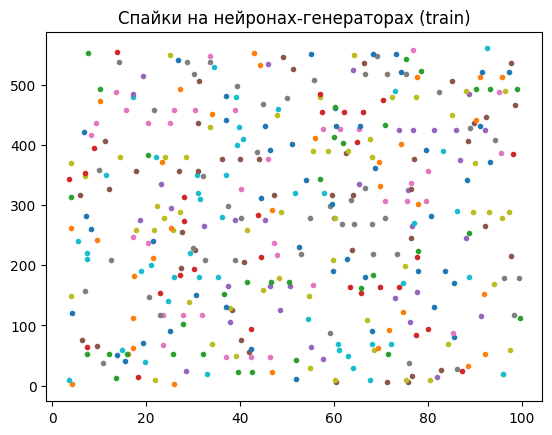

spike counts =  [0, 2, 0, 0, 0, 3, 0, 0, 4, 2, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 3, 0, 1, 1, 1, 2, 6, 0, 0, 1, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1, 1, 0, 2, 3, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 3, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 1, 1, 2, 1, 0, 0, 1, 1, 0, 0, 0, 1, 3, 3, 0, 1, 0, 1, 1, 1, 0, 3, 0, 0, 0, 0, 2, 1, 4, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 3, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 3, 1, 1, 1, 1, 0, 2, 0, 1, 1, 3, 0, 2, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 4, 0, 1, 2, 0, 0, 2, 1, 0, 3, 0, 1, 0, 0, 0, 1, 3, 0, 0, 4, 3, 1, 2, 0, 0, 1, 0, 0, 0, 0, 5, 1, 0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 3, 1, 0, 1, 1, 0, 1, 1, 0, 4, 0, 0, 0, 3, 0, 0, 0, 0, 1, 2, 1, 1,

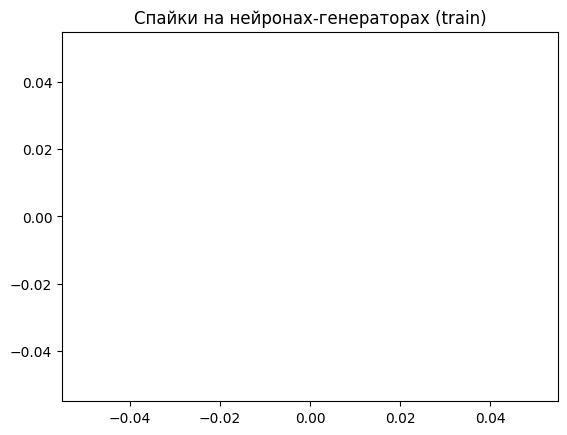

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

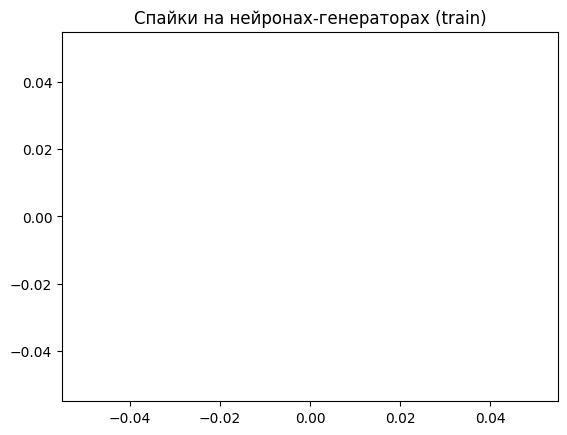

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

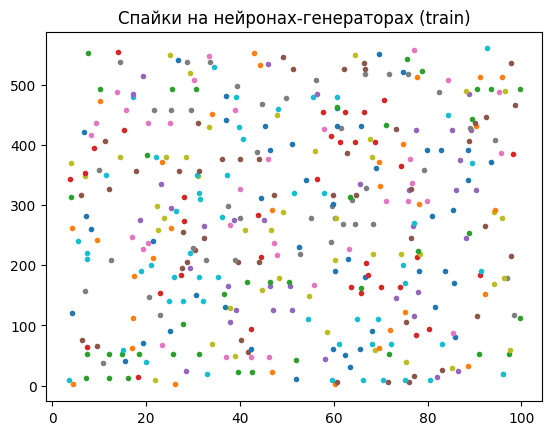

spike counts =  [0, 3, 0, 0, 0, 3, 0, 0, 1, 6, 1, 0, 3, 1, 1, 1, 0, 0, 1, 2, 0, 1, 2, 0, 2, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 9, 0, 0, 1, 0, 0, 2, 1, 3, 2, 0, 1, 0, 1, 1, 0, 1, 4, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 3, 0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 3, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 2, 1, 0, 0, 1, 1, 0, 0, 0, 1, 3, 3, 0, 1, 0, 1, 1, 1, 0, 3, 0, 0, 0, 0, 1, 2, 3, 1, 1, 0, 3, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 3, 0, 3, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 3, 2, 0, 0, 1, 0, 0, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 3, 0, 1, 2, 0, 0, 2, 1, 1, 3, 0, 1, 0, 0, 0, 1, 3, 0, 0, 3, 3, 1, 2, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 3, 1, 0, 1, 1, 0, 2, 1, 0, 4, 0, 0, 0, 3, 0, 0, 0, 0, 3, 2, 1, 1,

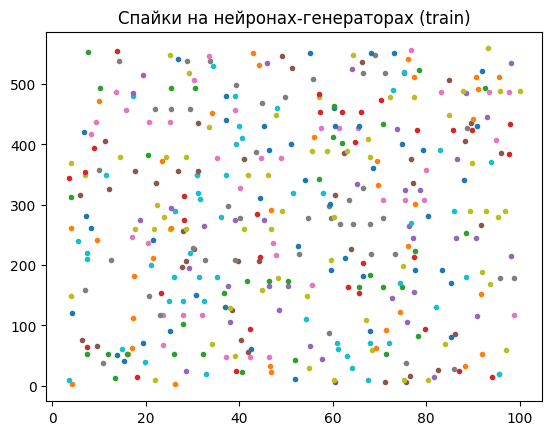

spike counts =  [0, 2, 0, 0, 0, 3, 0, 0, 4, 2, 1, 0, 1, 2, 1, 1, 0, 0, 1, 2, 0, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 3, 0, 1, 1, 1, 2, 6, 0, 0, 1, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1, 1, 0, 2, 3, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 4, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 1, 1, 2, 1, 0, 0, 1, 1, 0, 0, 0, 3, 1, 3, 0, 1, 0, 1, 1, 1, 0, 3, 0, 0, 0, 0, 2, 1, 4, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 3, 0, 3, 1, 1, 1, 1, 0, 2, 1, 0, 1, 3, 0, 2, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 6, 0, 1, 2, 0, 0, 2, 1, 0, 3, 0, 1, 0, 0, 0, 1, 3, 0, 0, 4, 3, 1, 2, 0, 0, 1, 0, 0, 0, 0, 4, 2, 0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 3, 1, 0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 2, 1, 1, 1,

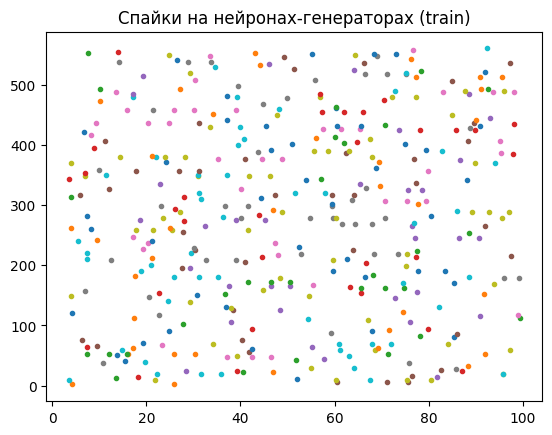

spike counts =  [0, 2, 0, 0, 0, 3, 0, 0, 4, 2, 1, 0, 1, 1, 1, 1, 0, 0, 1, 4, 0, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 3, 0, 1, 1, 1, 4, 4, 0, 0, 1, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1, 1, 0, 2, 3, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 1, 1, 2, 1, 0, 0, 1, 1, 0, 0, 0, 3, 1, 3, 0, 1, 0, 1, 1, 1, 0, 3, 0, 0, 0, 0, 2, 1, 4, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 3, 1, 1, 1, 1, 0, 2, 0, 1, 1, 3, 1, 2, 0, 0, 1, 0, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 4, 0, 1, 2, 0, 0, 2, 1, 0, 3, 0, 1, 0, 0, 0, 1, 3, 0, 0, 4, 3, 1, 2, 0, 0, 1, 0, 0, 0, 0, 5, 1, 0, 1, 0, 1, 0, 0, 0, 4, 0, 0, 1, 1, 0, 0, 0, 0, 3, 1, 0, 1, 1, 0, 1, 1, 0, 4, 0, 0, 0, 3, 0, 0, 0, 0, 2, 1, 1, 1,

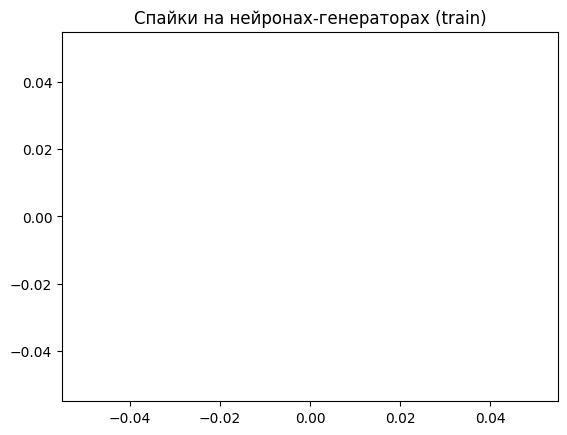

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

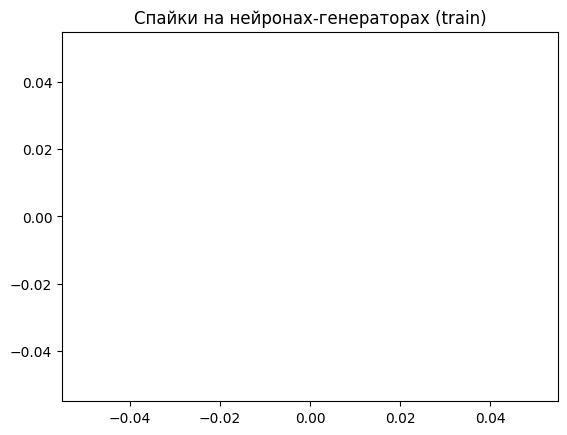

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

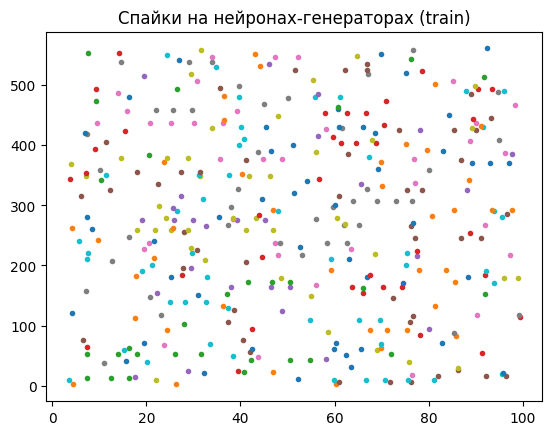

spike counts =  [0, 3, 0, 0, 0, 3, 0, 0, 1, 6, 1, 0, 3, 0, 1, 3, 1, 0, 0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 3, 0, 1, 0, 1, 0, 0, 1, 1, 0, 6, 1, 0, 1, 0, 0, 1, 1, 3, 1, 1, 1, 0, 0, 1, 0, 0, 2, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 4, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 3, 0, 1, 0, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 1, 1, 1, 3, 0, 0, 0, 0, 0, 3, 1, 3, 1, 0, 3, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 0, 2, 1, 1, 3, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 3, 0, 1, 1, 1, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 6, 0, 1, 2, 0, 0, 1, 1, 1, 3, 1, 0, 1, 0, 0, 0, 5, 0, 1, 1, 4, 1, 2, 1, 0, 1, 0, 1, 0, 0, 0, 3, 0, 4, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 4, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 3, 0, 2,

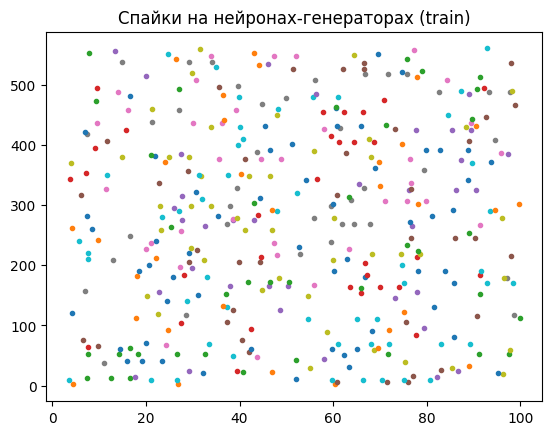

spike counts =  [0, 3, 0, 0, 0, 3, 0, 0, 0, 8, 1, 0, 3, 0, 2, 1, 0, 0, 1, 0, 2, 1, 1, 1, 2, 1, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 8, 0, 0, 1, 0, 0, 2, 0, 4, 1, 1, 1, 0, 1, 1, 0, 0, 6, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 3, 0, 1, 1, 0, 0, 1, 0, 2, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 3, 1, 0, 3, 0, 0, 0, 0, 1, 2, 1, 2, 1, 0, 3, 0, 0, 0, 0, 0, 1, 4, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 3, 0, 1, 2, 1, 1, 1, 0, 2, 0, 1, 1, 1, 3, 1, 1, 0, 1, 0, 0, 1, 2, 0, 1, 0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 3, 0, 1, 1, 1, 0, 2, 0, 1, 4, 0, 0, 1, 0, 0, 0, 3, 0, 1, 1, 3, 1, 3, 0, 0, 1, 0, 0, 0, 0, 0, 3, 1, 2, 0, 0, 1, 0, 0, 2, 3, 0, 1, 2, 1, 0, 0, 0, 3, 1, 0, 1, 1, 0, 1, 0, 1, 2, 0, 0, 0, 1, 1, 0, 0, 0, 3, 1, 1, 2,

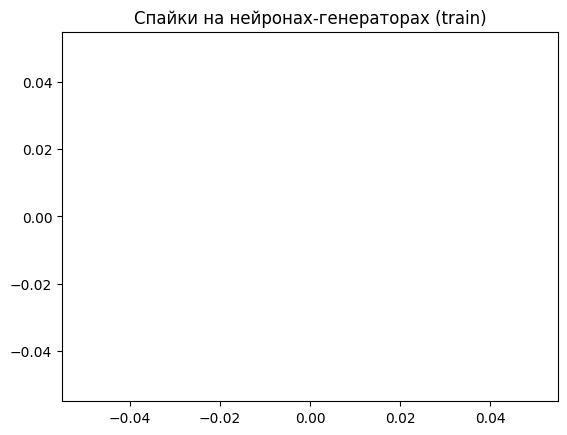

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

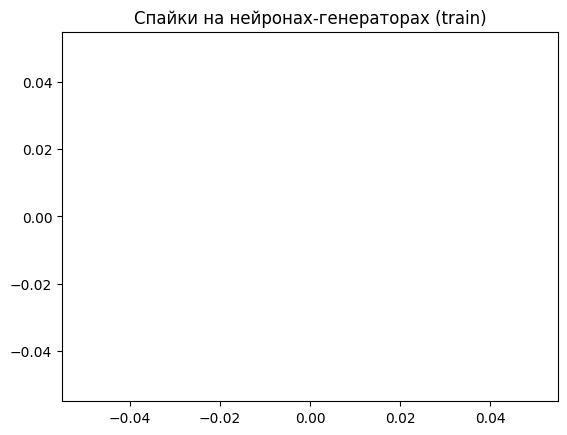

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

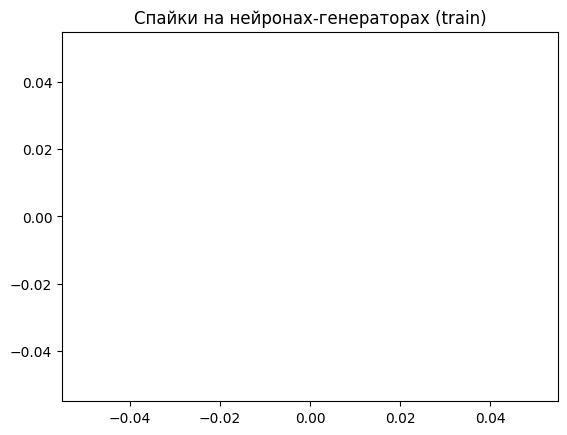

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

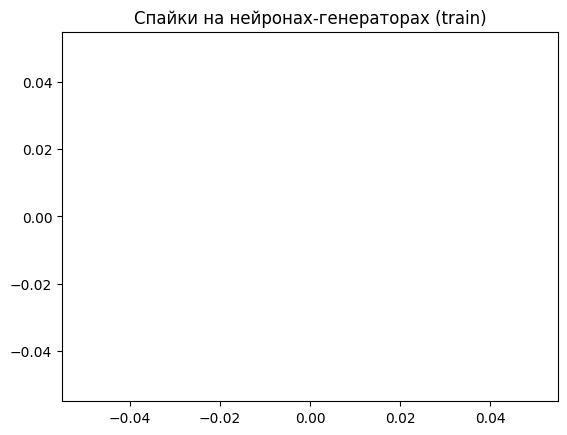

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

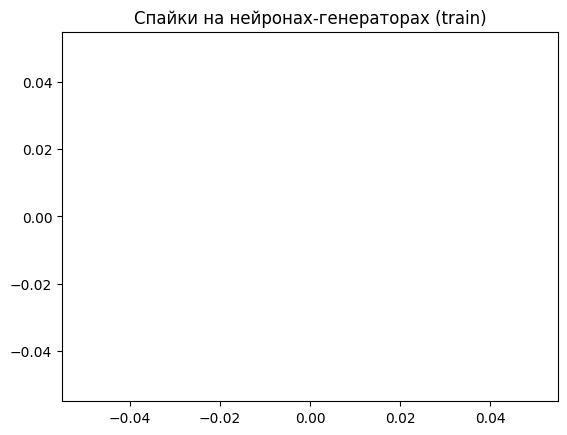

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

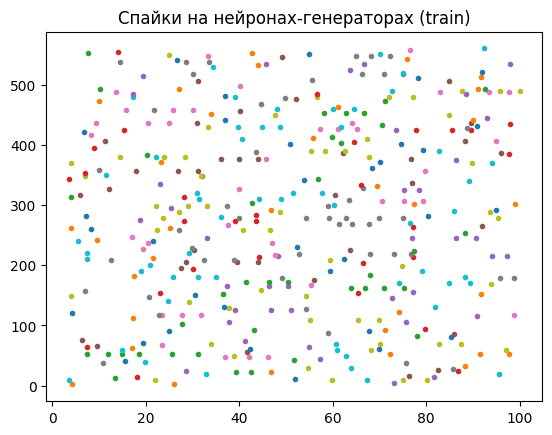

spike counts =  [0, 2, 0, 0, 1, 0, 0, 0, 4, 2, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 3, 0, 1, 1, 0, 3, 6, 0, 0, 1, 0, 0, 2, 2, 2, 1, 0, 1, 1, 1, 1, 0, 4, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 3, 0, 0, 1, 0, 0, 1, 0, 4, 1, 0, 0, 1, 1, 0, 0, 3, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 1, 1, 2, 1, 0, 0, 1, 1, 0, 0, 0, 4, 0, 3, 0, 1, 0, 1, 3, 0, 0, 3, 0, 0, 1, 0, 3, 0, 4, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 3, 0, 3, 1, 1, 1, 1, 0, 2, 3, 0, 1, 4, 0, 2, 0, 0, 1, 0, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 3, 0, 1, 2, 0, 1, 0, 1, 1, 3, 0, 1, 0, 0, 0, 3, 1, 0, 0, 6, 2, 1, 2, 0, 0, 1, 0, 0, 0, 0, 3, 1, 1, 1, 0, 0, 1, 0, 0, 2, 3, 1, 0, 2, 1, 0, 0, 0, 3, 1, 0, 3, 0, 0, 1, 1, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 2, 1, 1, 1,

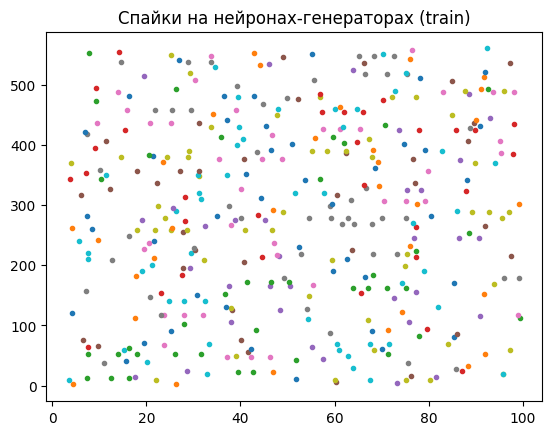

spike counts =  [0, 2, 0, 0, 1, 1, 0, 0, 4, 2, 1, 0, 3, 0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 3, 0, 1, 1, 0, 1, 6, 0, 0, 1, 0, 0, 2, 2, 2, 0, 1, 1, 1, 1, 1, 0, 1, 4, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 4, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 4, 0, 3, 0, 1, 0, 1, 1, 1, 0, 3, 0, 0, 0, 0, 3, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 3, 1, 2, 0, 0, 1, 0, 0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 6, 0, 1, 2, 0, 1, 1, 1, 1, 3, 0, 1, 0, 0, 0, 1, 3, 0, 0, 6, 2, 0, 3, 0, 0, 1, 0, 0, 0, 0, 4, 2, 0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 0, 0, 0, 3, 1, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 3, 0, 0, 0, 1, 2, 1, 1, 1,

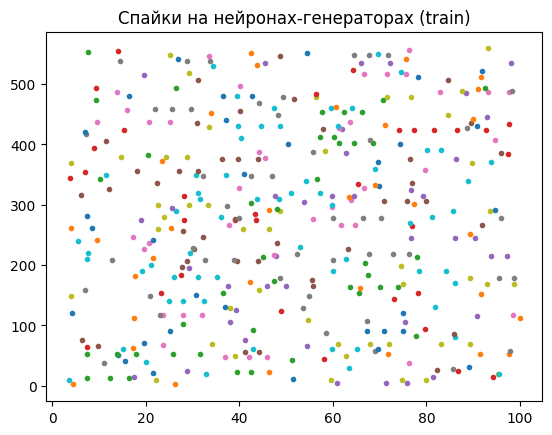

spike counts =  [0, 2, 0, 0, 3, 0, 0, 0, 4, 1, 1, 0, 3, 1, 2, 0, 0, 0, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 3, 0, 2, 0, 1, 3, 5, 0, 0, 2, 0, 2, 0, 4, 1, 1, 0, 1, 1, 1, 1, 0, 6, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 4, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 0, 0, 2, 0, 0, 1, 0, 4, 1, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 3, 0, 3, 1, 0, 0, 3, 1, 0, 1, 1, 0, 0, 1, 0, 3, 1, 3, 0, 1, 1, 1, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 3, 0, 4, 0, 2, 0, 1, 2, 0, 3, 0, 1, 4, 0, 2, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 3, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 3, 0, 1, 2, 0, 1, 0, 1, 3, 0, 0, 1, 0, 0, 0, 3, 1, 1, 1, 5, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 2, 2, 1, 1, 1, 0, 1, 0, 1, 1, 3, 1, 0, 1, 1, 0, 1, 3, 1, 0, 0, 3, 0, 1, 0, 1, 4, 1, 0, 0, 0, 3, 0, 0, 0, 0, 1, 1, 2, 0,

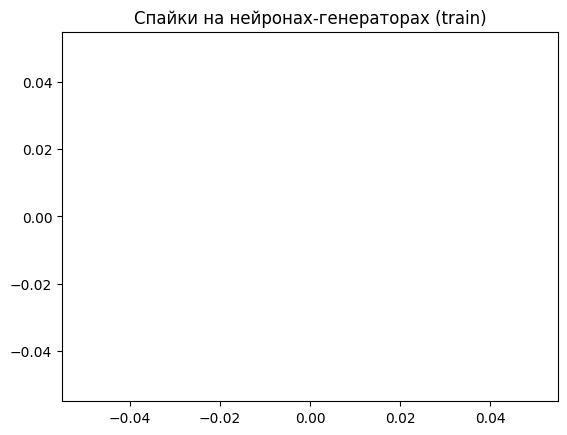

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

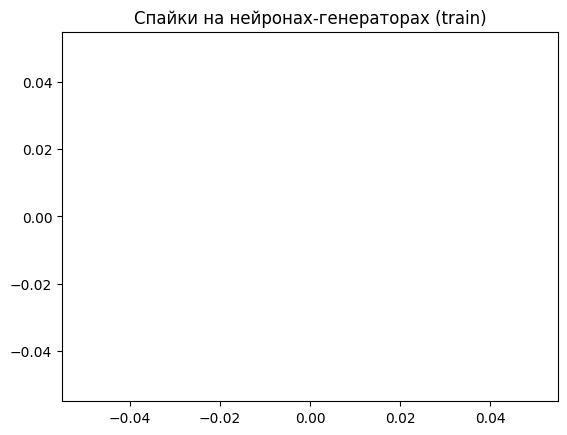

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

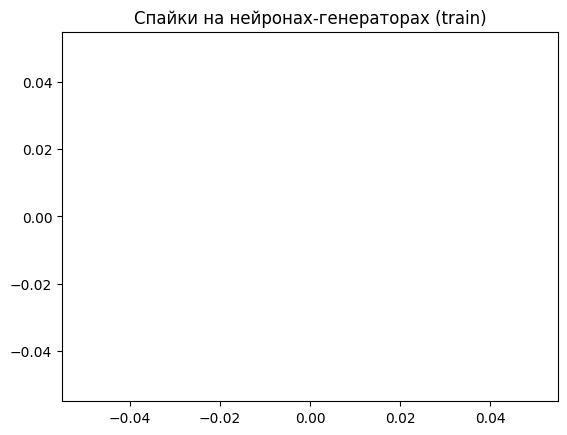

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

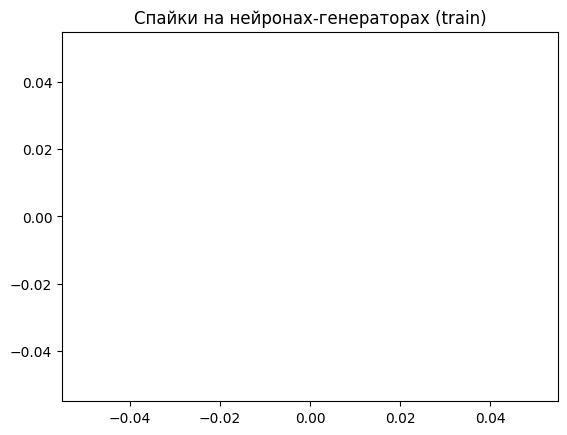

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

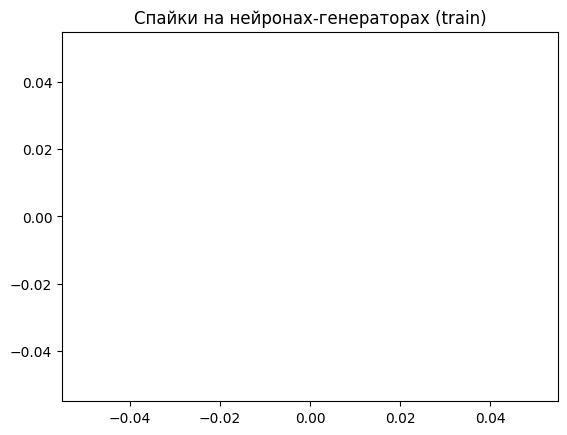

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

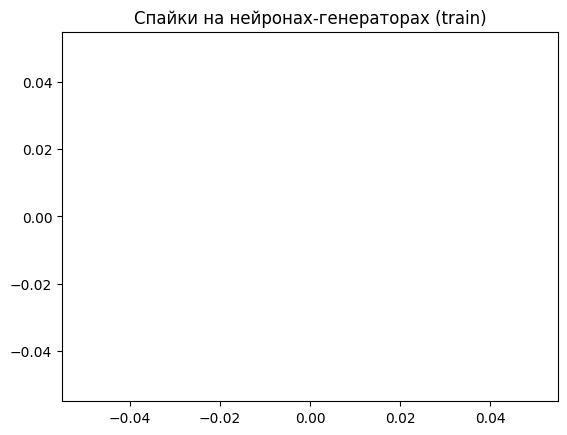

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

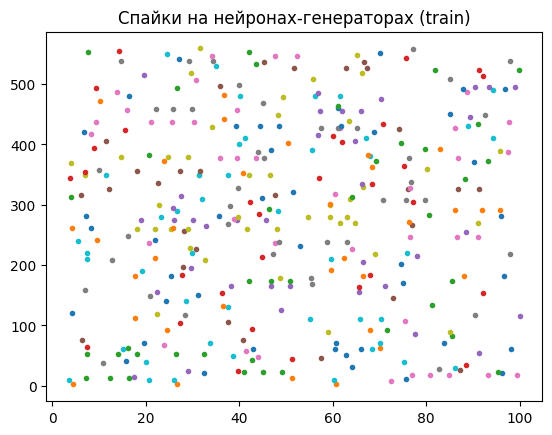

spike counts =  [0, 3, 0, 0, 0, 0, 1, 0, 0, 4, 1, 1, 3, 0, 1, 0, 5, 0, 0, 0, 2, 0, 4, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 2, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 5, 0, 1, 0, 1, 0, 0, 2, 4, 1, 1, 1, 0, 0, 1, 0, 0, 2, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 3, 0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 4, 0, 0, 1, 0, 0, 1, 0, 4, 0, 0, 0, 0, 1, 1, 0, 2, 3, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 2, 0, 1, 1, 0, 0, 2, 1, 3, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 3, 0, 1, 1, 1, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 6, 0, 1, 2, 0, 0, 1, 1, 0, 1, 3, 0, 0, 1, 0, 0, 5, 0, 1, 0, 4, 1, 3, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 3, 1, 0, 1, 0, 0, 1, 2, 0, 0, 1, 0, 2, 0, 0, 0, 3, 1, 1, 1, 0, 2, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 4, 1, 1,

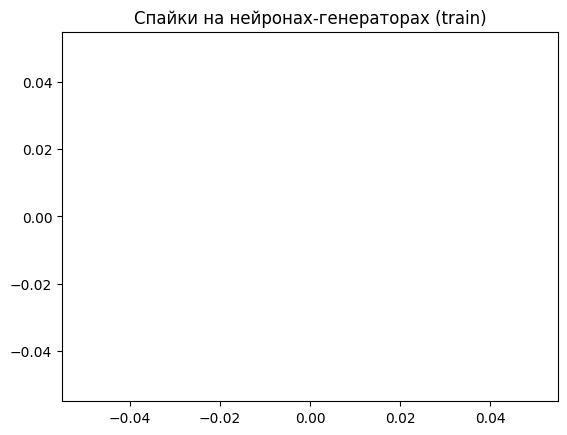

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

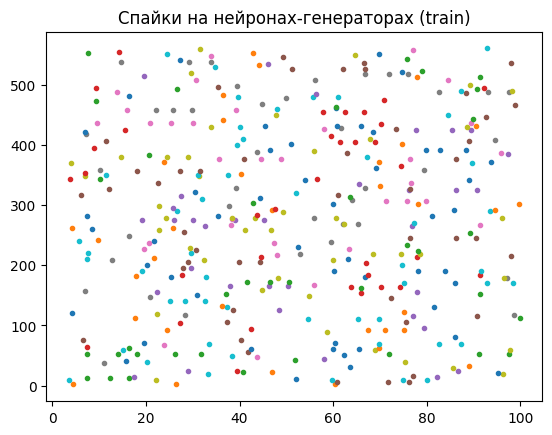

spike counts =  [0, 3, 0, 0, 0, 3, 0, 0, 1, 4, 1, 0, 3, 0, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 8, 0, 0, 1, 0, 0, 2, 1, 3, 1, 1, 1, 0, 0, 1, 0, 0, 4, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 4, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 3, 0, 1, 1, 0, 1, 1, 0, 2, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 3, 1, 0, 3, 0, 0, 0, 0, 1, 2, 1, 2, 1, 0, 3, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 3, 0, 1, 2, 1, 1, 1, 0, 2, 0, 1, 1, 1, 3, 2, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 3, 0, 1, 2, 0, 0, 2, 0, 2, 2, 1, 1, 0, 0, 0, 0, 5, 0, 1, 1, 5, 0, 3, 0, 0, 1, 0, 0, 0, 0, 1, 2, 1, 2, 0, 1, 1, 0, 0, 1, 1, 0, 1, 2, 1, 0, 0, 0, 3, 1, 0, 1, 1, 0, 1, 0, 1, 2, 0, 0, 0, 1, 1, 0, 0, 0, 3, 2, 0, 2,

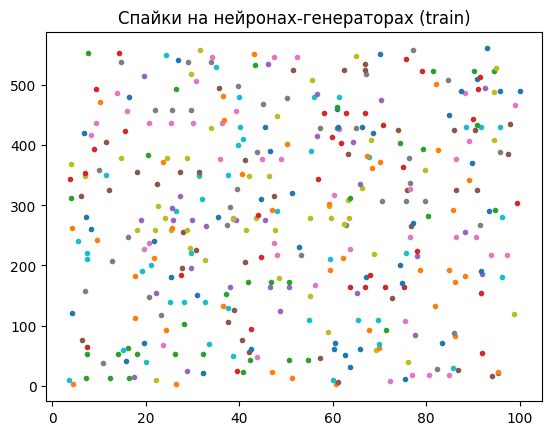

spike counts =  [0, 3, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 3, 0, 1, 1, 3, 0, 0, 0, 2, 2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 3, 0, 0, 1, 1, 0, 0, 1, 1, 0, 5, 1, 0, 1, 0, 0, 1, 1, 3, 1, 1, 1, 0, 0, 1, 0, 0, 2, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 4, 3, 0, 1, 0, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 2, 1, 0, 0, 0, 0, 1, 1, 3, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 2, 0, 1, 1, 0, 3, 1, 1, 3, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 6, 0, 1, 2, 0, 0, 1, 1, 0, 3, 1, 0, 1, 0, 0, 0, 5, 0, 1, 0, 6, 1, 2, 0, 1, 1, 0, 0, 0, 0, 0, 2, 1, 2, 1, 0, 1, 0, 0, 1, 2, 0, 0, 1, 0, 1, 0, 0, 0, 3, 1, 1, 1, 0, 2, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 4, 1, 1,

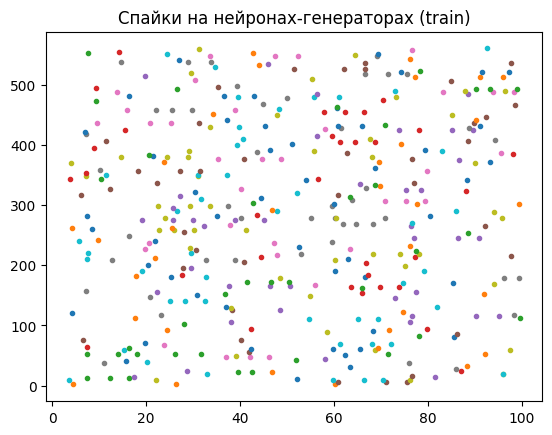

spike counts =  [0, 3, 0, 0, 0, 3, 0, 0, 2, 4, 1, 0, 3, 0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 1, 6, 0, 0, 1, 0, 0, 2, 1, 3, 1, 1, 1, 0, 0, 1, 0, 0, 3, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 3, 0, 1, 1, 0, 3, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 3, 3, 0, 1, 0, 1, 1, 1, 0, 3, 0, 0, 0, 0, 2, 1, 1, 2, 1, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 3, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 3, 2, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 1, 1, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 4, 0, 1, 2, 0, 0, 2, 1, 1, 3, 0, 1, 0, 0, 0, 0, 5, 0, 0, 4, 3, 0, 3, 0, 0, 1, 0, 0, 0, 0, 1, 3, 0, 1, 0, 0, 1, 0, 0, 2, 3, 0, 1, 2, 1, 0, 0, 0, 3, 1, 0, 1, 1, 0, 1, 0, 1, 2, 0, 0, 0, 1, 1, 0, 0, 1, 2, 1, 1, 1,

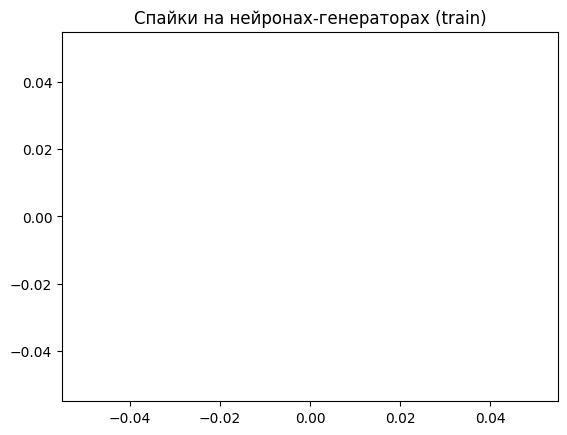

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

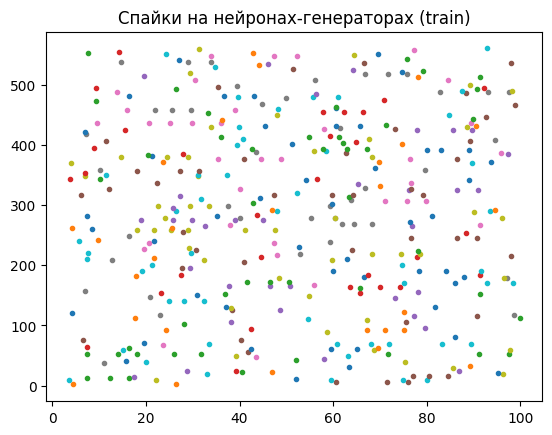

spike counts =  [0, 2, 0, 0, 0, 3, 0, 0, 1, 4, 1, 0, 3, 0, 1, 3, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 8, 0, 0, 1, 0, 0, 2, 1, 3, 1, 1, 1, 0, 0, 1, 0, 0, 6, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 4, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 3, 1, 0, 3, 0, 0, 0, 0, 1, 2, 0, 2, 1, 0, 3, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 0, 1, 1, 1, 3, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 6, 0, 1, 2, 0, 0, 2, 0, 2, 3, 0, 0, 1, 0, 0, 0, 5, 0, 0, 3, 3, 0, 3, 0, 0, 1, 0, 0, 0, 0, 1, 3, 0, 2, 0, 0, 1, 0, 0, 2, 3, 0, 1, 0, 1, 0, 0, 0, 3, 1, 0, 1, 1, 0, 1, 0, 1, 5, 0, 0, 0, 1, 0, 0, 0, 0, 3, 2, 1, 1,

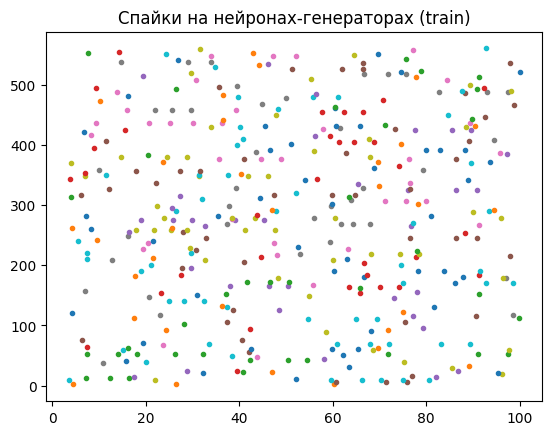

spike counts =  [0, 3, 0, 0, 0, 3, 0, 0, 1, 6, 1, 0, 3, 0, 2, 1, 0, 0, 1, 0, 2, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 3, 0, 1, 0, 1, 0, 0, 1, 1, 0, 8, 0, 0, 1, 0, 0, 2, 1, 3, 1, 1, 1, 0, 0, 1, 0, 0, 6, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 3, 0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 3, 1, 0, 3, 0, 0, 0, 0, 1, 2, 0, 2, 1, 0, 3, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 0, 1, 1, 1, 3, 2, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 6, 0, 1, 2, 0, 0, 2, 0, 1, 4, 0, 1, 0, 0, 0, 0, 5, 0, 1, 1, 5, 0, 3, 0, 0, 1, 0, 0, 0, 0, 1, 3, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 3, 1, 0, 1, 1, 0, 2, 0, 1, 4, 0, 0, 0, 1, 0, 0, 0, 0, 3, 2, 0, 2,

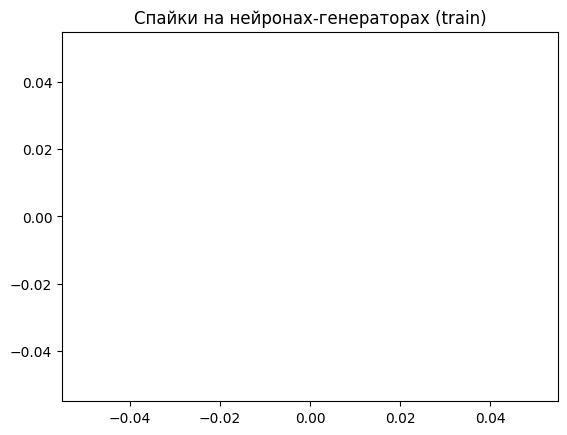

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

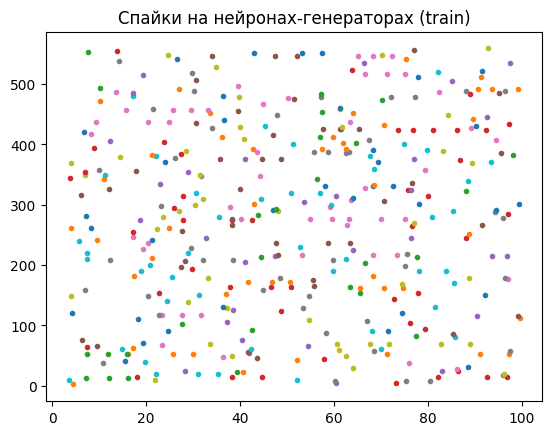

spike counts =  [0, 1, 0, 1, 1, 0, 0, 3, 1, 2, 0, 0, 3, 6, 0, 0, 0, 1, 1, 3, 0, 1, 1, 1, 2, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 2, 0, 0, 6, 3, 0, 1, 1, 0, 2, 1, 3, 0, 1, 0, 1, 1, 1, 1, 0, 6, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 3, 1, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 2, 0, 0, 0, 2, 0, 0, 0, 3, 1, 3, 0, 1, 0, 0, 1, 1, 0, 3, 0, 0, 0, 1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 4, 0, 2, 0, 1, 2, 0, 3, 1, 3, 1, 0, 2, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 3, 1, 0, 0, 1, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0, 0, 3, 1, 1, 6, 1, 1, 2, 1, 0, 1, 1, 0, 0, 0, 1, 2, 1, 2, 0, 1, 1, 0, 0, 2, 1, 1, 1, 2, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 2, 1, 1, 0, 0, 0, 3, 0, 0, 1, 1, 1, 2, 1, 0,

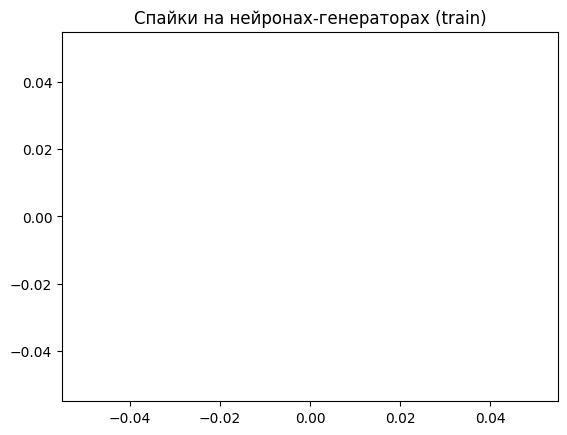

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

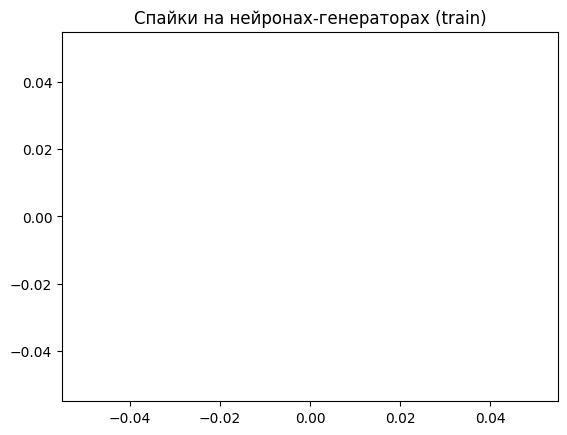

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

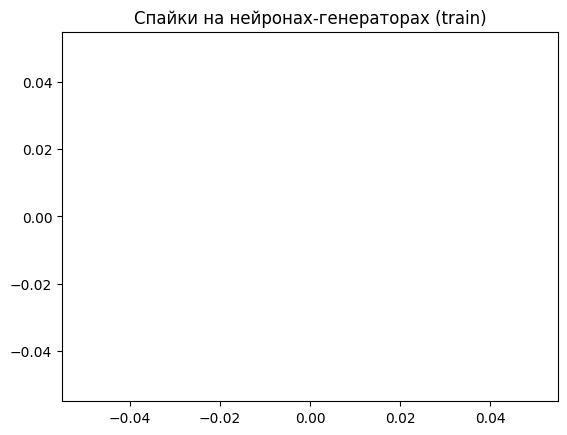

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

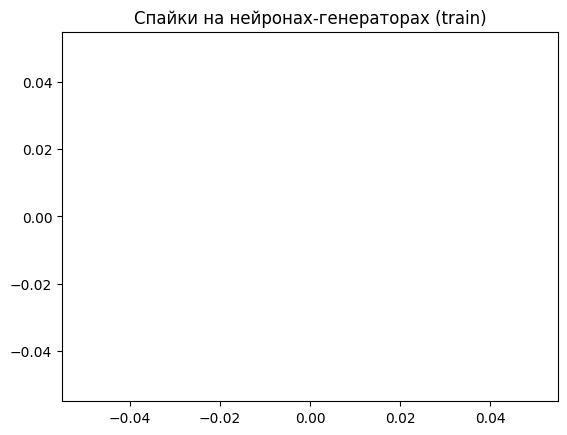

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

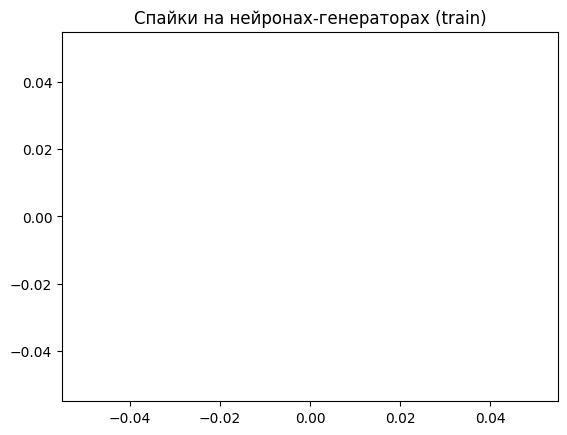

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

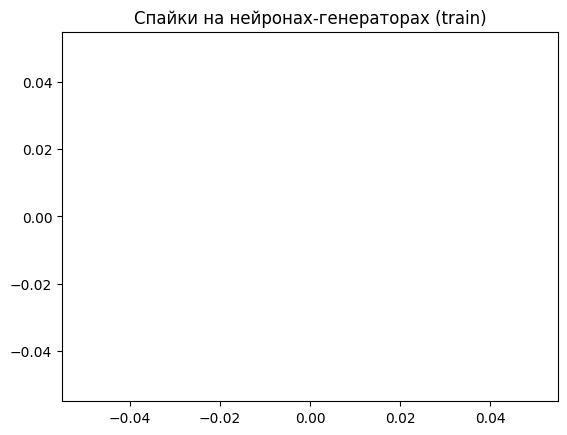

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

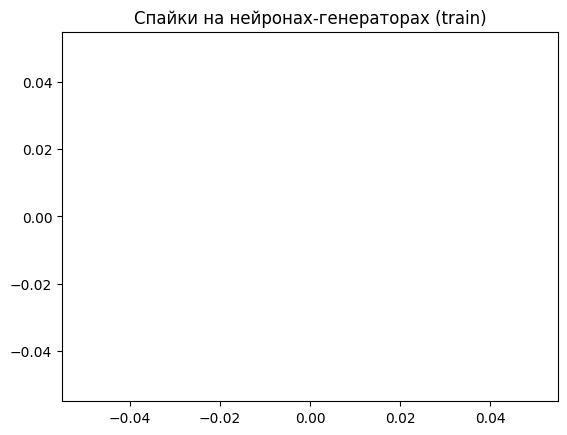

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

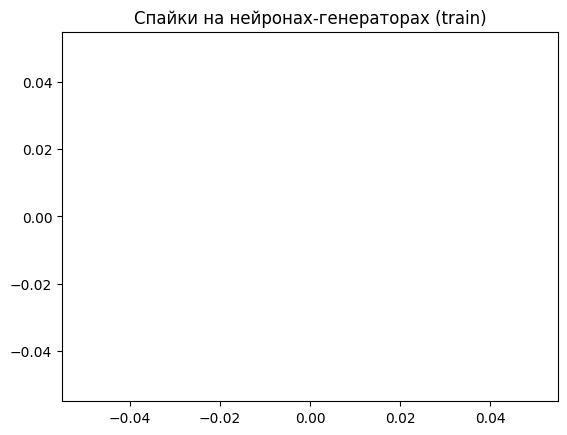

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

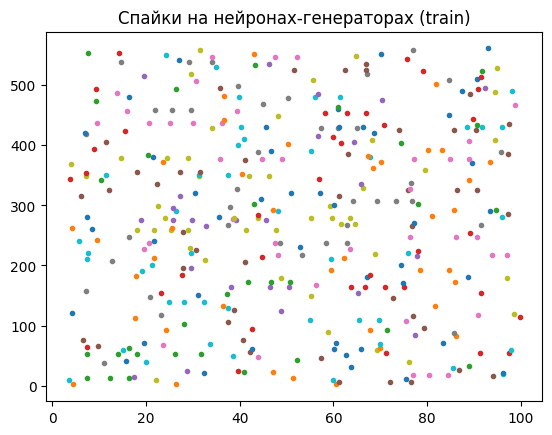

spike counts =  [0, 3, 0, 0, 0, 3, 0, 0, 1, 2, 1, 1, 3, 0, 1, 1, 3, 0, 0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 5, 3, 0, 1, 0, 0, 1, 2, 3, 1, 1, 1, 0, 1, 1, 0, 0, 2, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 3, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 4, 3, 0, 1, 0, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 2, 0, 1, 1, 0, 3, 1, 1, 3, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 3, 0, 1, 1, 1, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 6, 0, 1, 2, 0, 0, 1, 1, 0, 3, 2, 0, 1, 0, 0, 0, 5, 0, 1, 0, 6, 1, 2, 1, 0, 1, 0, 1, 0, 0, 0, 2, 1, 2, 1, 0, 1, 0, 0, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 1, 1,

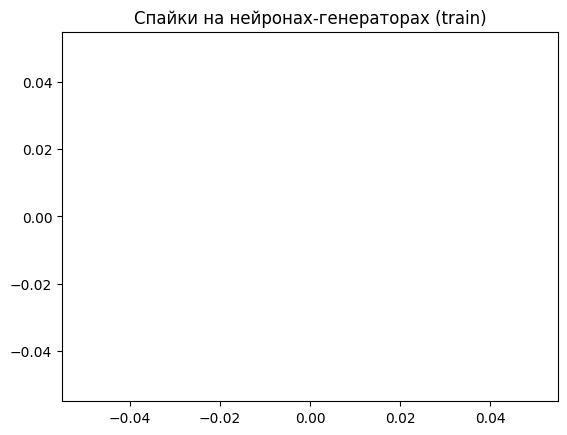

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

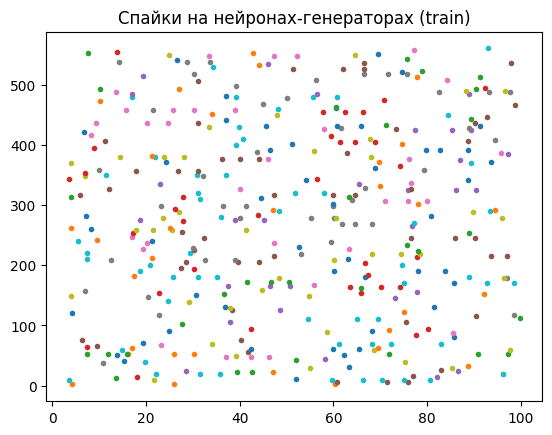

spike counts =  [0, 3, 0, 0, 0, 3, 0, 0, 1, 6, 1, 0, 1, 1, 1, 1, 0, 0, 1, 4, 0, 1, 2, 0, 2, 1, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 2, 3, 6, 0, 0, 1, 0, 0, 2, 1, 3, 2, 0, 1, 0, 1, 1, 0, 1, 4, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 3, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 1, 1, 2, 1, 0, 0, 1, 1, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 3, 1, 0, 3, 0, 0, 0, 0, 1, 2, 4, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 3, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 3, 0, 3, 1, 1, 1, 1, 0, 1, 0, 3, 0, 1, 3, 2, 0, 0, 1, 0, 0, 1, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 4, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 4, 0, 1, 2, 0, 0, 1, 0, 0, 3, 0, 1, 0, 0, 0, 1, 3, 0, 0, 3, 3, 1, 2, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 2, 0, 1, 0, 0, 0, 4, 0, 0, 1, 1, 0, 0, 0, 0, 3, 1, 0, 1, 1, 0, 2, 1, 0, 4, 0, 0, 0, 3, 0, 0, 0, 0, 3, 2, 1, 1,

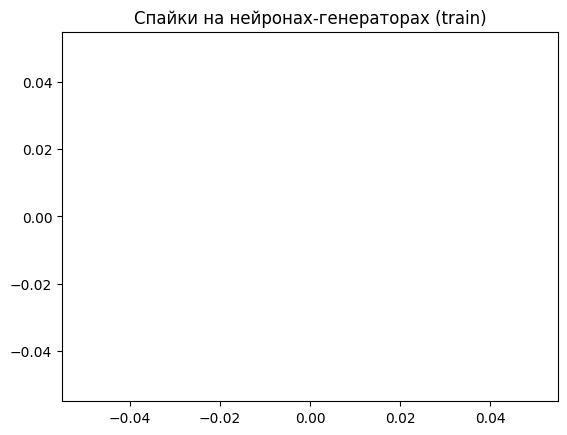

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

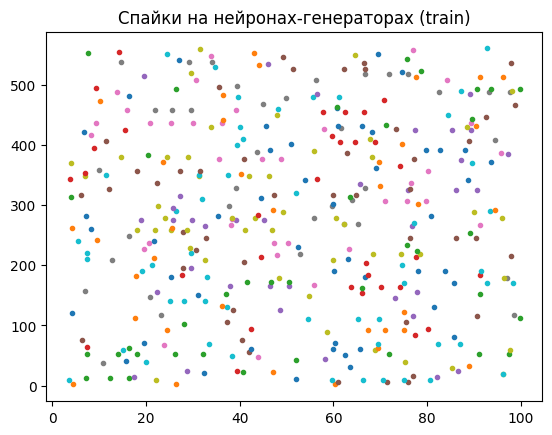

spike counts =  [0, 3, 0, 0, 0, 3, 0, 0, 1, 6, 1, 0, 3, 0, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 8, 0, 0, 1, 0, 0, 2, 1, 3, 1, 1, 1, 0, 0, 1, 0, 0, 4, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 4, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 3, 0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 3, 1, 0, 3, 0, 0, 0, 0, 1, 2, 1, 2, 1, 0, 3, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 0, 1, 1, 1, 3, 2, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 1, 0, 1, 0, 0, 0, 3, 0, 0, 1, 1, 1, 0, 0, 0, 4, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 6, 0, 1, 2, 0, 0, 2, 0, 2, 2, 1, 1, 0, 0, 0, 0, 5, 0, 1, 1, 5, 0, 3, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 3, 1, 0, 1, 1, 0, 2, 0, 1, 4, 0, 0, 0, 1, 0, 0, 0, 0, 3, 2, 0, 2,

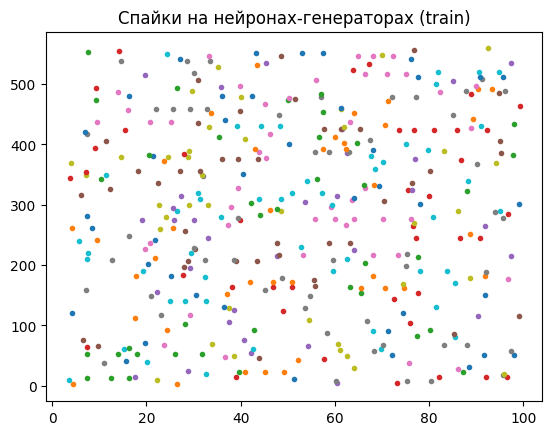

spike counts =  [0, 2, 0, 1, 1, 0, 0, 3, 1, 1, 1, 0, 3, 4, 1, 0, 0, 1, 1, 1, 0, 3, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 2, 0, 3, 0, 5, 0, 1, 0, 0, 2, 1, 3, 0, 0, 1, 1, 1, 1, 1, 3, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 3, 1, 3, 0, 1, 0, 0, 1, 1, 0, 3, 0, 0, 0, 1, 1, 1, 1, 1, 1, 3, 0, 1, 0, 0, 0, 1, 0, 4, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 3, 0, 4, 0, 2, 0, 1, 1, 0, 2, 1, 3, 1, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 3, 1, 0, 0, 1, 1, 1, 0, 3, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 1, 0, 2, 0, 1, 0, 0, 0, 0, 1, 3, 0, 5, 2, 1, 2, 1, 0, 1, 1, 0, 0, 0, 1, 2, 2, 0, 1, 1, 0, 1, 0, 2, 0, 3, 1, 2, 0, 1, 0, 1, 1, 1, 0, 0, 3, 1, 0, 0, 1, 2, 1, 0, 0, 0, 3, 0, 0, 1, 1, 1, 1, 2, 0,

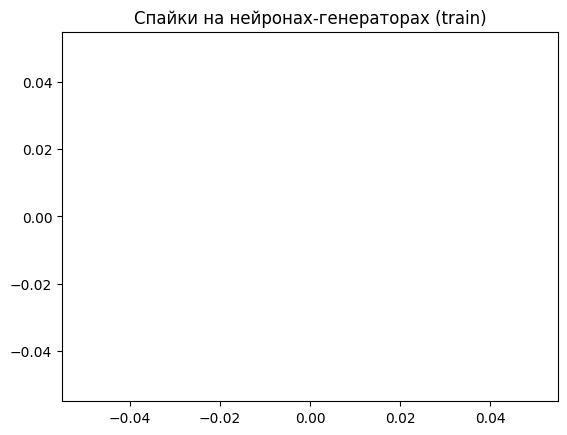

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

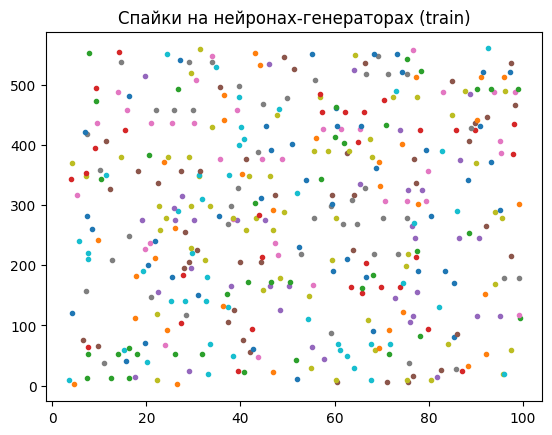

spike counts =  [0, 2, 0, 0, 0, 3, 0, 0, 4, 2, 1, 0, 3, 0, 2, 1, 0, 0, 1, 2, 0, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 1, 6, 0, 0, 1, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 4, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 3, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 1, 1, 0, 0, 0, 1, 3, 3, 0, 1, 0, 1, 1, 1, 0, 3, 0, 0, 0, 0, 2, 1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 3, 0, 1, 2, 1, 1, 1, 0, 2, 0, 1, 1, 3, 1, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 3, 0, 1, 1, 0, 0, 1, 1, 0, 3, 0, 1, 0, 0, 0, 0, 5, 0, 1, 3, 5, 0, 3, 0, 0, 1, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 1, 0, 0, 2, 3, 0, 1, 2, 1, 0, 0, 0, 3, 1, 0, 1, 1, 0, 0, 0, 1, 3, 1, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 2,

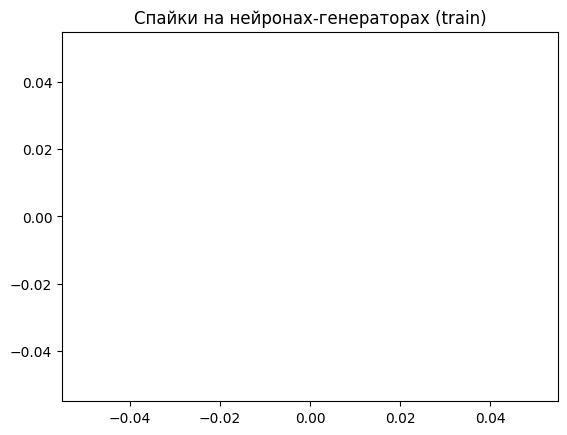

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

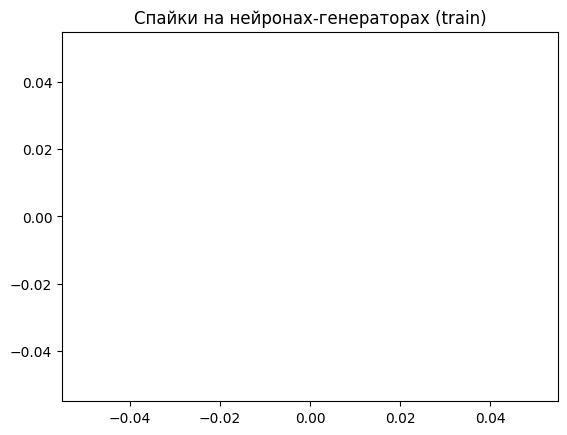

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

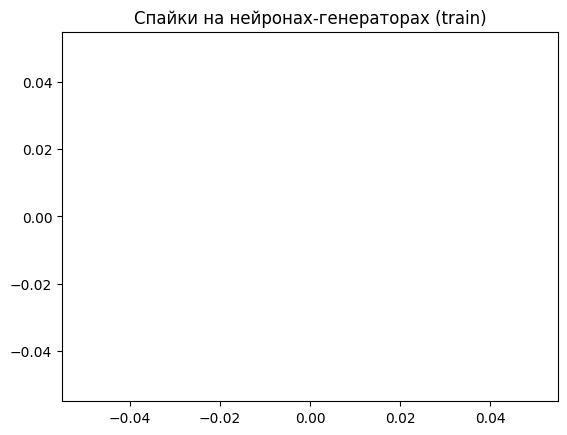

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

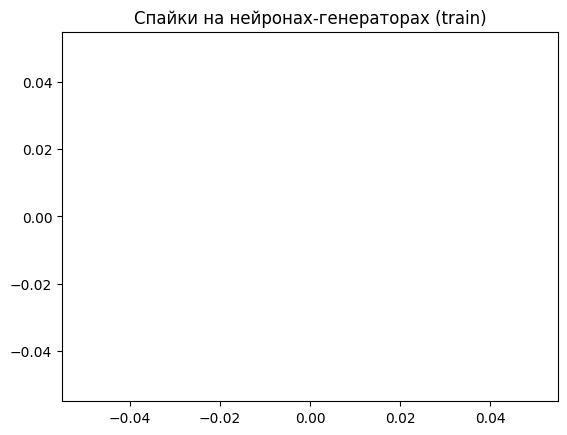

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

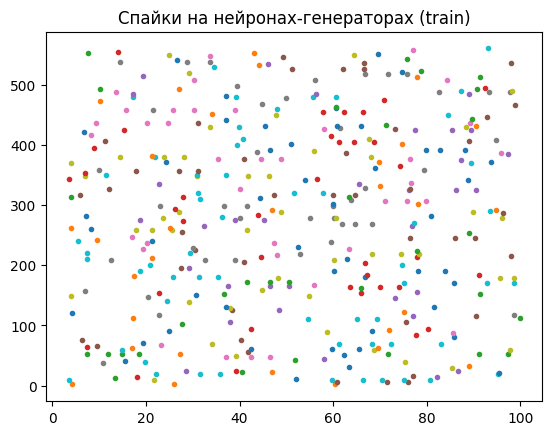

spike counts =  [0, 3, 0, 0, 0, 3, 0, 0, 1, 6, 1, 0, 1, 1, 1, 1, 0, 0, 0, 4, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 1, 7, 0, 0, 1, 0, 0, 2, 1, 3, 2, 0, 1, 0, 1, 1, 0, 1, 4, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 3, 0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 3, 1, 0, 3, 0, 0, 0, 0, 0, 3, 3, 1, 1, 0, 2, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 3, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 3, 2, 0, 0, 1, 0, 0, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 4, 0, 1, 2, 0, 0, 2, 0, 0, 3, 0, 1, 0, 0, 0, 1, 3, 0, 0, 3, 3, 1, 2, 0, 0, 1, 0, 1, 0, 0, 3, 1, 0, 2, 0, 1, 0, 0, 0, 4, 0, 0, 1, 1, 0, 0, 0, 0, 3, 1, 0, 1, 1, 0, 2, 1, 0, 4, 0, 0, 0, 3, 0, 0, 0, 0, 3, 2, 1, 1,

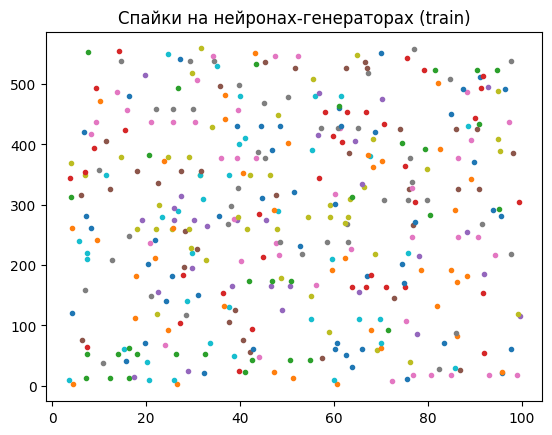

spike counts =  [0, 3, 0, 0, 0, 0, 1, 0, 0, 4, 1, 1, 3, 0, 1, 0, 5, 0, 0, 0, 2, 2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 3, 0, 0, 1, 1, 0, 0, 1, 1, 0, 5, 1, 0, 1, 0, 0, 1, 1, 4, 1, 1, 1, 0, 0, 1, 0, 0, 2, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 3, 0, 1, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 4, 3, 0, 1, 0, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 2, 0, 1, 1, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 3, 0, 1, 1, 1, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 6, 0, 1, 2, 0, 0, 1, 1, 0, 3, 1, 0, 1, 0, 0, 0, 5, 0, 1, 0, 4, 1, 3, 0, 1, 1, 0, 0, 0, 0, 0, 2, 1, 2, 1, 0, 1, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 0, 0, 3, 1, 1, 1, 0, 2, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 4, 1, 1,

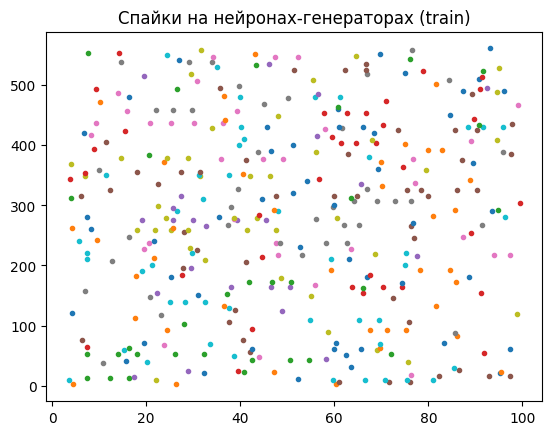

spike counts =  [0, 3, 0, 0, 0, 3, 0, 0, 1, 6, 1, 0, 3, 0, 1, 3, 1, 0, 0, 0, 2, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 3, 0, 1, 0, 1, 0, 0, 1, 1, 0, 6, 1, 0, 1, 0, 0, 1, 1, 4, 1, 1, 1, 0, 0, 1, 0, 0, 2, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 1, 0, 3, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 0, 3, 1, 1, 3, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 3, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 6, 0, 1, 2, 0, 0, 1, 1, 0, 4, 0, 0, 1, 0, 0, 0, 5, 0, 1, 1, 4, 1, 2, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 1, 0, 0, 0, 4, 0, 1, 1, 0, 2, 0, 1, 5, 0, 0, 0, 0, 1, 0, 0, 0, 0, 5, 0, 2,

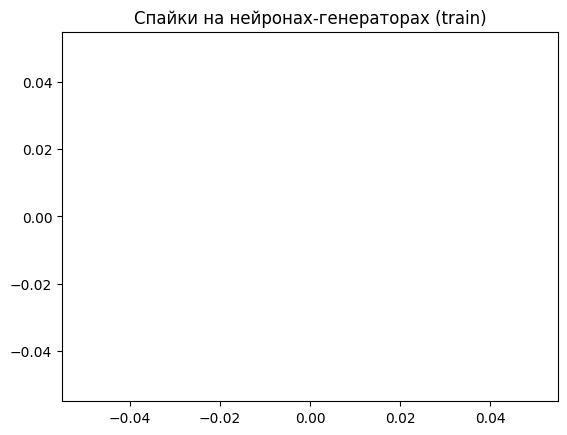

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

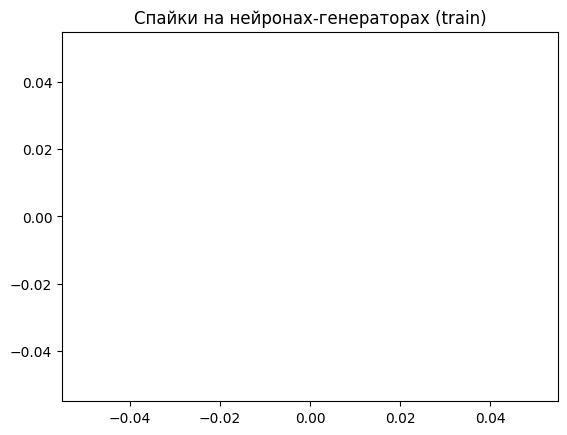

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

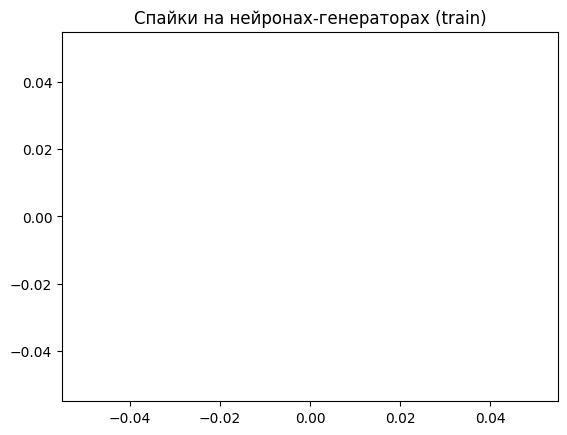

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

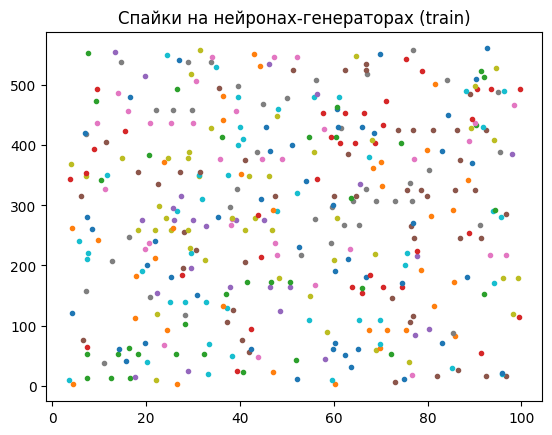

spike counts =  [0, 3, 0, 0, 0, 1, 0, 0, 1, 2, 2, 0, 3, 0, 1, 3, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 6, 1, 0, 1, 0, 0, 1, 0, 4, 1, 1, 1, 0, 0, 1, 0, 0, 2, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 4, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 1, 1, 1, 3, 0, 0, 0, 0, 0, 3, 0, 3, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 0, 3, 1, 1, 3, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 6, 0, 1, 2, 0, 0, 1, 1, 1, 3, 0, 0, 1, 0, 0, 0, 5, 0, 1, 1, 4, 1, 2, 1, 0, 1, 0, 1, 0, 0, 0, 3, 0, 2, 1, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 4, 0, 1, 1, 0, 1, 0, 1, 5, 0, 0, 0, 1, 0, 0, 0, 0, 0, 4, 1, 2,

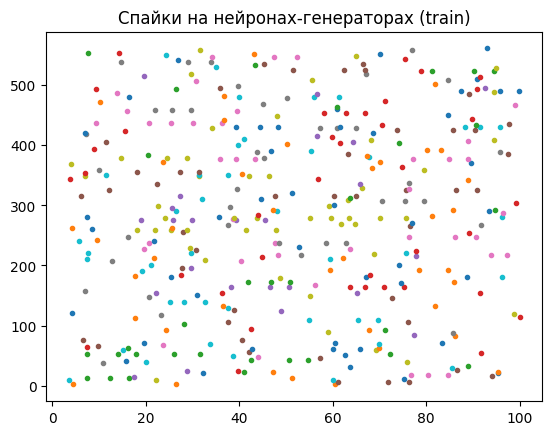

spike counts =  [0, 3, 0, 0, 0, 3, 0, 0, 1, 2, 1, 1, 3, 0, 1, 1, 3, 0, 0, 0, 2, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 3, 0, 0, 1, 1, 0, 0, 1, 1, 0, 6, 1, 0, 1, 0, 0, 1, 1, 3, 1, 1, 1, 0, 1, 1, 0, 0, 2, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 3, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 4, 3, 0, 1, 0, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 1, 1, 3, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 2, 0, 1, 1, 0, 3, 1, 1, 3, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 3, 0, 1, 1, 1, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 6, 0, 1, 2, 0, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 0, 5, 0, 1, 0, 8, 1, 2, 1, 0, 1, 0, 0, 1, 0, 0, 2, 1, 2, 1, 0, 1, 0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 0, 0, 3, 1, 1, 1, 0, 1, 0, 1, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 4, 1, 1,

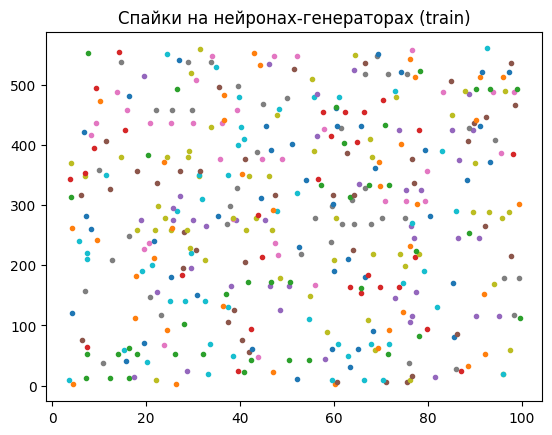

spike counts =  [0, 3, 0, 0, 0, 3, 0, 0, 2, 4, 1, 0, 3, 0, 2, 1, 0, 0, 1, 2, 0, 1, 1, 2, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 3, 0, 1, 0, 1, 0, 0, 2, 0, 1, 6, 0, 0, 1, 0, 0, 2, 1, 3, 1, 1, 1, 0, 0, 1, 0, 0, 4, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 3, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 3, 3, 0, 1, 0, 1, 1, 1, 0, 3, 0, 0, 0, 0, 2, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 0, 1, 1, 1, 3, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 6, 0, 1, 2, 0, 0, 2, 1, 0, 4, 0, 1, 0, 0, 0, 0, 5, 0, 1, 3, 5, 0, 3, 0, 0, 1, 0, 0, 0, 0, 3, 3, 0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 0, 0, 0, 3, 1, 0, 1, 1, 0, 2, 0, 1, 4, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 2,

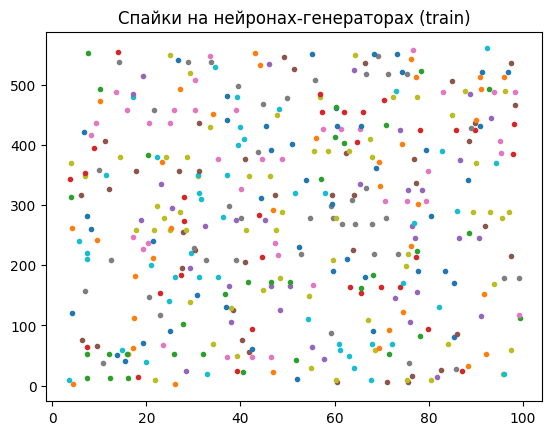

spike counts =  [0, 2, 0, 0, 0, 3, 0, 0, 4, 2, 1, 0, 3, 1, 1, 1, 0, 0, 1, 2, 0, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 3, 0, 1, 1, 1, 2, 6, 0, 0, 1, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1, 1, 0, 2, 3, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 2, 1, 0, 0, 1, 1, 0, 0, 0, 1, 3, 3, 0, 1, 0, 1, 1, 1, 0, 3, 0, 0, 0, 0, 2, 1, 3, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 3, 1, 1, 1, 1, 0, 2, 0, 1, 1, 3, 1, 2, 0, 0, 1, 0, 0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 6, 0, 1, 2, 0, 0, 2, 1, 0, 3, 0, 1, 0, 0, 0, 1, 3, 0, 0, 4, 3, 1, 2, 0, 0, 1, 0, 0, 0, 0, 5, 1, 0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 3, 1, 0, 1, 1, 0, 1, 1, 0, 4, 0, 0, 0, 3, 0, 0, 0, 0, 2, 1, 1, 1,

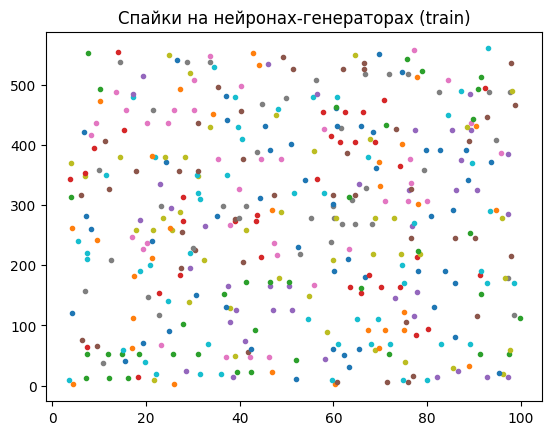

spike counts =  [0, 3, 0, 0, 0, 3, 0, 0, 1, 4, 1, 0, 3, 1, 4, 1, 0, 0, 1, 3, 1, 1, 2, 0, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 9, 0, 0, 1, 0, 0, 2, 1, 3, 2, 0, 1, 0, 1, 1, 0, 0, 6, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 3, 0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 3, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 3, 1, 0, 3, 0, 0, 0, 0, 1, 2, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 0, 1, 1, 1, 3, 2, 0, 0, 1, 0, 0, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 4, 0, 1, 2, 0, 0, 2, 0, 1, 3, 0, 1, 0, 0, 0, 3, 1, 1, 0, 3, 5, 0, 3, 0, 0, 1, 1, 0, 0, 0, 2, 1, 1, 2, 0, 0, 1, 0, 0, 4, 0, 0, 1, 1, 0, 0, 0, 0, 3, 1, 0, 1, 1, 0, 2, 1, 0, 4, 0, 0, 0, 3, 0, 0, 0, 0, 3, 2, 1, 1,

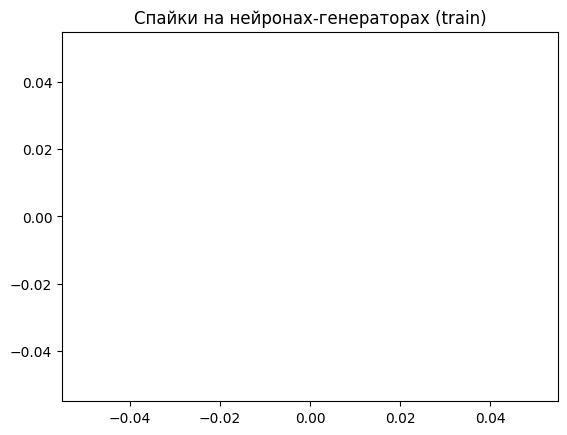

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

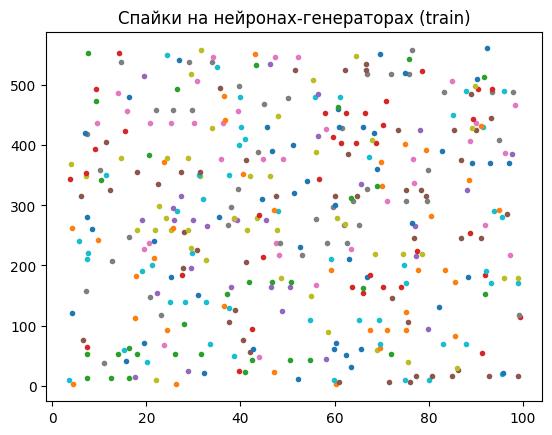

spike counts =  [0, 3, 0, 0, 0, 3, 0, 0, 1, 4, 1, 0, 3, 0, 1, 5, 0, 0, 0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 3, 0, 1, 0, 1, 0, 0, 1, 1, 0, 6, 1, 0, 1, 0, 0, 1, 1, 3, 1, 1, 1, 0, 0, 1, 0, 0, 4, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 4, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 3, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 3, 0, 1, 3, 0, 0, 0, 0, 0, 3, 0, 3, 1, 0, 3, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 0, 2, 1, 3, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 3, 0, 1, 1, 1, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 6, 0, 1, 2, 0, 0, 2, 0, 1, 3, 1, 0, 1, 0, 0, 0, 5, 0, 1, 1, 4, 1, 2, 1, 0, 1, 0, 1, 0, 0, 0, 3, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 1, 3, 0, 1, 1, 0, 1, 0, 1, 5, 0, 0, 0, 0, 1, 0, 0, 0, 1, 3, 0, 2,

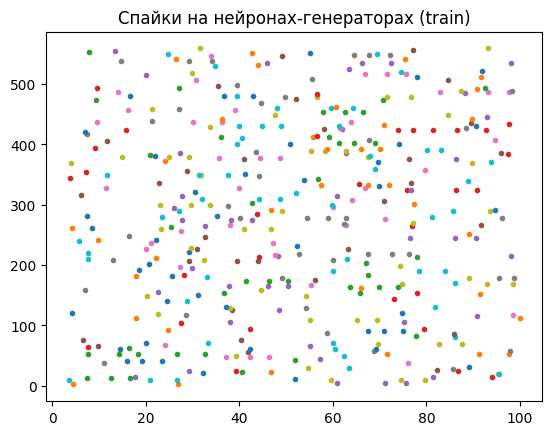

spike counts =  [0, 2, 0, 0, 3, 0, 0, 0, 3, 3, 1, 0, 3, 1, 2, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 3, 0, 1, 0, 1, 0, 3, 0, 1, 1, 0, 3, 5, 0, 0, 1, 0, 2, 0, 1, 3, 0, 1, 1, 1, 1, 1, 0, 3, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 3, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 3, 0, 0, 2, 0, 0, 1, 0, 1, 1, 1, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 3, 0, 3, 0, 1, 0, 3, 1, 0, 0, 3, 0, 0, 1, 0, 3, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 3, 0, 2, 1, 2, 0, 1, 1, 1, 2, 0, 1, 4, 0, 1, 1, 0, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 3, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 0, 0, 0, 3, 0, 1, 5, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 1, 0, 1, 1, 3, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 3, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 3, 1, 0, 3, 0,

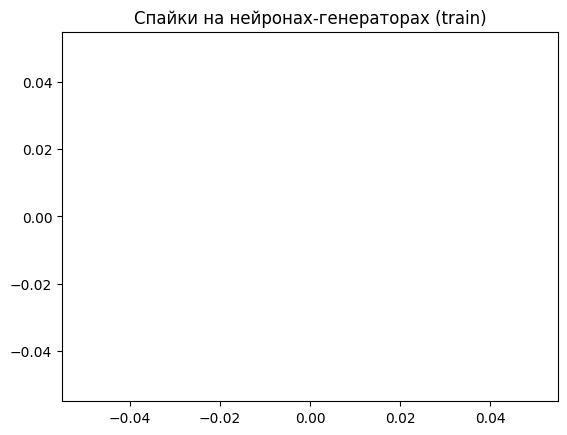

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

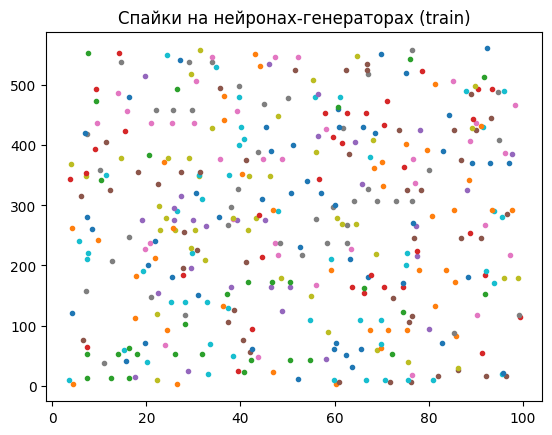

spike counts =  [0, 3, 0, 0, 0, 3, 0, 0, 1, 6, 1, 0, 3, 0, 1, 3, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 3, 0, 1, 0, 1, 0, 0, 1, 1, 0, 6, 1, 0, 1, 0, 0, 1, 1, 3, 1, 1, 1, 0, 0, 1, 0, 0, 2, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 4, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 3, 0, 1, 0, 1, 0, 1, 1, 2, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 1, 1, 1, 3, 0, 0, 0, 0, 0, 3, 0, 3, 1, 0, 3, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 0, 2, 1, 1, 3, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 3, 0, 1, 1, 1, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 4, 0, 1, 2, 0, 0, 2, 0, 1, 2, 2, 0, 1, 0, 0, 0, 5, 0, 1, 1, 4, 1, 2, 1, 0, 1, 0, 1, 0, 0, 0, 3, 0, 4, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 4, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 3, 0, 0, 0, 1, 3, 0, 2,

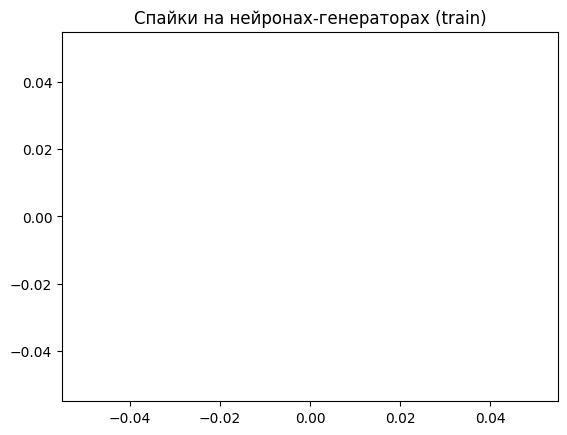

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

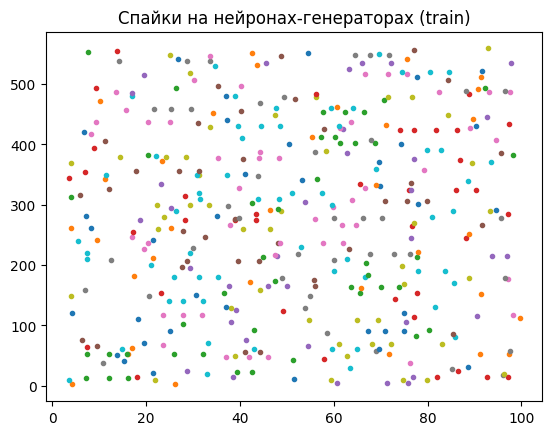

spike counts =  [0, 2, 0, 0, 3, 0, 0, 0, 4, 1, 1, 0, 3, 4, 2, 0, 0, 1, 1, 1, 1, 0, 2, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 3, 0, 2, 0, 1, 4, 5, 0, 0, 2, 0, 2, 0, 4, 1, 1, 0, 1, 1, 1, 1, 0, 4, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 4, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 3, 0, 1, 1, 0, 1, 1, 0, 4, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 3, 0, 3, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 2, 1, 4, 0, 1, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 3, 0, 2, 0, 2, 0, 1, 2, 0, 3, 0, 1, 4, 0, 2, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 4, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 3, 0, 1, 2, 0, 1, 0, 1, 3, 0, 1, 0, 0, 0, 0, 3, 1, 1, 1, 5, 1, 1, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 1, 1, 1, 0, 1, 0, 1, 1, 3, 1, 1, 0, 1, 0, 1, 3, 1, 0, 0, 3, 0, 0, 1, 1, 0, 1, 0, 0, 0, 3, 0, 0, 0, 3, 1, 1, 2, 0,

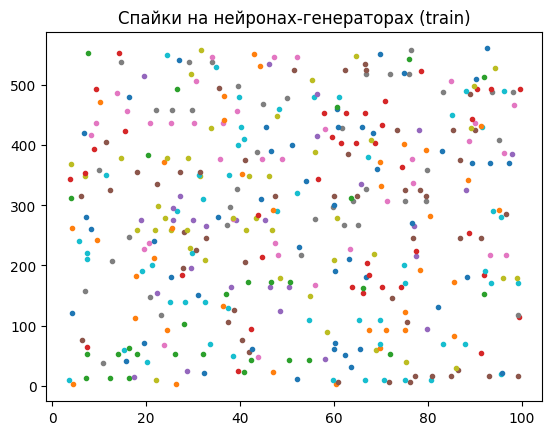

spike counts =  [0, 3, 0, 0, 0, 3, 0, 0, 1, 6, 1, 0, 3, 0, 1, 5, 0, 0, 0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 3, 0, 1, 0, 1, 0, 0, 1, 1, 0, 6, 1, 0, 1, 0, 0, 1, 1, 3, 1, 1, 1, 0, 0, 1, 0, 0, 4, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 4, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 3, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 3, 0, 1, 3, 0, 0, 0, 0, 0, 3, 0, 3, 1, 0, 3, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 0, 3, 1, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 6, 0, 1, 2, 0, 0, 2, 0, 0, 3, 0, 0, 1, 0, 0, 0, 5, 0, 1, 1, 4, 1, 2, 1, 0, 1, 0, 1, 0, 0, 0, 3, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 1, 3, 0, 1, 1, 0, 2, 0, 1, 5, 0, 0, 0, 1, 0, 0, 0, 0, 1, 3, 0, 2,

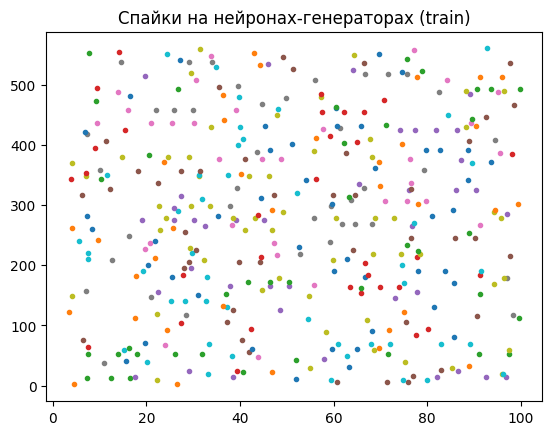

spike counts =  [0, 2, 0, 0, 0, 3, 0, 0, 1, 3, 1, 0, 3, 0, 5, 1, 0, 0, 1, 2, 0, 1, 1, 1, 2, 1, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 0, 8, 0, 0, 1, 0, 0, 2, 1, 3, 1, 1, 1, 0, 0, 1, 0, 0, 6, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0, 0, 0, 1, 3, 3, 0, 1, 0, 1, 1, 1, 0, 3, 0, 0, 0, 0, 1, 2, 1, 2, 1, 0, 3, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 3, 0, 1, 2, 1, 1, 1, 0, 2, 0, 1, 1, 1, 3, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 3, 0, 1, 2, 0, 0, 2, 0, 2, 3, 0, 1, 0, 0, 0, 0, 5, 0, 0, 1, 7, 0, 3, 0, 0, 1, 1, 0, 0, 0, 2, 1, 1, 2, 0, 0, 1, 0, 0, 2, 3, 0, 1, 2, 0, 0, 0, 0, 3, 1, 0, 1, 1, 0, 1, 0, 1, 4, 0, 0, 0, 1, 0, 0, 0, 0, 3, 2, 0, 2,

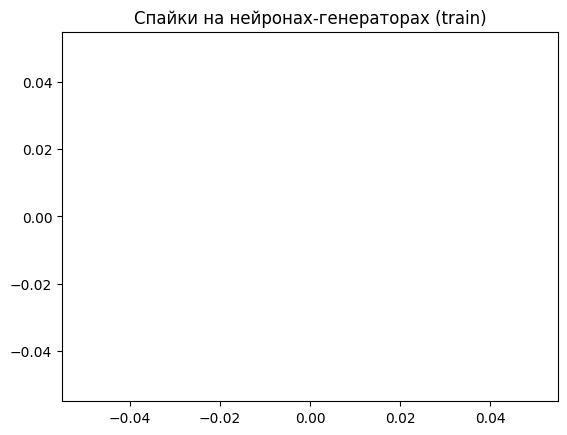

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

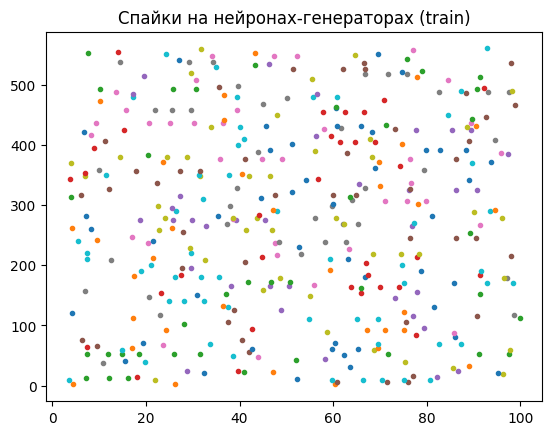

spike counts =  [0, 3, 0, 0, 0, 3, 0, 0, 1, 6, 1, 0, 3, 1, 1, 1, 0, 0, 1, 0, 2, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 9, 0, 0, 1, 0, 0, 2, 1, 3, 2, 0, 1, 0, 1, 1, 0, 0, 4, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 4, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 3, 0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 3, 1, 0, 3, 0, 0, 0, 0, 1, 2, 3, 1, 1, 0, 3, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 1, 1, 2, 1, 1, 0, 2, 0, 1, 1, 1, 3, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 3, 0, 1, 1, 1, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 3, 0, 1, 2, 0, 0, 2, 0, 1, 3, 1, 1, 0, 0, 0, 0, 5, 0, 1, 1, 5, 0, 3, 0, 0, 1, 0, 0, 0, 0, 1, 3, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 3, 1, 0, 1, 1, 0, 2, 0, 1, 4, 0, 0, 0, 0, 1, 0, 0, 0, 3, 2, 0, 2,

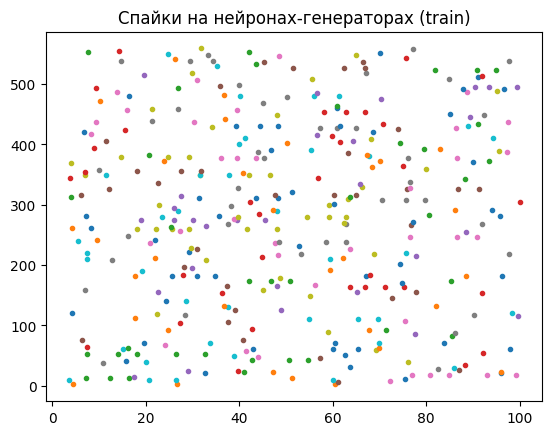

spike counts =  [0, 3, 0, 0, 0, 1, 1, 0, 0, 4, 1, 1, 3, 0, 1, 0, 5, 0, 0, 0, 2, 2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 3, 0, 0, 1, 1, 0, 0, 1, 1, 0, 5, 1, 0, 0, 1, 0, 1, 1, 4, 1, 1, 1, 0, 0, 1, 0, 0, 2, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 3, 0, 1, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 1, 1, 0, 0, 0, 0, 4, 1, 1, 1, 0, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0, 1, 0, 5, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 2, 0, 1, 1, 0, 1, 2, 1, 2, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 3, 0, 1, 1, 1, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 6, 0, 1, 1, 1, 0, 1, 1, 0, 3, 1, 0, 1, 0, 0, 0, 5, 0, 1, 0, 4, 1, 3, 0, 1, 1, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 0, 0, 3, 1, 0, 3, 0, 2, 0, 1, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 4, 1, 1,

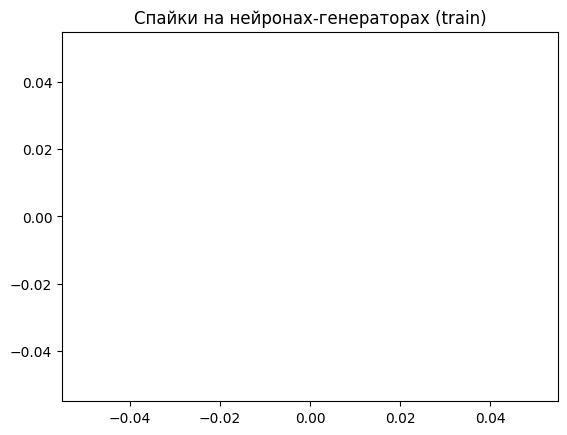

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

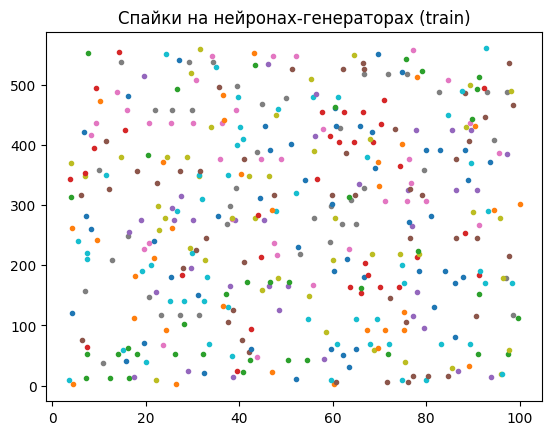

spike counts =  [0, 3, 0, 0, 0, 3, 0, 0, 1, 4, 1, 0, 3, 0, 3, 3, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 3, 0, 1, 0, 1, 0, 0, 1, 1, 0, 8, 0, 0, 1, 0, 0, 2, 1, 3, 1, 1, 1, 0, 0, 1, 0, 0, 6, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 4, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 3, 0, 1, 1, 0, 1, 1, 0, 4, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 3, 1, 0, 3, 0, 0, 0, 0, 1, 2, 1, 3, 1, 0, 3, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 0, 1, 1, 1, 3, 2, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0, 1, 3, 0, 0, 1, 0, 0, 0, 5, 0, 1, 1, 5, 0, 3, 0, 0, 1, 0, 0, 0, 0, 1, 3, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 3, 1, 0, 1, 1, 0, 2, 0, 1, 5, 0, 0, 0, 1, 0, 0, 0, 0, 3, 2, 0, 2,

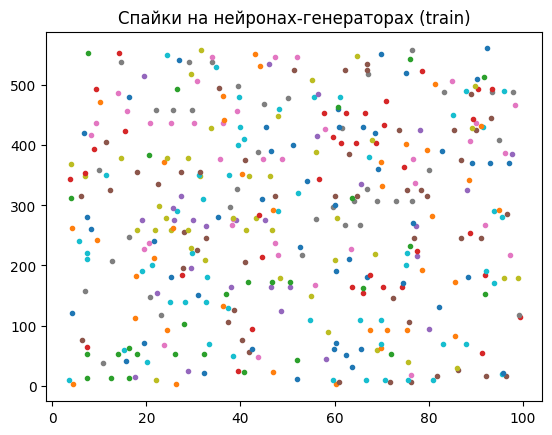

spike counts =  [0, 3, 0, 0, 0, 3, 0, 0, 1, 6, 1, 0, 3, 0, 1, 3, 1, 0, 0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 6, 1, 0, 1, 0, 0, 1, 1, 3, 1, 1, 1, 0, 0, 1, 0, 0, 4, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 4, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 3, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 1, 1, 1, 3, 0, 0, 0, 0, 0, 3, 1, 3, 1, 0, 3, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1, 3, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 6, 0, 1, 2, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 5, 0, 1, 1, 4, 1, 2, 1, 0, 1, 0, 1, 0, 0, 0, 3, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 4, 0, 1, 1, 0, 2, 0, 1, 5, 0, 0, 0, 1, 0, 0, 0, 0, 1, 3, 0, 2,

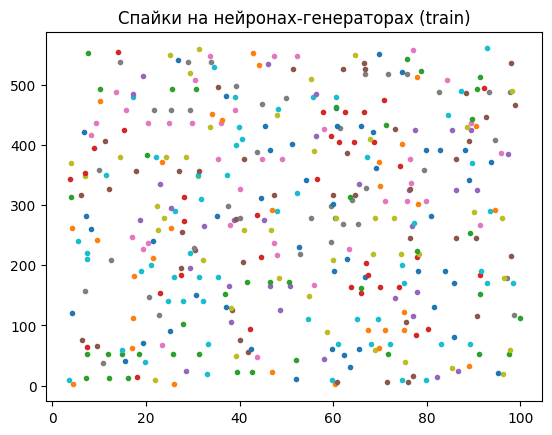

spike counts =  [0, 3, 0, 0, 0, 3, 0, 0, 1, 4, 1, 0, 3, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 9, 0, 0, 1, 0, 0, 2, 1, 3, 2, 0, 1, 0, 1, 1, 0, 0, 6, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 3, 0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 3, 3, 0, 1, 0, 0, 3, 1, 0, 3, 0, 0, 0, 0, 1, 2, 3, 1, 1, 0, 3, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 0, 1, 1, 1, 3, 2, 0, 0, 1, 0, 0, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 3, 0, 1, 2, 0, 0, 2, 0, 2, 2, 0, 1, 0, 0, 0, 1, 3, 1, 0, 3, 5, 0, 3, 0, 0, 1, 0, 0, 0, 0, 1, 3, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 3, 1, 0, 1, 1, 0, 2, 1, 0, 4, 0, 0, 0, 1, 0, 0, 0, 0, 3, 2, 1, 1,

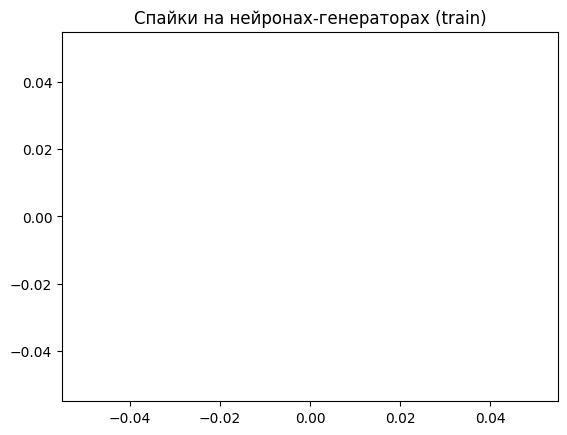

spike counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [22]:
%%time
import time

def learning(data, E):
    matrix = np.zeros((len(data), E*len(data[0])))

    for index, vec in enumerate(data):
        nest.ResetKernel()
        neuron = nest.Create("iaf_psc_alpha",E*len(data[0]))# leaky integrate and fire model of neuron
        neuron.set({"C_m":0.1})
        bound = 100
        res = np.array([])
        noise = nest.Create("poisson_generator",E*len(data[0]))# E * data.shape[0] was
        #noise.set({"stop": 150})
        a= np.zeros(E*len(data[0]))
        # Добавляем массивы в матрицу в цикле
        
        spikerecorder = nest.Create("spike_recorder", E*len(data[0]))
        nest.Connect(neuron,spikerecorder,"one_to_one")
        
        k=0
        mu,disp = params(vec,E) # извлекаем параметры мат ожид и дисперсии
        ans = Gaussuniverse(vec,mu,disp) 
        for i in range(len(data[0])):#filling all generators with parameters from gaussians
            for j in range(E):
                noise[k].rate =1.0*ans[i,j] 
                #print(noise[k].rate) 
                k+=1
        
        nest.Connect(noise, neuron, "one_to_one") 
        
        #start simulation
        #nest.SetKernelStatus({'biological_time': 0.0})
        nest.Simulate(bound)

        print(index)
        
        # vizualize spikes of upper neurons
        events = (E*len(data[0]))*[0]
        senders = (E*len(data[0]))*[0]
        spike_counts = []
        result_spikes = np.array([])
        for i in range(E*len(data[0])):
            events[i] = spikerecorder[i].get("events")
            spike_counts.append(len(events[i]["times"]))
            senders[i] = events[i]["senders"]
            ts = events[i]["times"]
            plt.plot(ts, senders[i], ".")
        plt.title("Спайки на нейронах-генераторах (train)")    
        plt.show()
        result_spikes = spike_counts
        print("spike counts = ", result_spikes)
        matrix[index, :] = result_spikes
    return matrix
E = 3
matrix = learning(data,E)

In [27]:
matrix[0]

array([0., 2., 0., ..., 0., 0., 0.])

In [24]:
import xgboost as xgb
# Обучите модель XGBoost

X_train, X_test, y_train, y_test = train_test_split(matrix, y_train, test_size=0.2, random_state=42)

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Оцените модель
y_pred = xgb_model.predict(X_test)



In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Accuracy: 0.9778
Precision: 0.9808
Recall: 0.9750
F1-score: 0.9774
